Project Name-PRCL-0017-CUSTOMER CHURN BUSINESS CASE

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao

## Business problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

## Client Project 0017  - Churn Predicton

In [1]:
pip install mysql-connector-python

In [2]:
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [3]:
import mysql.connector
from mysql.connector import Error
import pandas as pd 

# mysql db conn details
mlocalhost ='18.136.157.135'
mUsername = 'dm_team3'
mPassword = 'DM!$!Team!27@9!20&'
mDatabase = 'project_telecom'
#
# Connect to mysql database & query
db_conn = mysql.connector.connect(
      host=mlocalhost,
      user=mUsername,
      passwd=mPassword,
      database=mDatabase
    )
df = pd.read_sql("SELECT * FROM telecom_churn_data",db_conn) #fetch data from sql & store it in a dataframe
db_conn.close() # close db conn

In [4]:
print(df.shape)
df.head()

(4617, 21)


columns1 columns2 columns3   columns4 columns5 columns6 columns7 columns8  \
0       KS      128      415   382-4657       no      yes       25    265.1   
1       OH      107      415   371-7191       no      yes       26    161.6   
2       NJ      137      415   358-1921       no       no        0    243.4   
3       OH       84      408   375-9999      yes       no        0    299.4   
4       OK       75      415   330-6626      yes       no        0    166.7   

  columns9 columns10  ... columns12 columns13 columns14 columns15 columns16  \
0      110     45.07  ...        99     16.78     244.7        91     11.01   
1      123     27.47  ...       103     16.62     254.4       103     11.45   
2      114     41.38  ...       110      10.3     162.6       104      7.32   
3       71      50.9  ...        88      5.26     196.9        89      8.86   
4      113     28.34  ...       122     12.61     186.9       121      8.41   

  columns17 columns18 columns19 columns20 columns21  
0        10         3       2.7         1    False.  
1      13.7         3       3.7         1    False.  
2      12.2         5      3.29         0    False.  
3       6.6         7      1.78         2    False.  
4      10.1         3      2.73         3    False.  

[5 rows x 21 columns]

#### Rename column names

In [5]:
df.rename(columns = {
'columns1' : 'state'
,'columns2' : 'acct_length'
,'columns3' : 'area_code'
,'columns4' : 'phone'
,'columns5' : 'intl_plan'
,'columns6' : 'vmail_plan'
,'columns7' : 'vmail_message'
,'columns8' : 'day_mins'
,'columns9' : 'day_calls'
,'columns10' : 'day_charge'
,'columns11' : 'eve_mins'
,'columns12' : 'eve_calls'
,'columns13' : 'eve_charge'
,'columns14' : 'night_mins'
,'columns15' : 'night_calls'
,'columns16' : 'night_charge'
,'columns17' : 'intl_mins'
,'columns18' : 'intl_calls'
,'columns19' : 'intl_charge'
,'columns20' : 'custserv_calls'
,'columns21' : 'churn'
}, inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   state           4617 non-null   object
 1   acct_length     4617 non-null   object
 2   area_code       4617 non-null   object
 3   phone           4617 non-null   object
 4   intl_plan       4617 non-null   object
 5   vmail_plan      4617 non-null   object
 6   vmail_message   4617 non-null   object
 7   day_mins        4617 non-null   object
 8   day_calls       4617 non-null   object
 9   day_charge      4617 non-null   object
 10  eve_mins        4617 non-null   object
 11  eve_calls       4617 non-null   object
 12  eve_charge      4617 non-null   object
 13  night_mins      4617 non-null   object
 14  night_calls     4617 non-null   object
 15  night_charge    4617 non-null   object
 16  intl_mins       4617 non-null   object
 17  intl_calls      4617 non-null   object
 18  intl_cha

In [7]:
df.head()

state acct_length area_code      phone intl_plan vmail_plan vmail_message  \
0    KS         128       415   382-4657        no        yes            25   
1    OH         107       415   371-7191        no        yes            26   
2    NJ         137       415   358-1921        no         no             0   
3    OH          84       408   375-9999       yes         no             0   
4    OK          75       415   330-6626       yes         no             0   

  day_mins day_calls day_charge  ... eve_calls eve_charge night_mins  \
0    265.1       110      45.07  ...        99      16.78      244.7   
1    161.6       123      27.47  ...       103      16.62      254.4   
2    243.4       114      41.38  ...       110       10.3      162.6   
3    299.4        71       50.9  ...        88       5.26      196.9   
4    166.7       113      28.34  ...       122      12.61      186.9   

  night_calls night_charge intl_mins intl_calls intl_charge custserv_calls  \
0          91        11.01        10          3         2.7              1   
1         103        11.45      13.7          3         3.7              1   
2         104         7.32      12.2          5        3.29              0   
3          89         8.86       6.6          7        1.78              2   
4         121         8.41      10.1          3        2.73              3   

     churn  
0   False.  
1   False.  
2   False.  
3   False.  
4   False.  

[5 rows x 21 columns]

In [8]:
df.describe()

state acct_length area_code      phone intl_plan vmail_plan  \
count   4617        4617      4617       4617      4617       4617   
unique    51         218         3       4617         2          2   
top       WV          90       415   350-1532        no         no   
freq     149          63      2299          1      4171       3381   

       vmail_message day_mins day_calls day_charge  ... eve_calls eve_charge  \
count           4617     4617      4617       4617  ...      4617       4617   
unique            47     1901       123       1901  ...       125       1621   
top                0    189.3       102      32.18  ...       105      14.25   
freq            3381       10       108         10  ...       111         15   

       night_mins night_calls night_charge intl_mins intl_calls intl_charge  \
count        4617        4617         4617      4617       4617        4617   
unique       1813         130         1012       168         21         168   
top         188.2         105         9.66      11.1          3           3   
freq           10         115           19        81        925          81   

       custserv_calls    churn  
count            4617     4617  
unique             10        2  
top                 1   False.  
freq             1651     3961  

[4 rows x 21 columns]

In [9]:
# There are 4 categorical and 17 numerical variables.
# 4617 observations
# there are no NAN(null) in the observations.
# there are no duplicate observations

# can merge state & area codes

In [10]:
# Categorical features & Numerical features
catg_cols =['state', 'intl_plan', 'vmail_plan', 'churn', 'phone'] 
non_catg_cols = ['acct_length', 'area_code', 'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls'] 

In [11]:
# change the types of the columns to their correct data type
for text in non_catg_cols:
    if '_mins' in text or '_charge' in text:
        df[text] = df[text].astype(float)
    else:
        df[text] = df[text].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   object 
 1   acct_length     4617 non-null   int32  
 2   area_code       4617 non-null   int32  
 3   phone           4617 non-null   object 
 4   intl_plan       4617 non-null   object 
 5   vmail_plan      4617 non-null   object 
 6   vmail_message   4617 non-null   int32  
 7   day_mins        4617 non-null   float64
 8   day_calls       4617 non-null   int32  
 9   day_charge      4617 non-null   float64
 10  eve_mins        4617 non-null   float64
 11  eve_calls       4617 non-null   int32  
 12  eve_charge      4617 non-null   float64
 13  night_mins      4617 non-null   float64
 14  night_calls     4617 non-null   int32  
 15  night_charge    4617 non-null   float64
 16  intl_mins       4617 non-null   float64
 17  intl_calls      4617 non-null   i

In [13]:
df.head() ## telecom data filtered and only churn data is selected.

state  acct_length  area_code      phone intl_plan vmail_plan  \
0    KS          128        415   382-4657        no        yes   
1    OH          107        415   371-7191        no        yes   
2    NJ          137        415   358-1921        no         no   
3    OH           84        408   375-9999       yes         no   
4    OK           75        415   330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  eve_charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   custserv_calls    churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.  

[5 rows x 21 columns]

In [14]:
df.shape

(4617, 21)

In [15]:
df.isnull().sum()

state             0
acct_length       0
area_code         0
phone             0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

In [16]:
df.loc[(df.duplicated() =='True')]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [17]:
# the dataset variables are object type and for analysis
# we will be typecasting required variables to their actual types shortly...

#### Domain Analysis

State : this identifies the state of the account

Acct_length : longevity period of the customer

Area code: Area of the customer in the state

Phone : phone number of the customer

Intl_plan : tells if the customer has opted for international plan

VMail_Plan : if the customer has opted for voice mail plan 

VMail_Message : number of voice-mail messages communicated with the customer

Day_Mins : how many minutes per day the customer has used the telecom network

Day_Calls : number of calls made by the customer per day

Day_Charge : per day charge

Eve_Mins : duration of evening calls made in minutes

Eve_Calls  : number of cals made in the evening

Eve_Charge  : total charge of the customer from evening calls

Night_Mins : total minutes of calls made at night

Night_Calls : number of calls made at night

Night_Charge : total charge of the customer from the night calls

International_Mins : total minutes of international calls made by customers 

International_Calls : number of intl calls made

International_Charge : total charge from intl. calls

CustServ_Calls : number of Customer service calls made
                                                                                                                                Churn  : if the customer discontinued the product/service or not (in Boolean)

In [18]:
df.area_code.unique()

array([415, 408, 510])

### Exploratory Data Analysis

#### Univariate Analysis


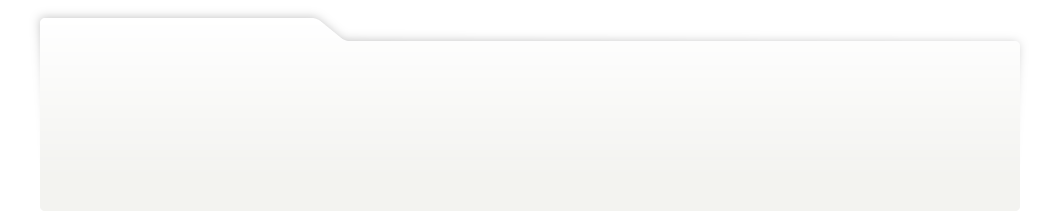
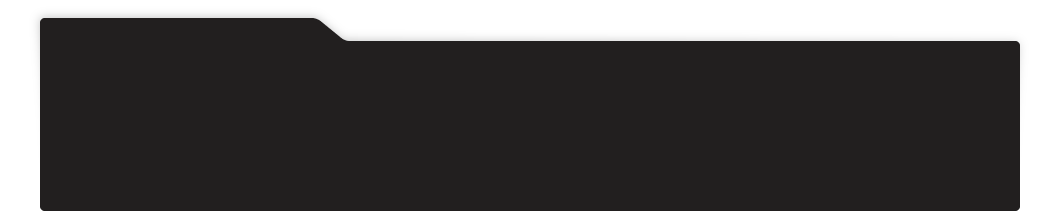
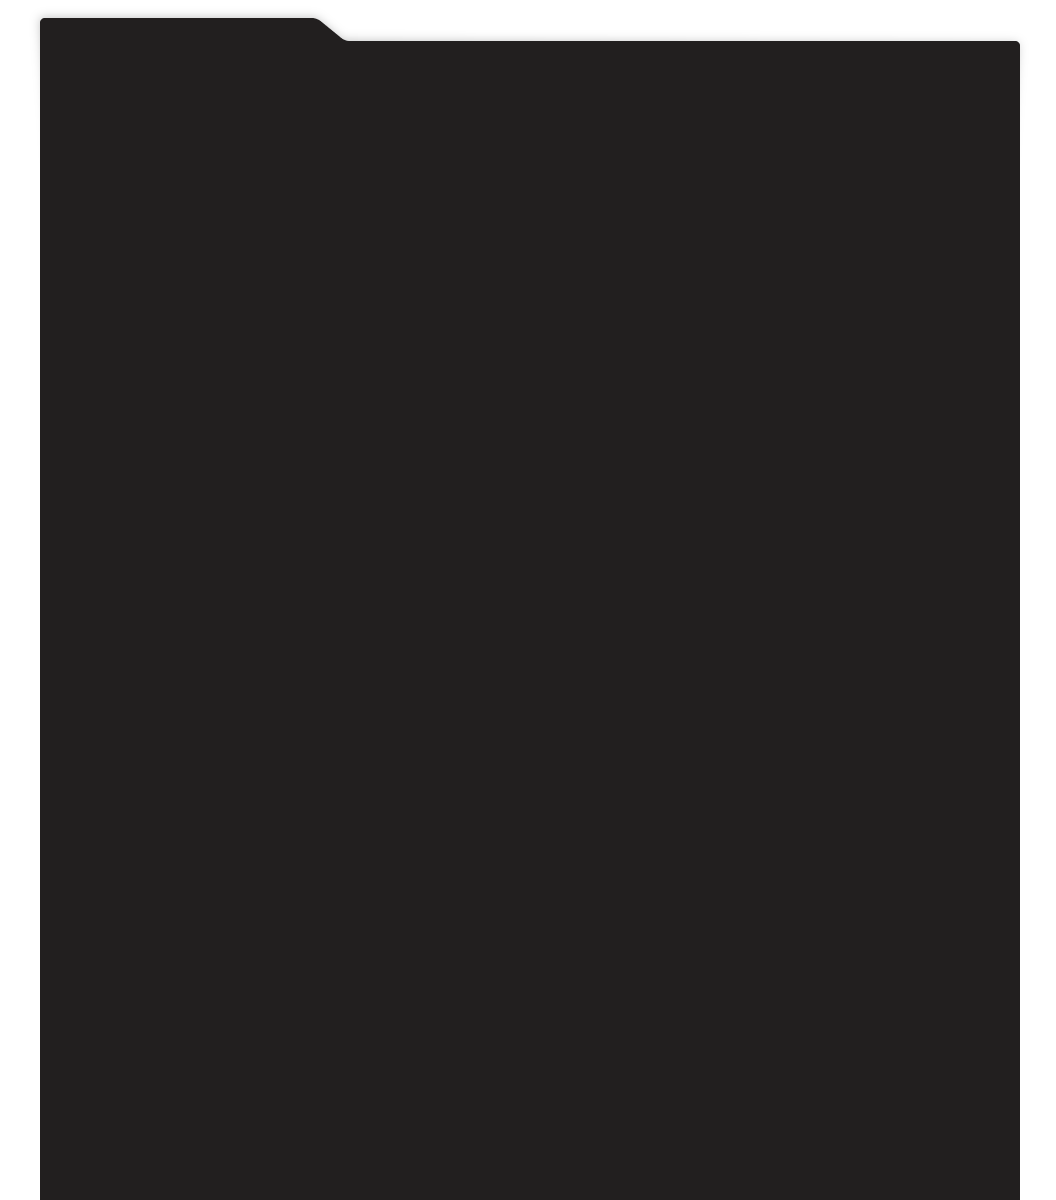
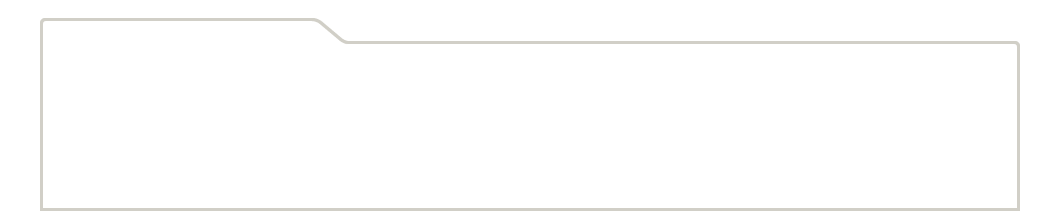
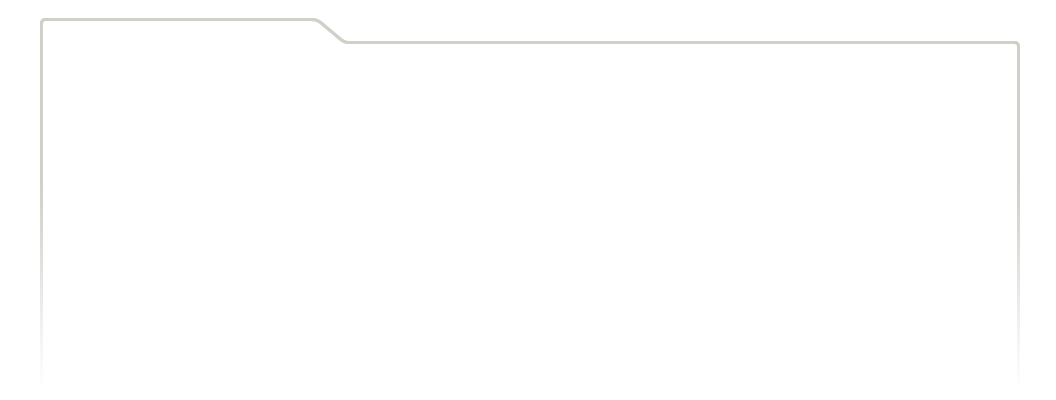
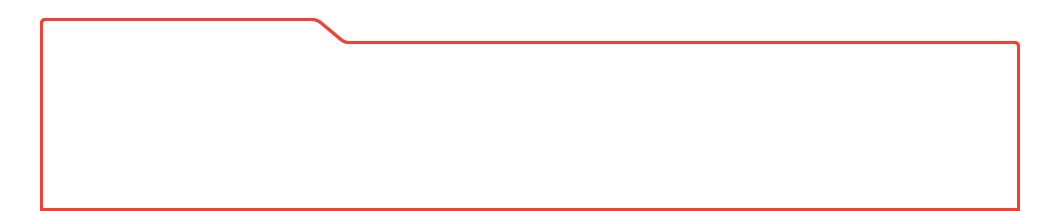
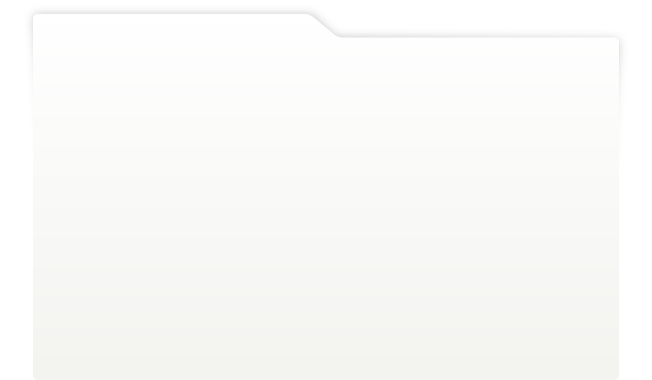
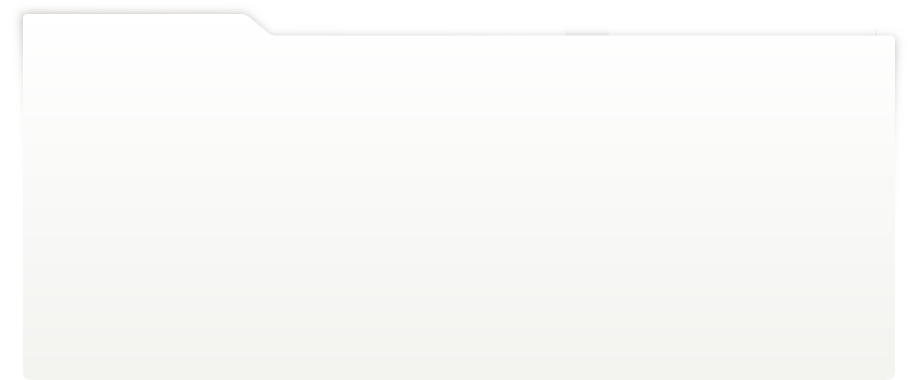
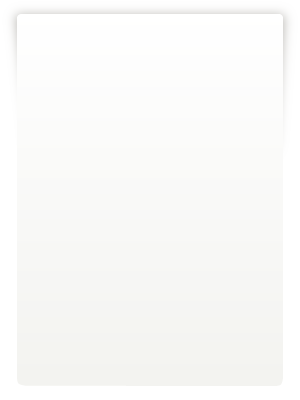
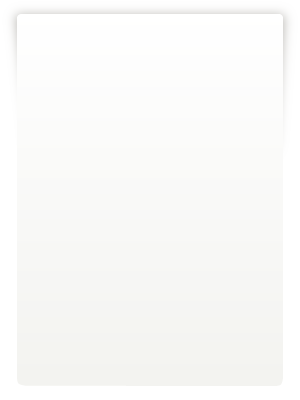
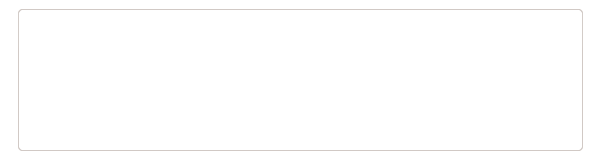
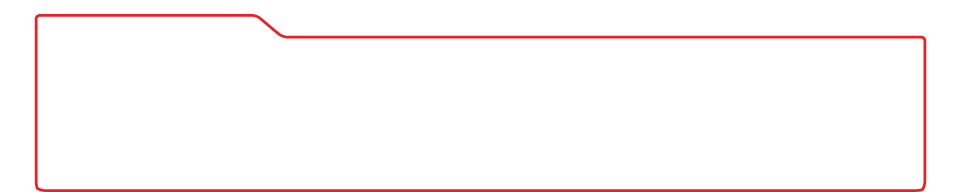
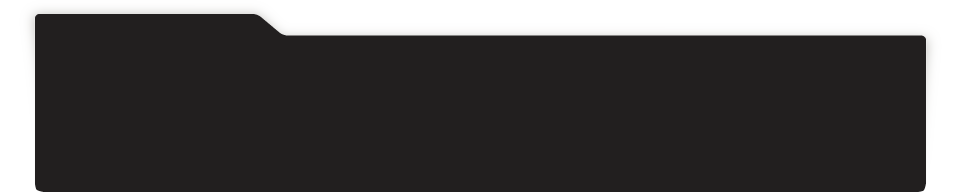
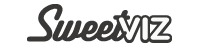
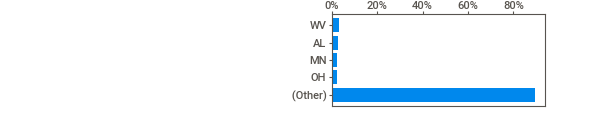
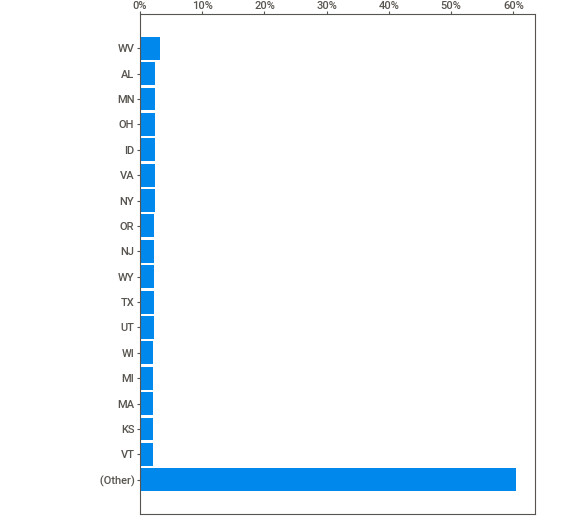
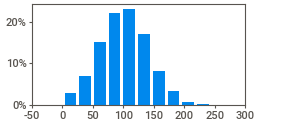
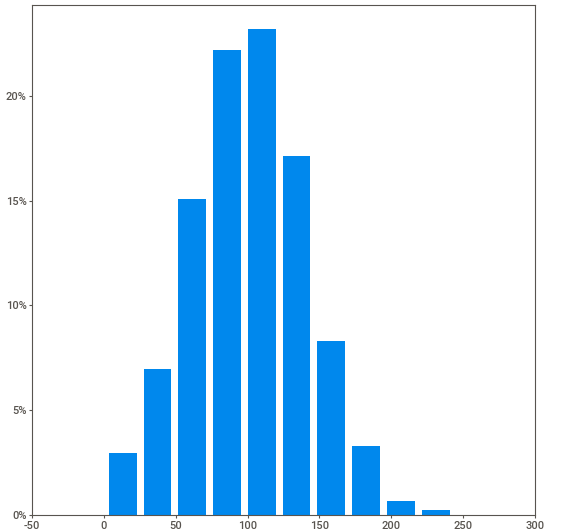
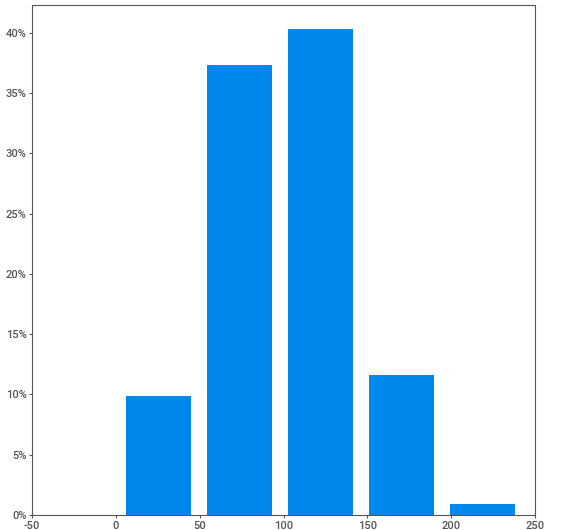
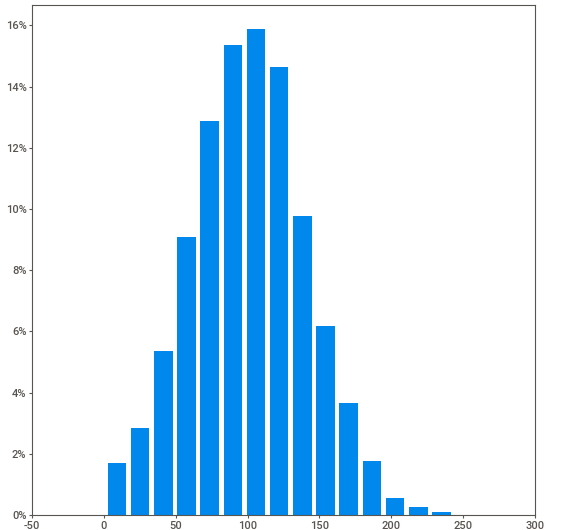
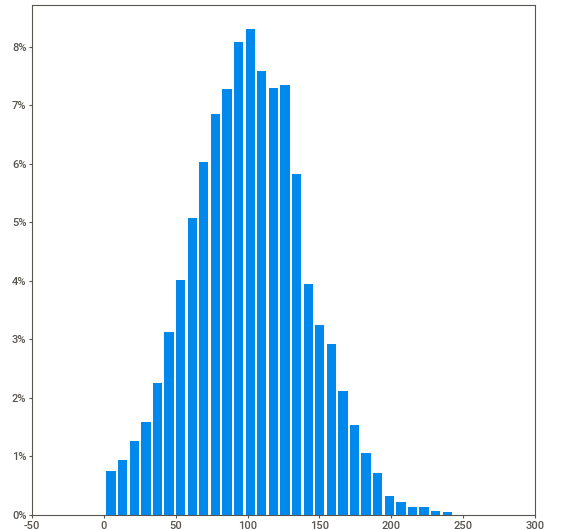
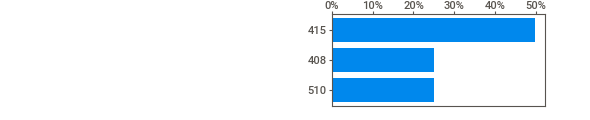
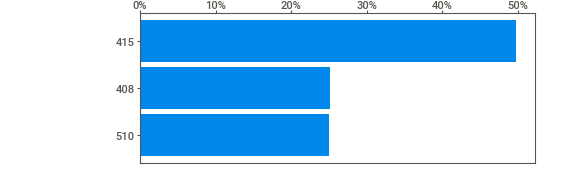
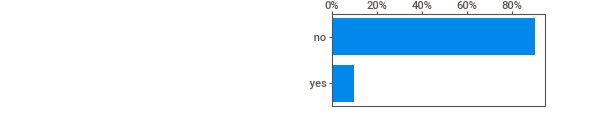
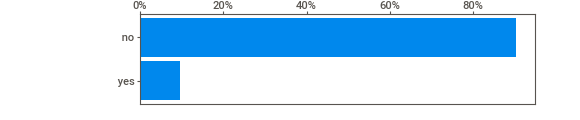
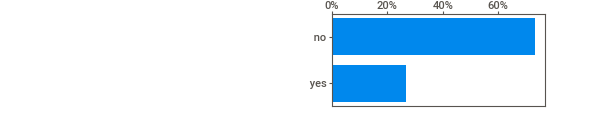
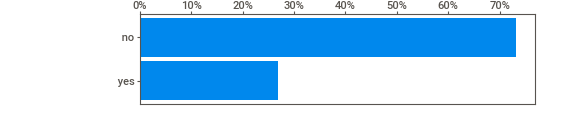
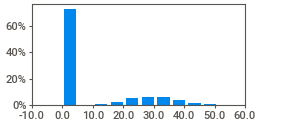
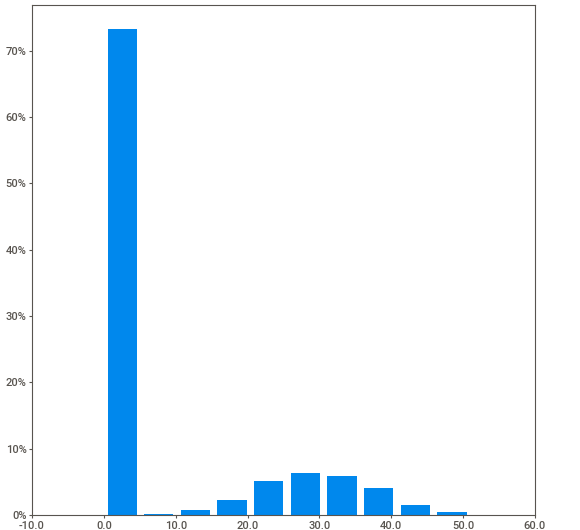
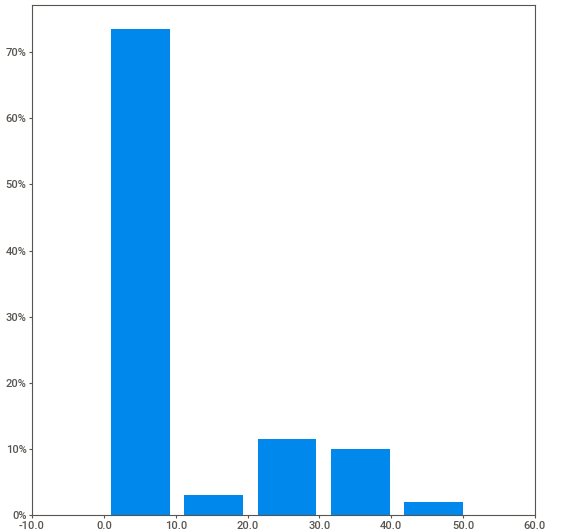
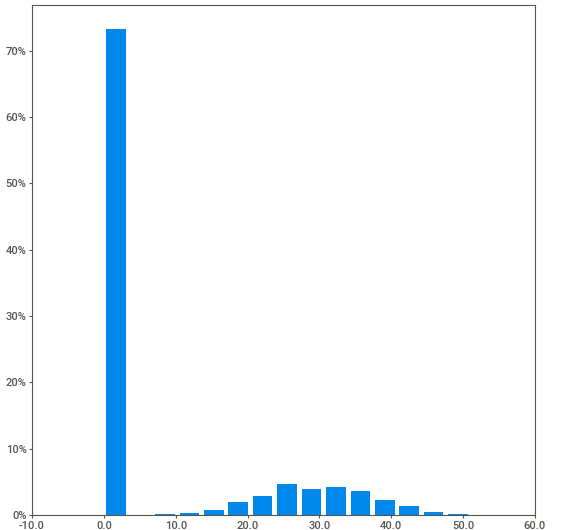
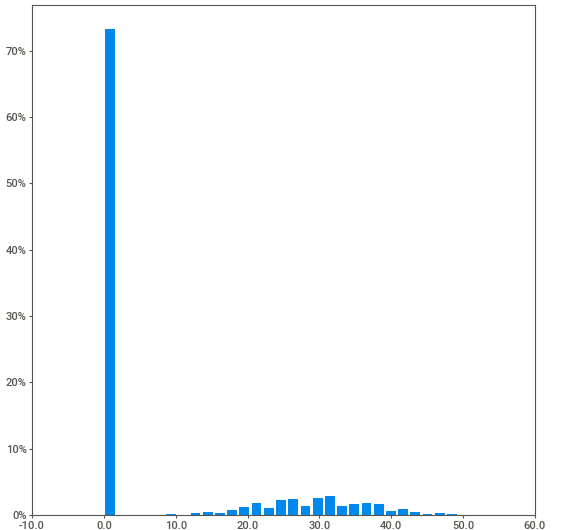
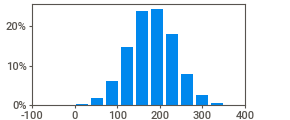
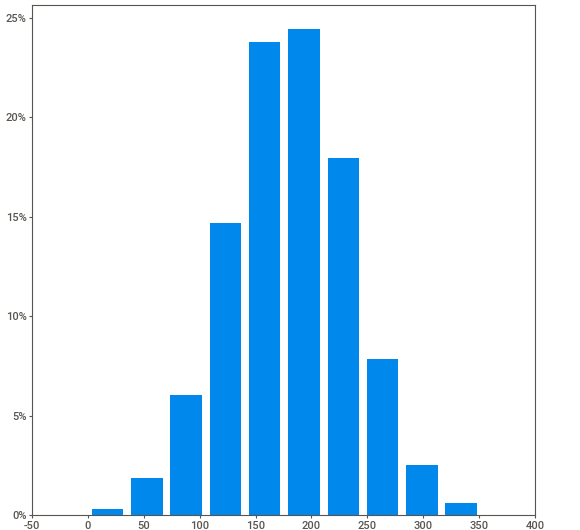
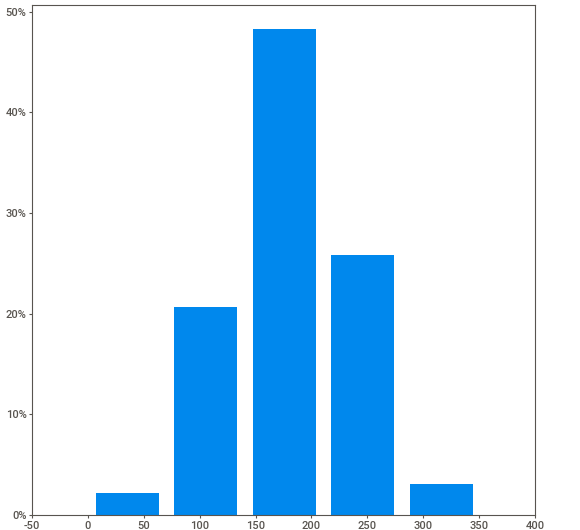
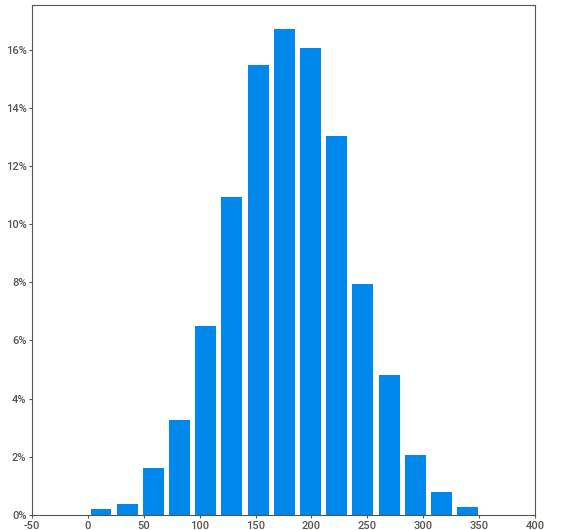
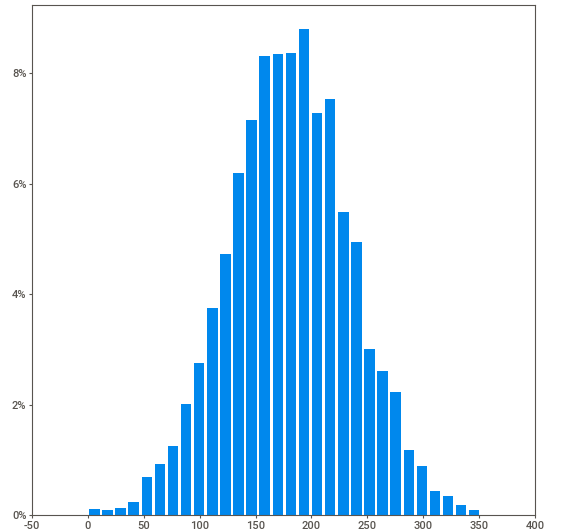
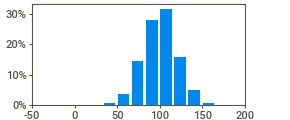
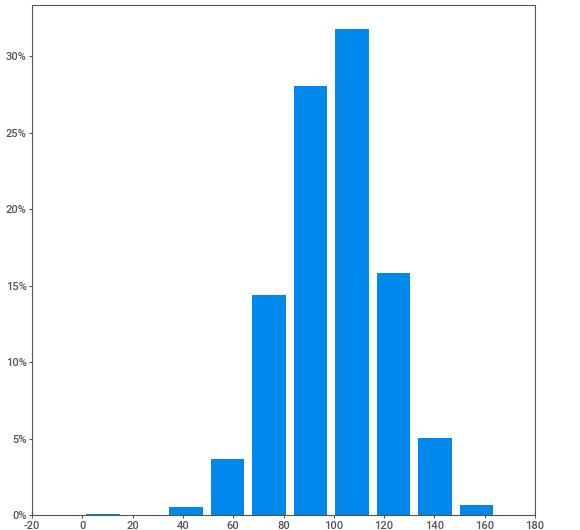
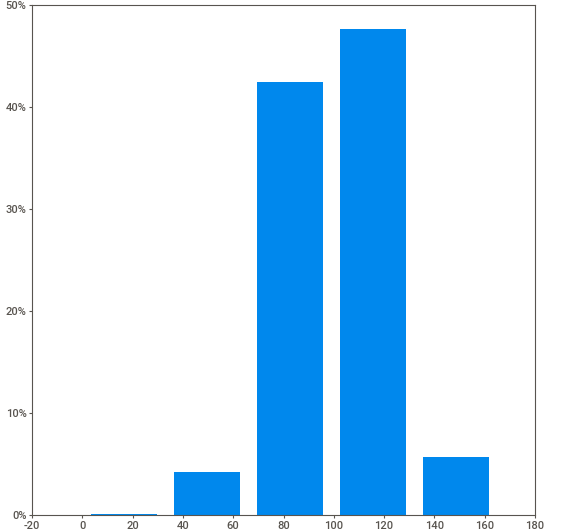
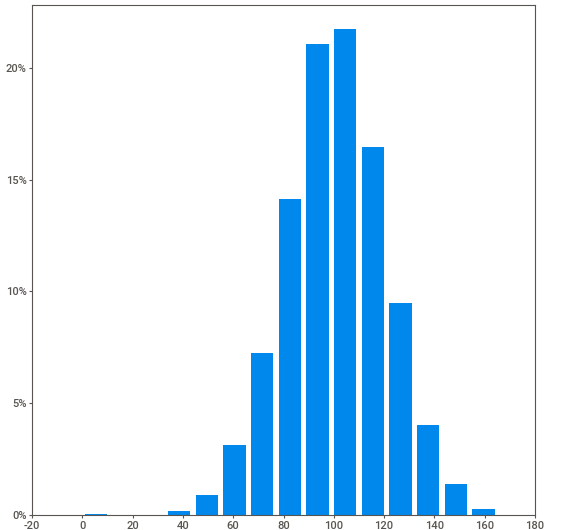
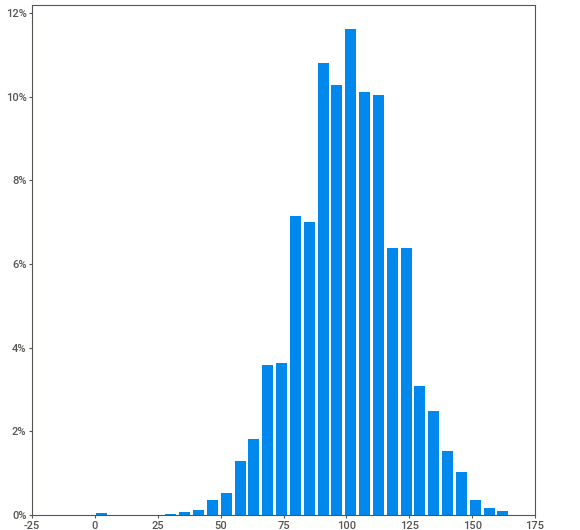
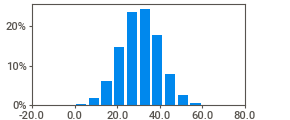
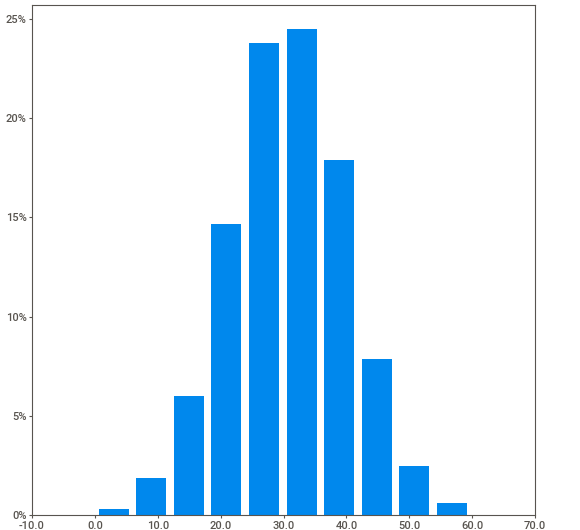
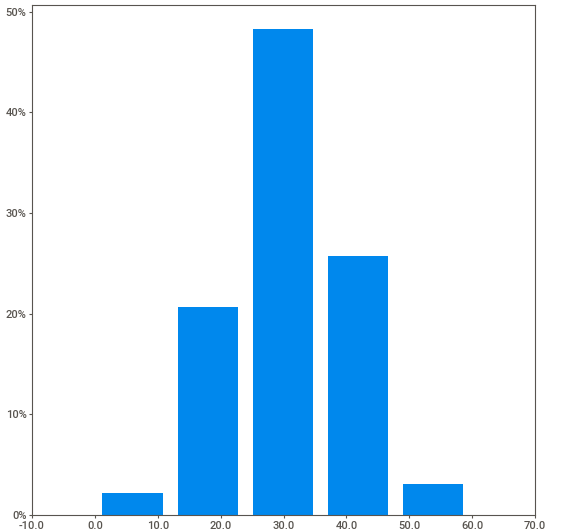
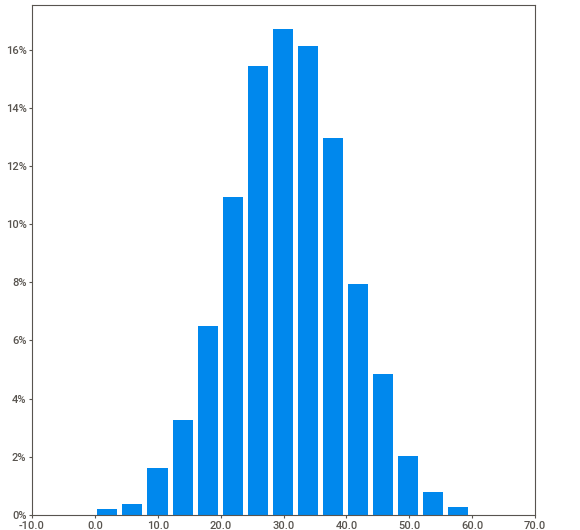
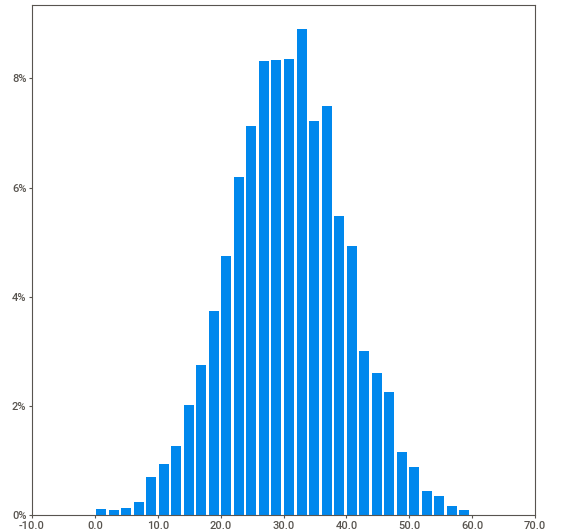
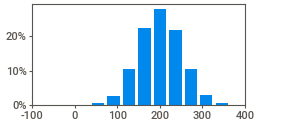
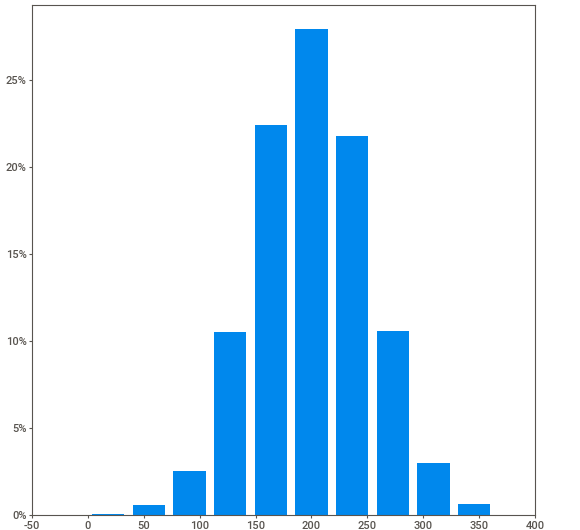
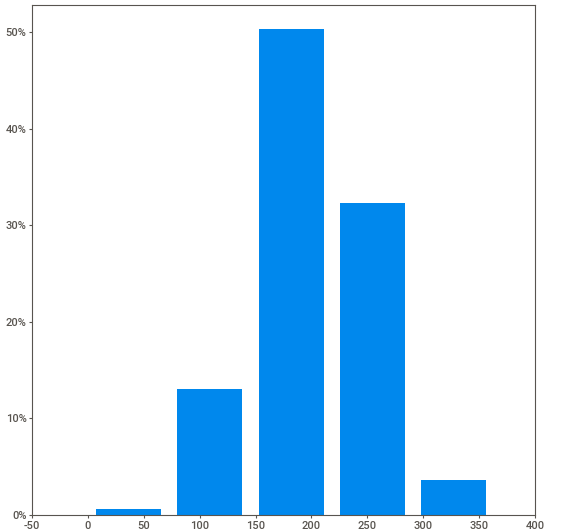
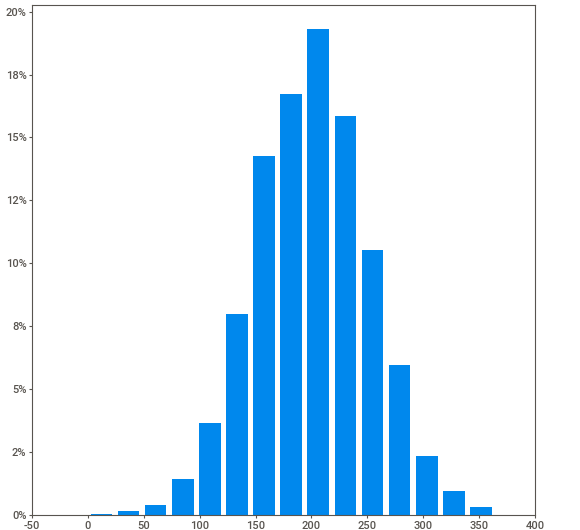
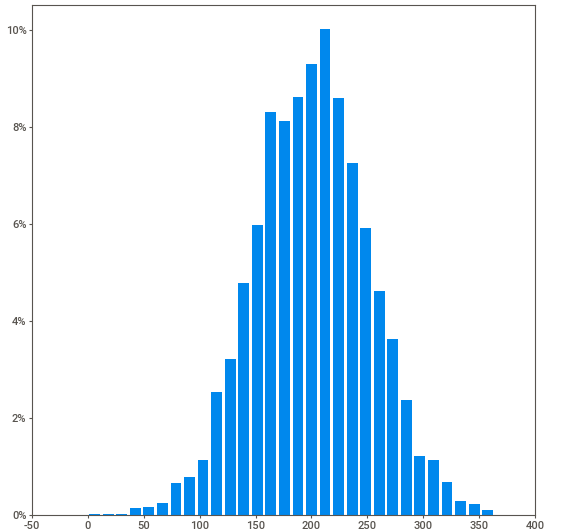
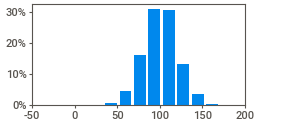
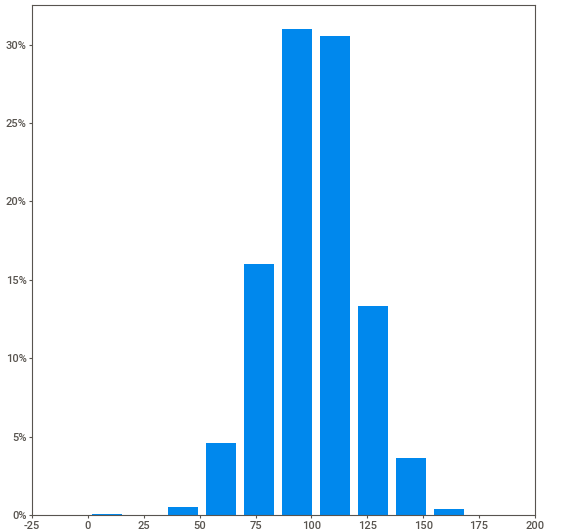
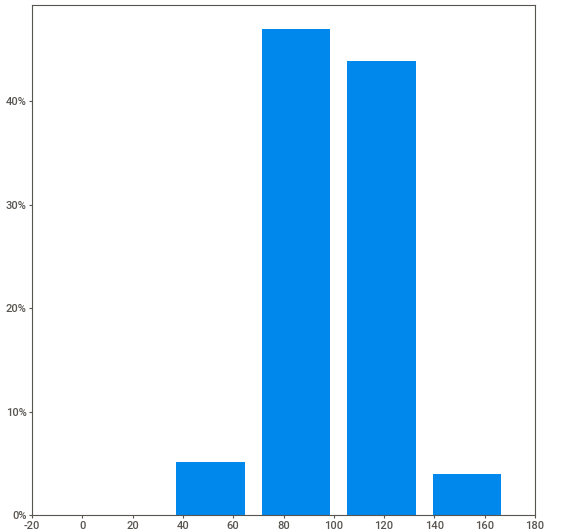
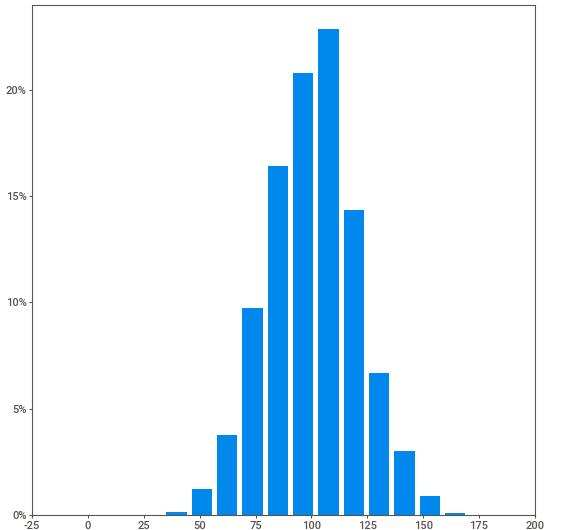
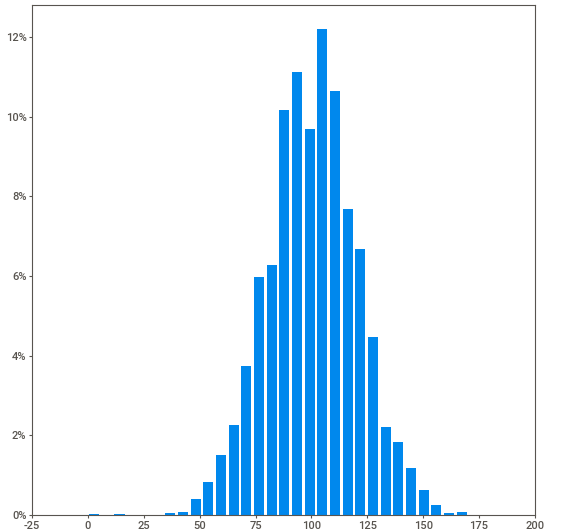
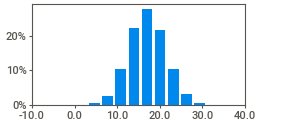
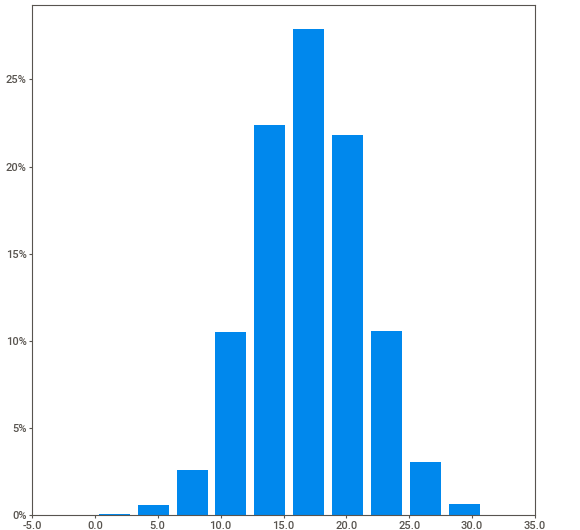
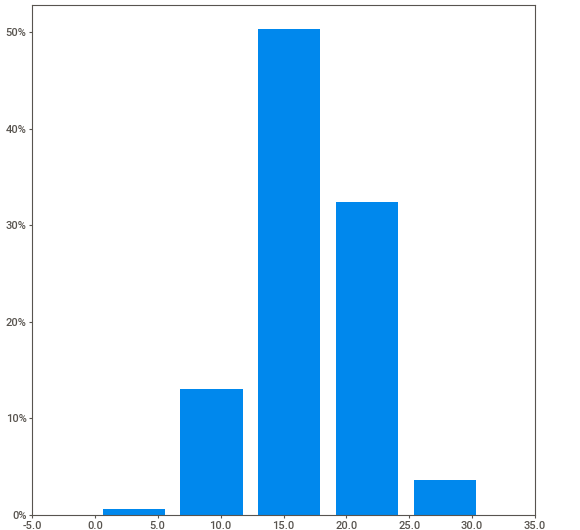
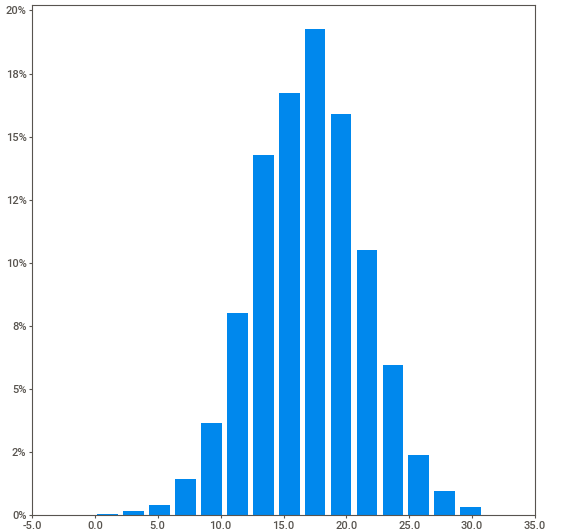
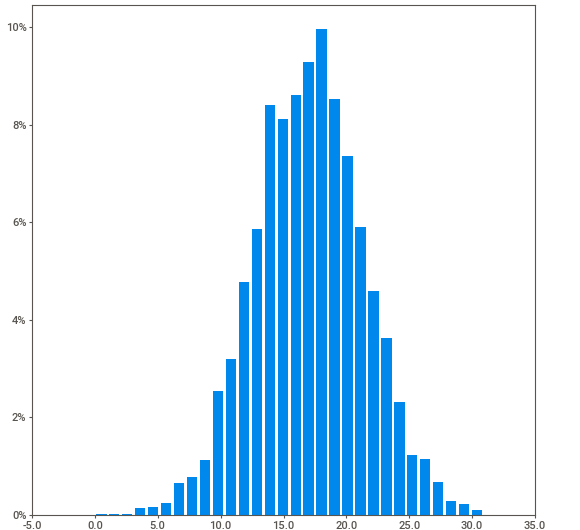
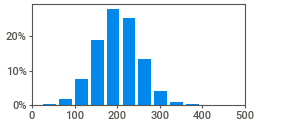
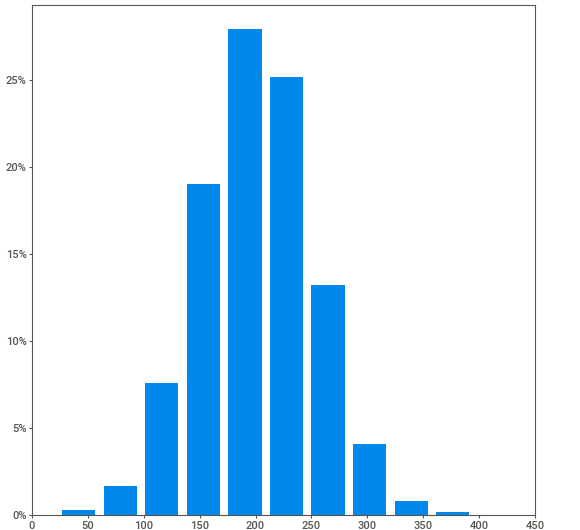
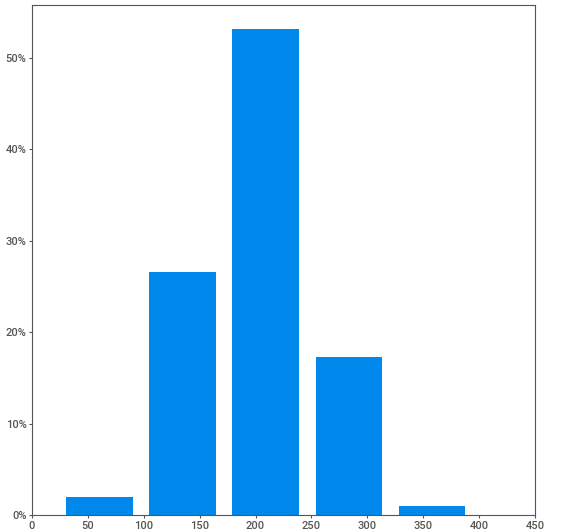
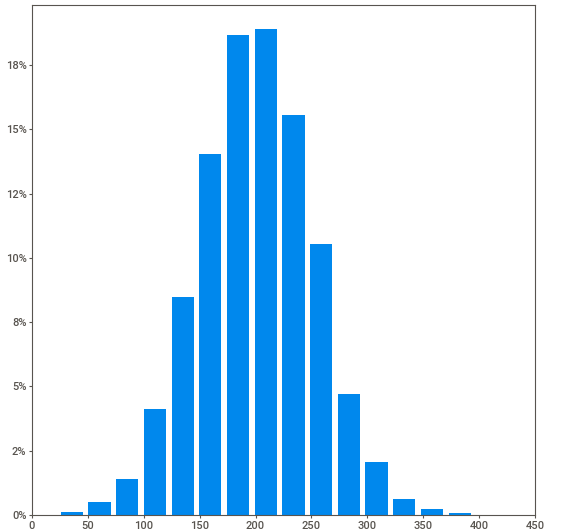
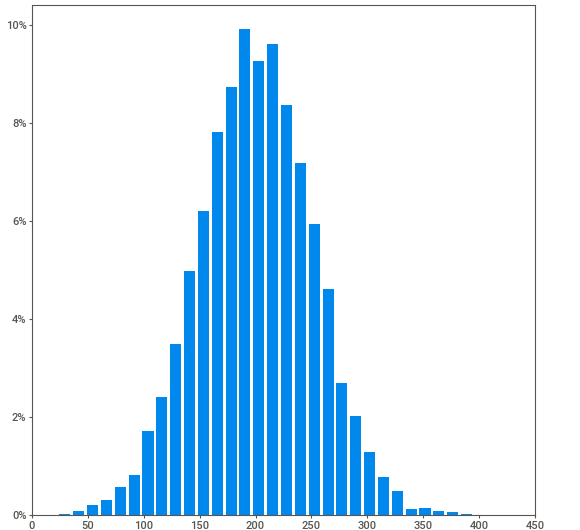
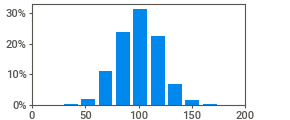
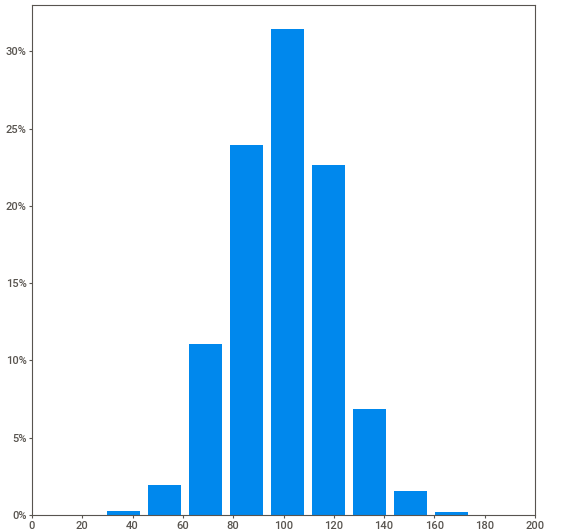
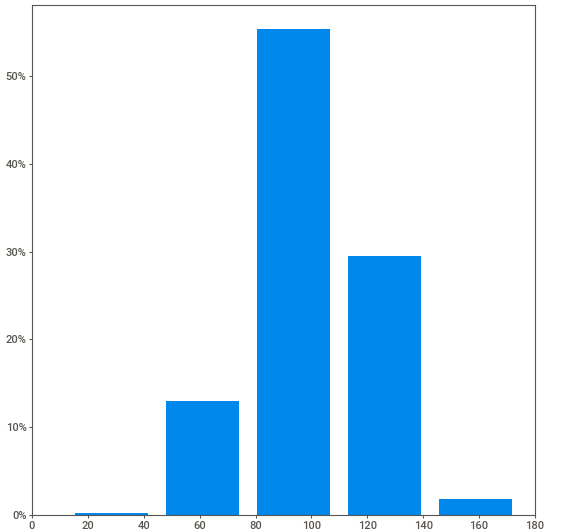
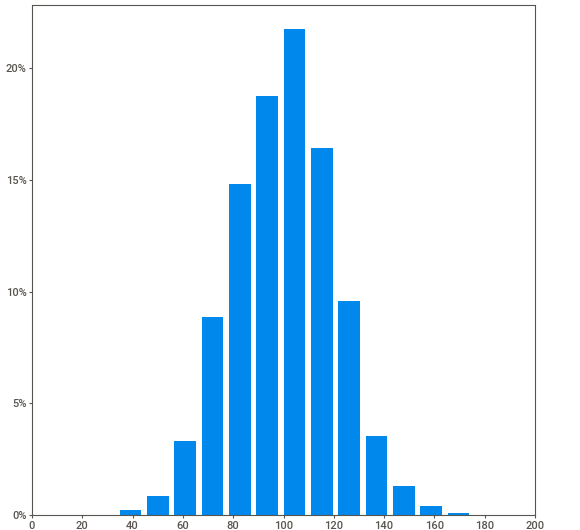
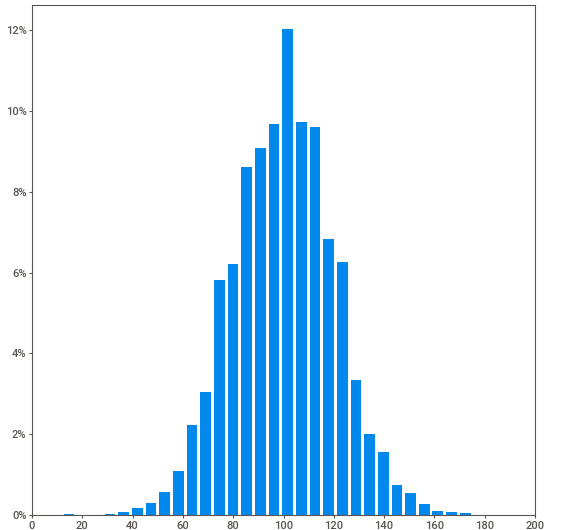
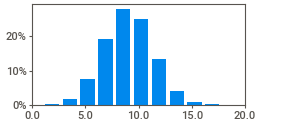
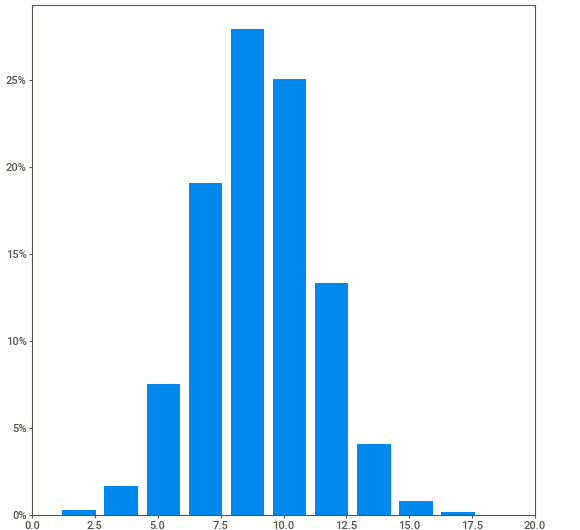
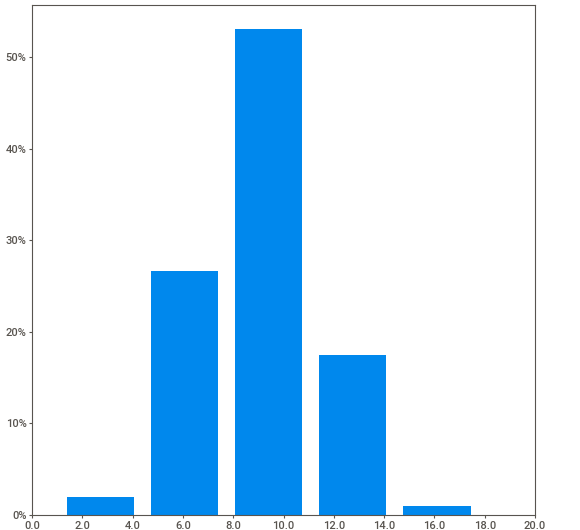
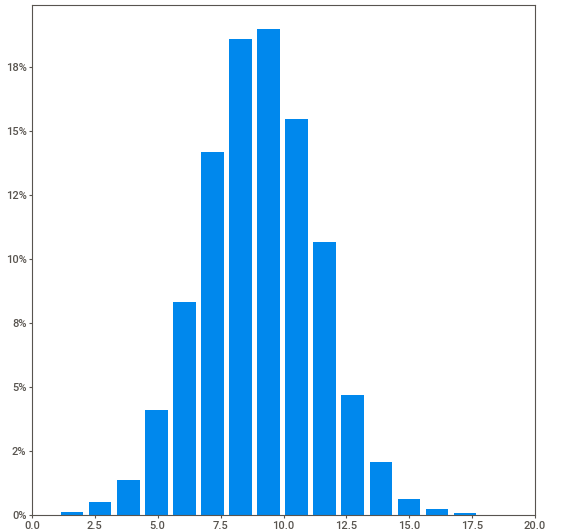
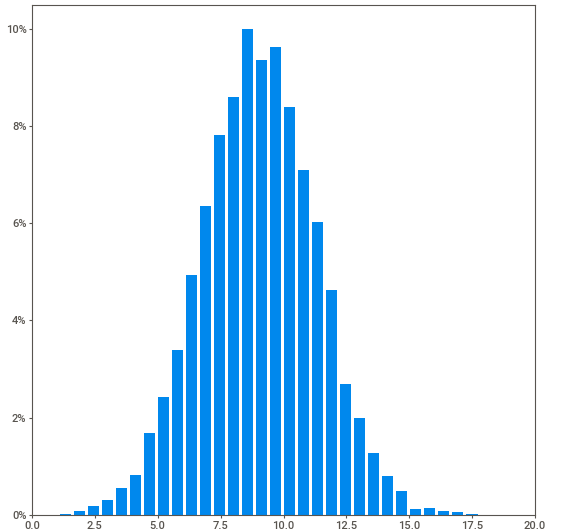
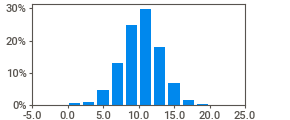
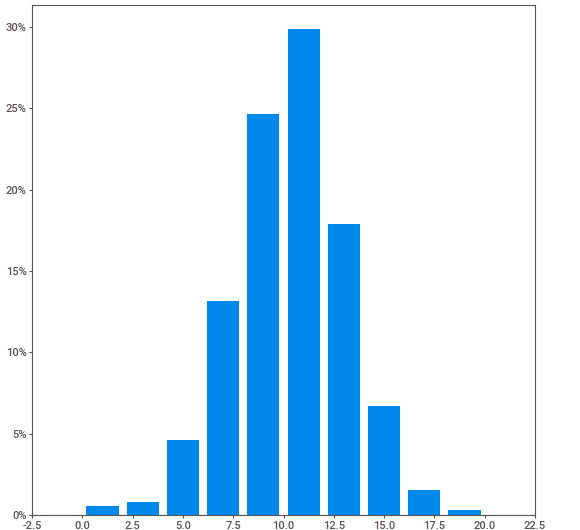
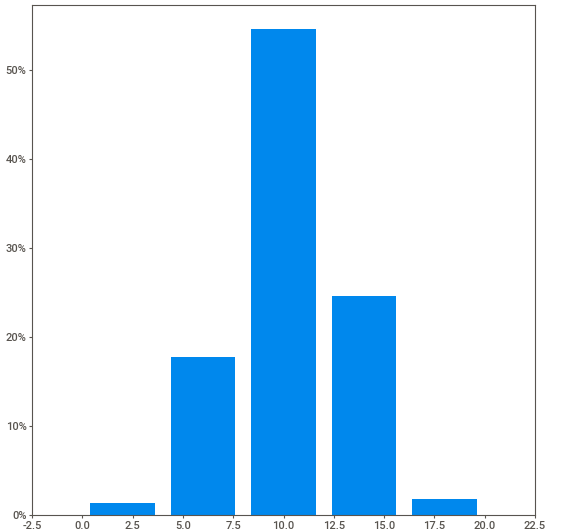
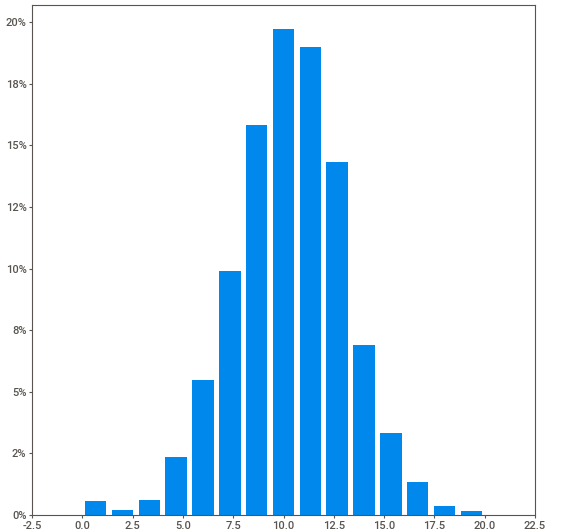
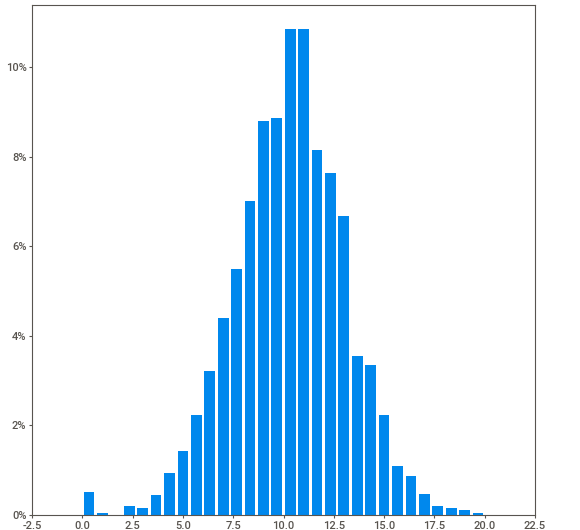
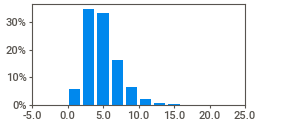
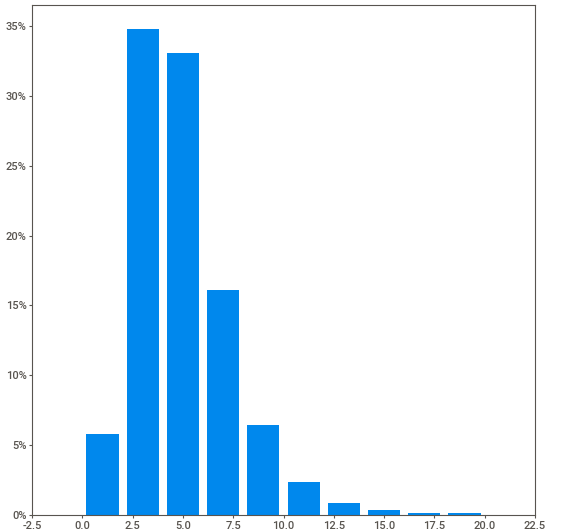
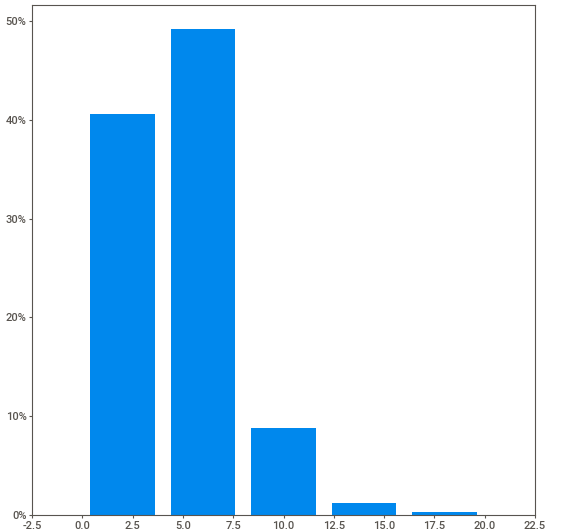
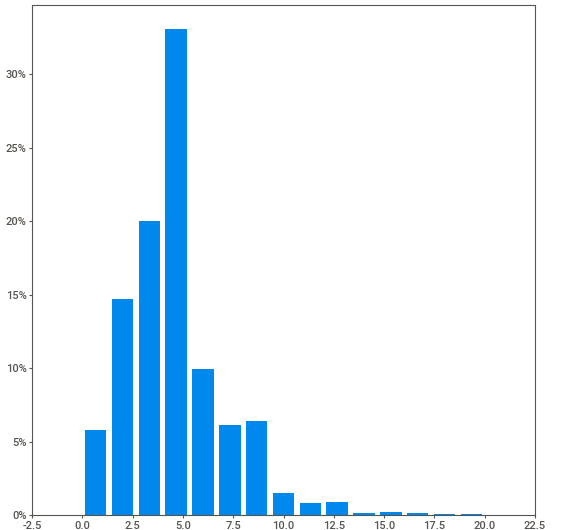
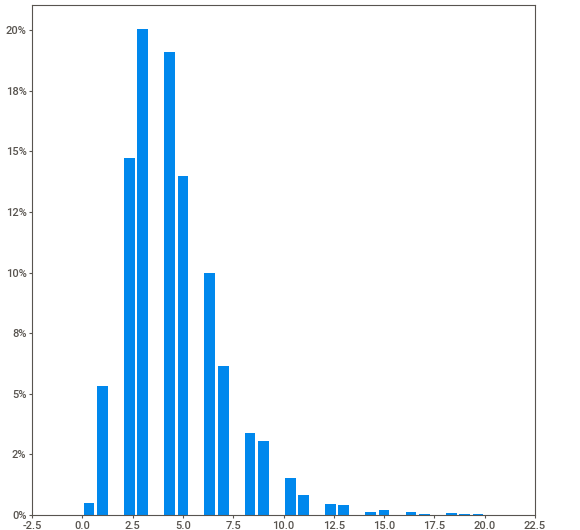
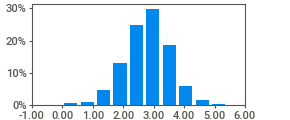
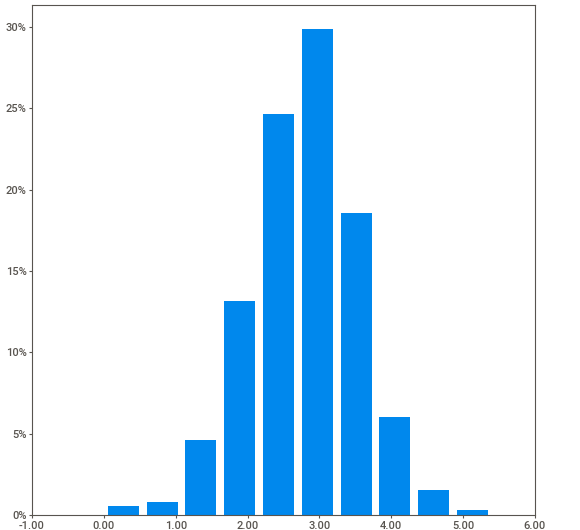
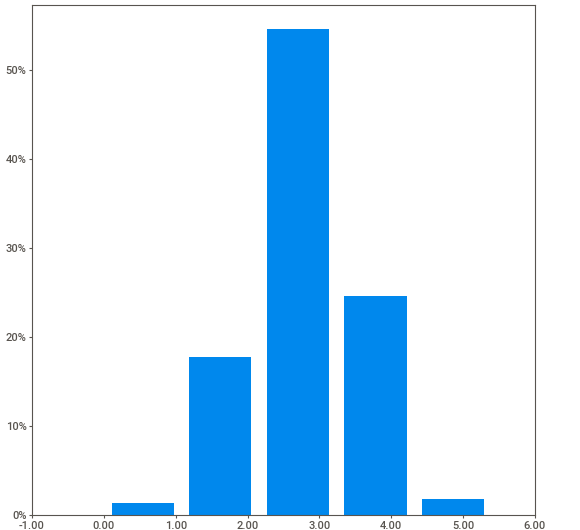
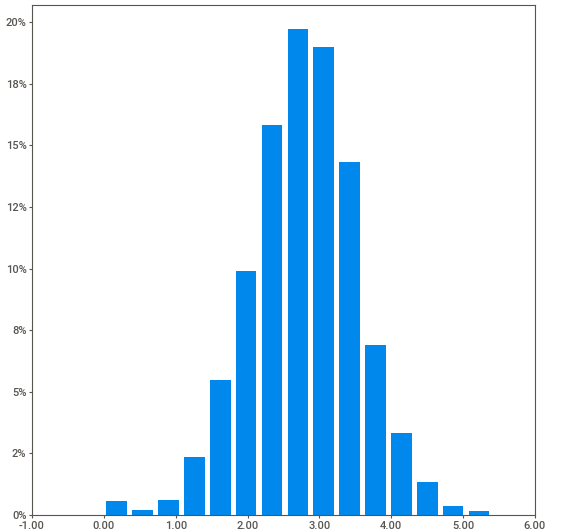
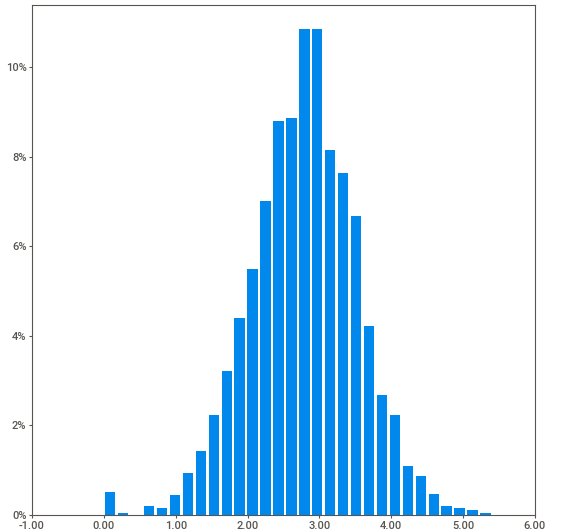
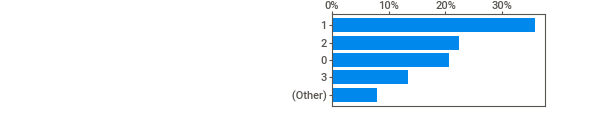
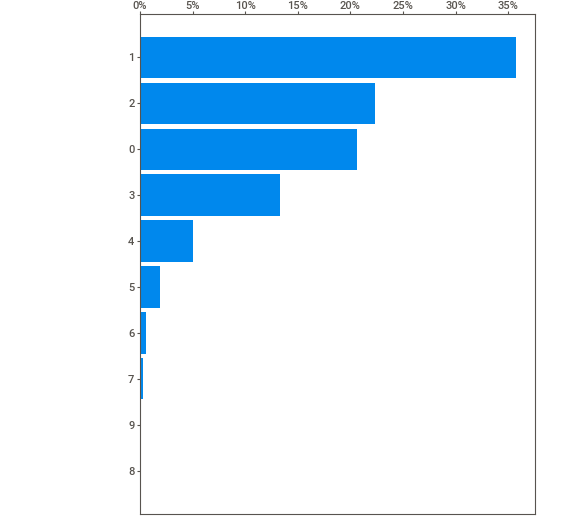
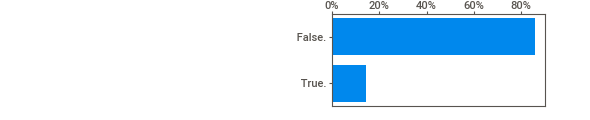
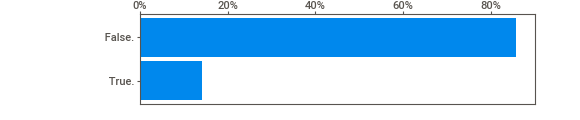
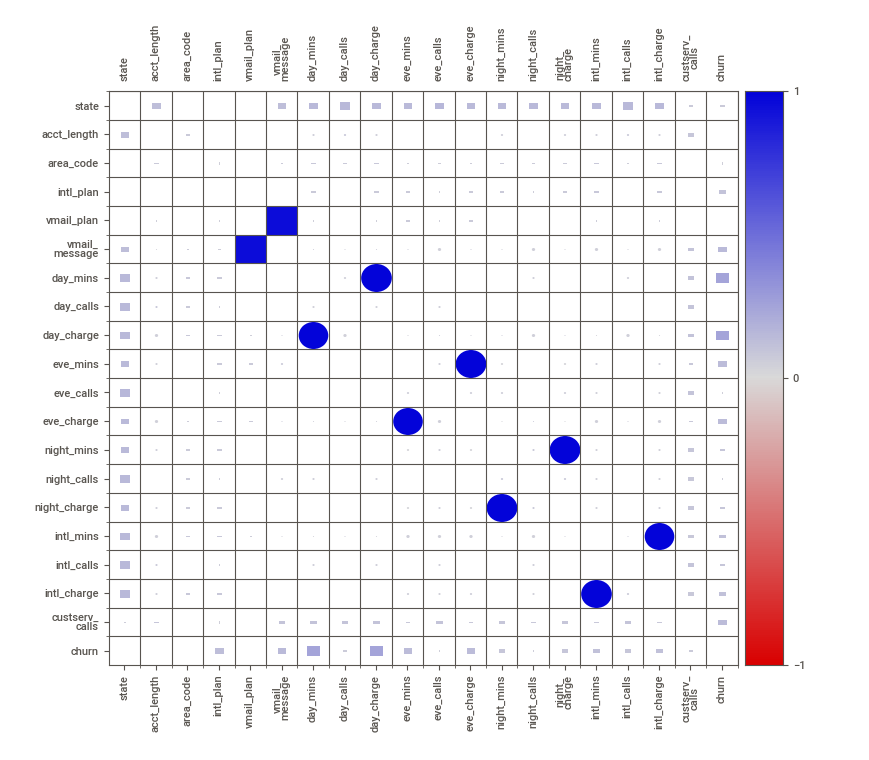
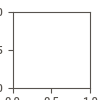

In [19]:
import sweetviz as sv
my_report = sv.analyze(df)## pass the original dataframe
my_report.show_notebook()

In [20]:
# Plot the distribution of the categorical variables against target variables

In [21]:
import seaborn as sn
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = (5,5)

<AxesSubplot:xlabel='state', ylabel='count'>

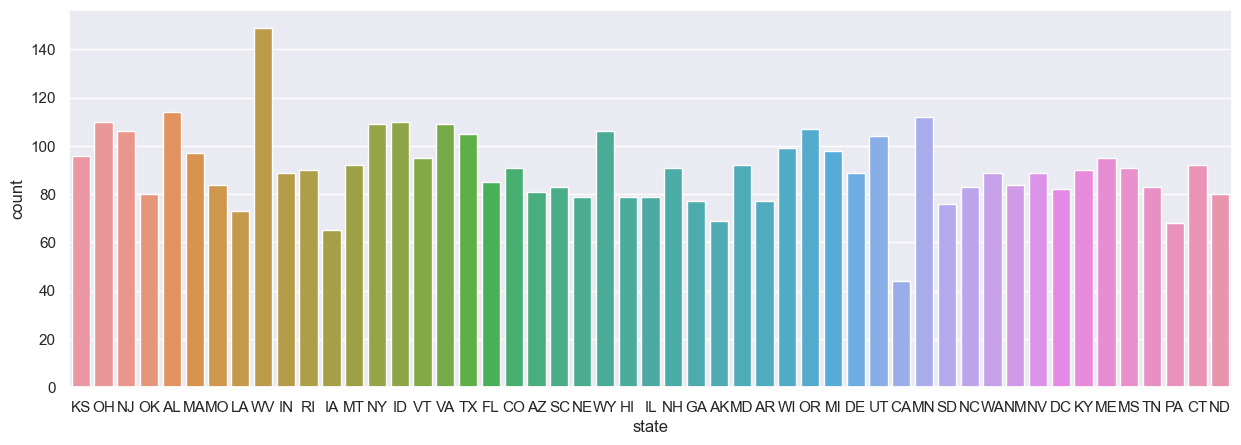

In [22]:
sn.set (rc= {'figure.figsize': (15,5)})
sn.countplot(x='state', data=df)

In [23]:
#Relational bar graph for checking data distribution with respect to target variable
def diff_bar(x,y):
    
    df.groupby([x,y]).size().unstack(level=-1).plot(kind='bar', figsize=(35,10))
    plt.xlabel(x,fontsize= 25)
    plt.ylabel('count',fontsize= 25)
    plt.legend(loc=0,fontsize= 25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.title("{X} Vs {Y}".format(X=x,Y=y),fontsize = 40)
    plt.show()

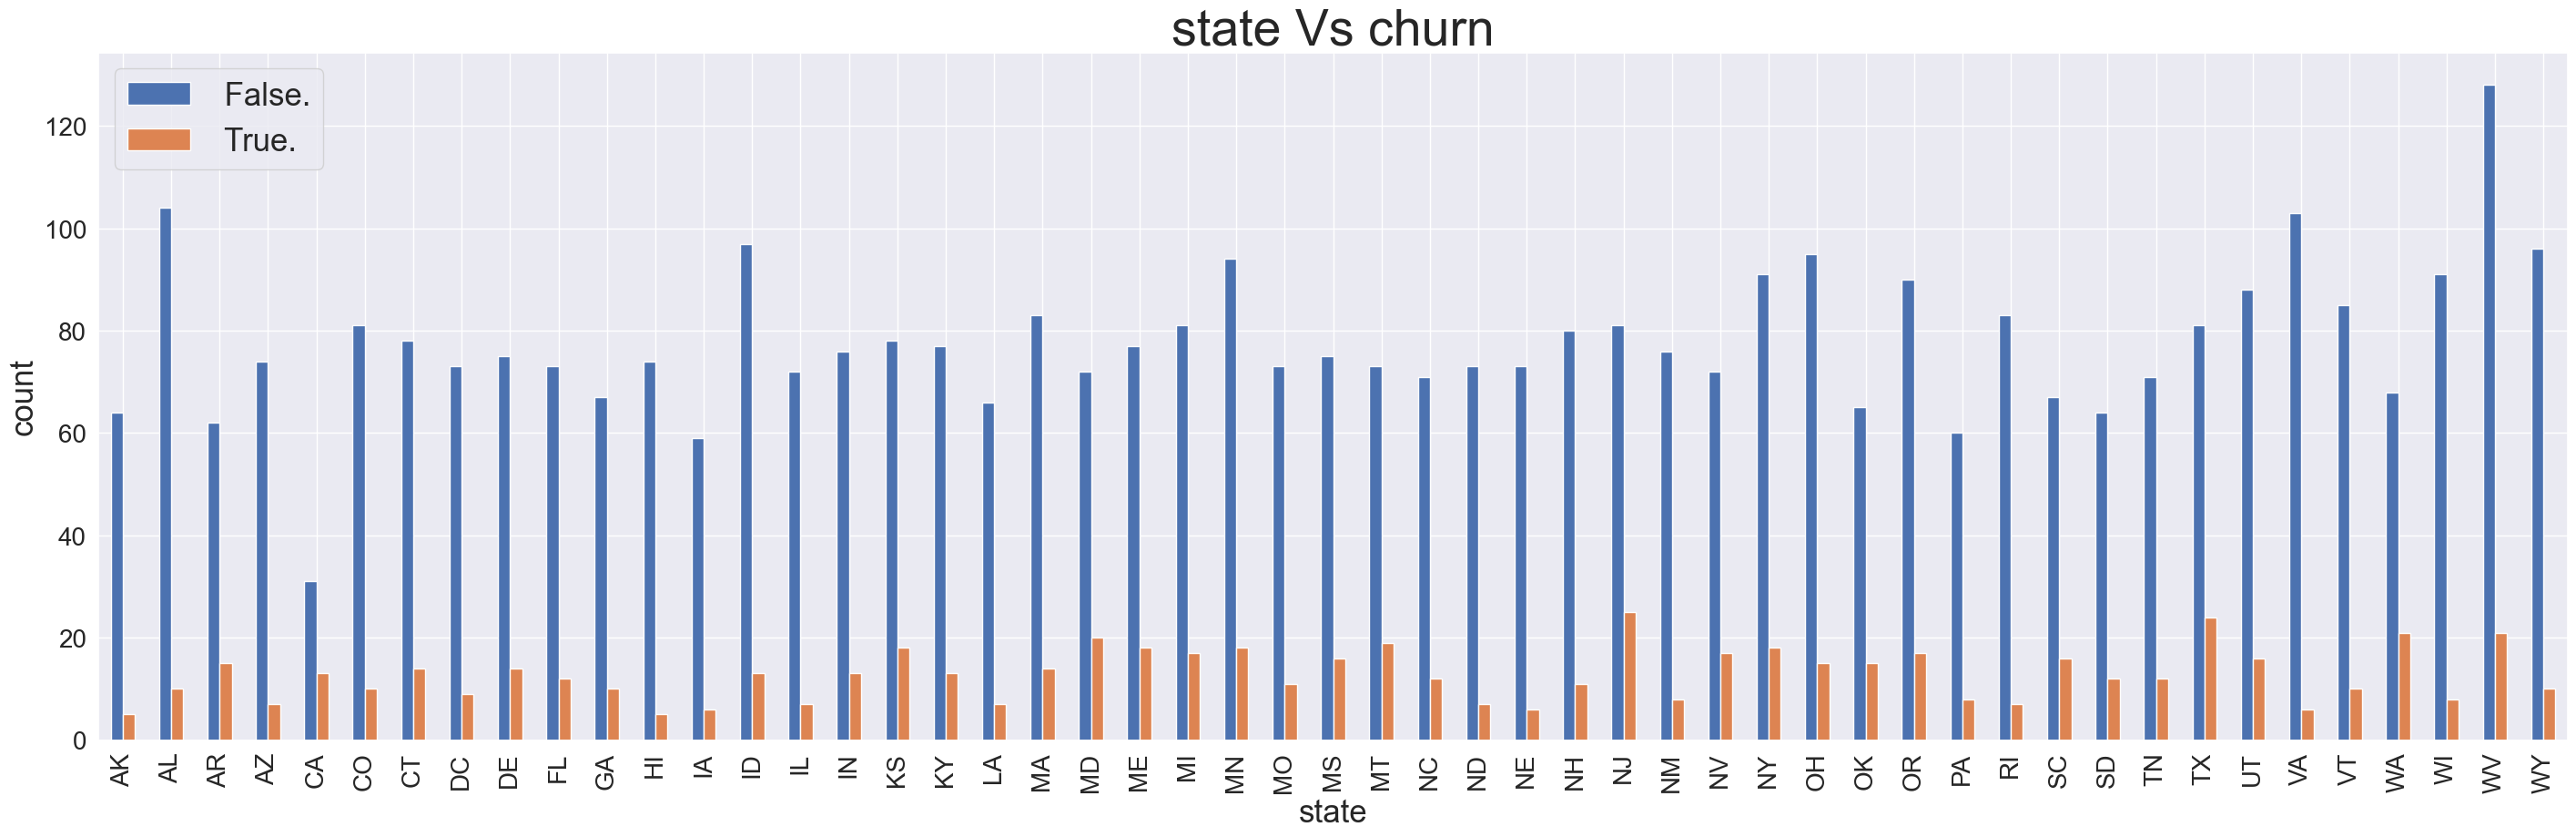

In [24]:
#State Wise Churning of customer
diff_bar('state','churn')

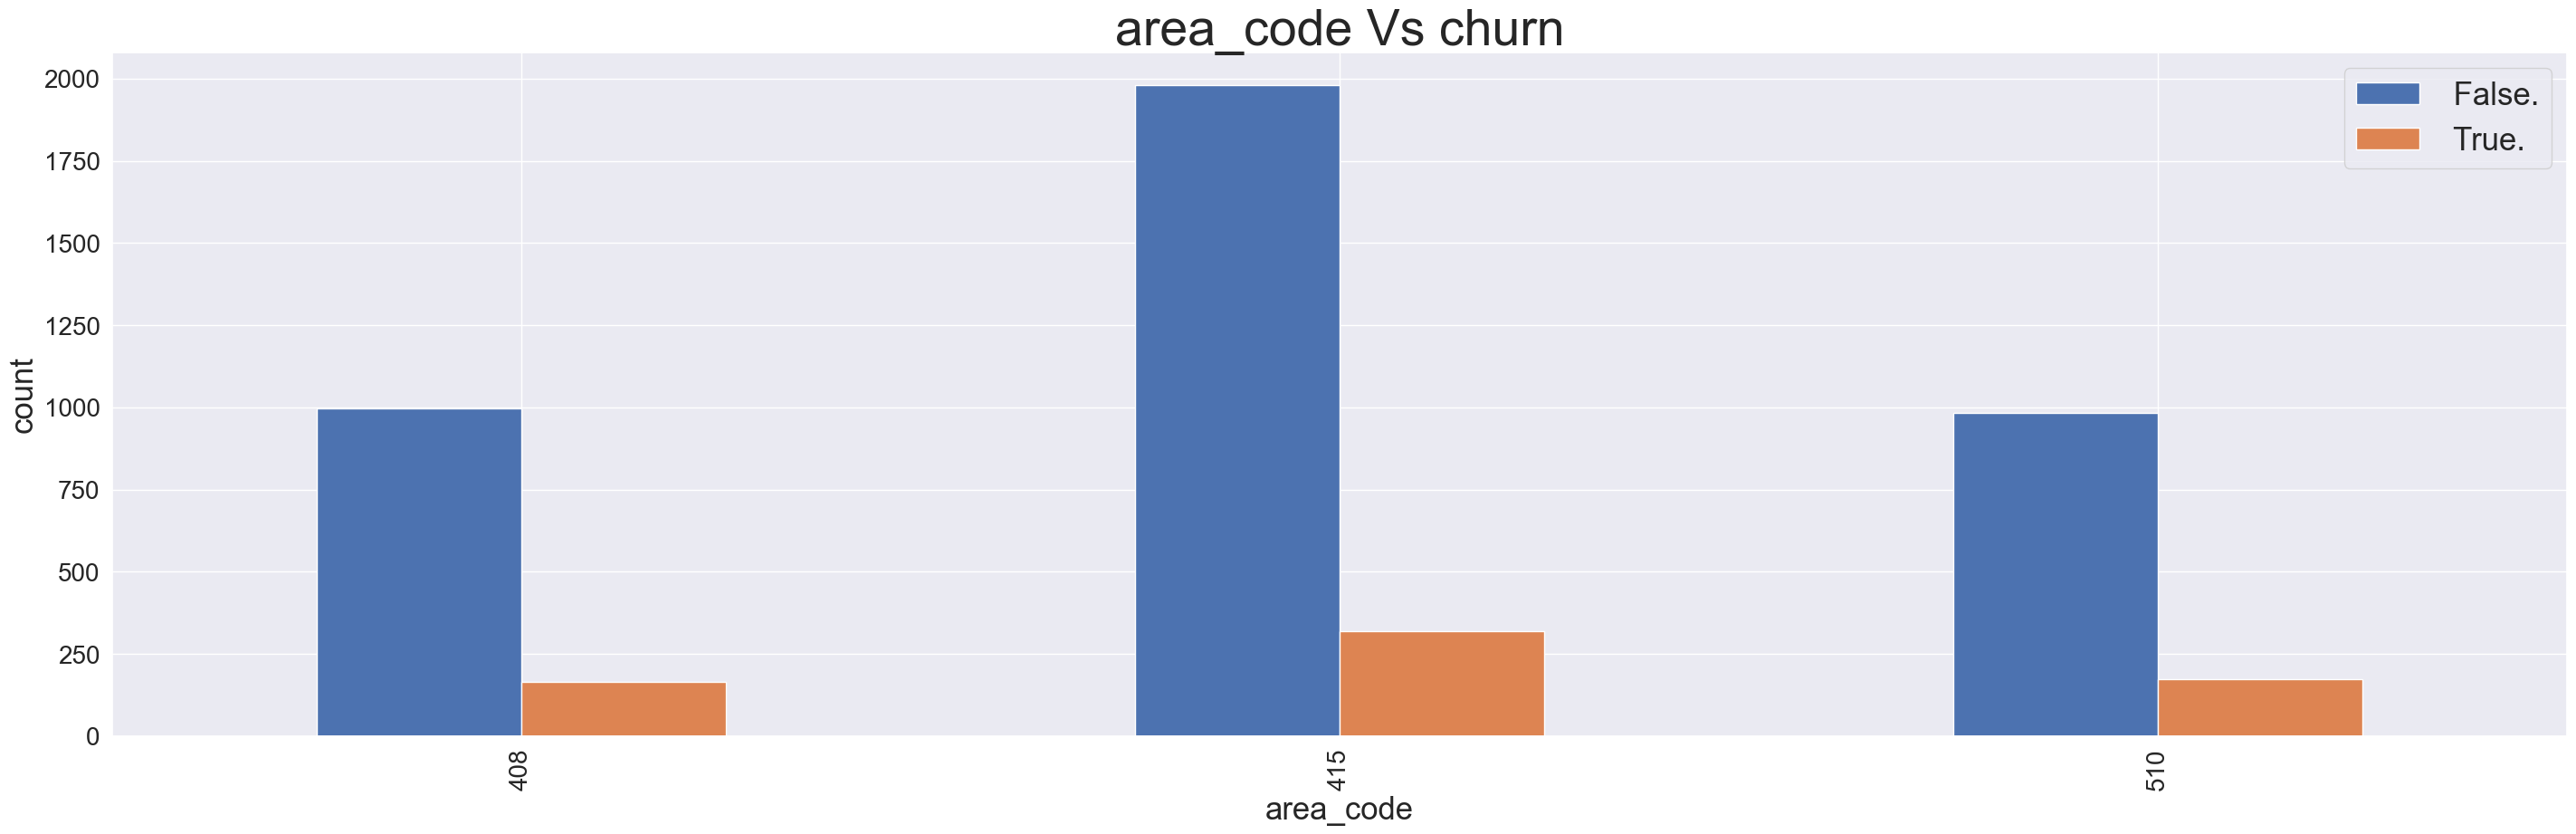

In [25]:
#area_code Wise Churning of customer
diff_bar('area_code','churn')

In [26]:
#The chances of churn for area code 408 is nearly 20%,for 415 it is almost 15% and for 510 it is 20%.

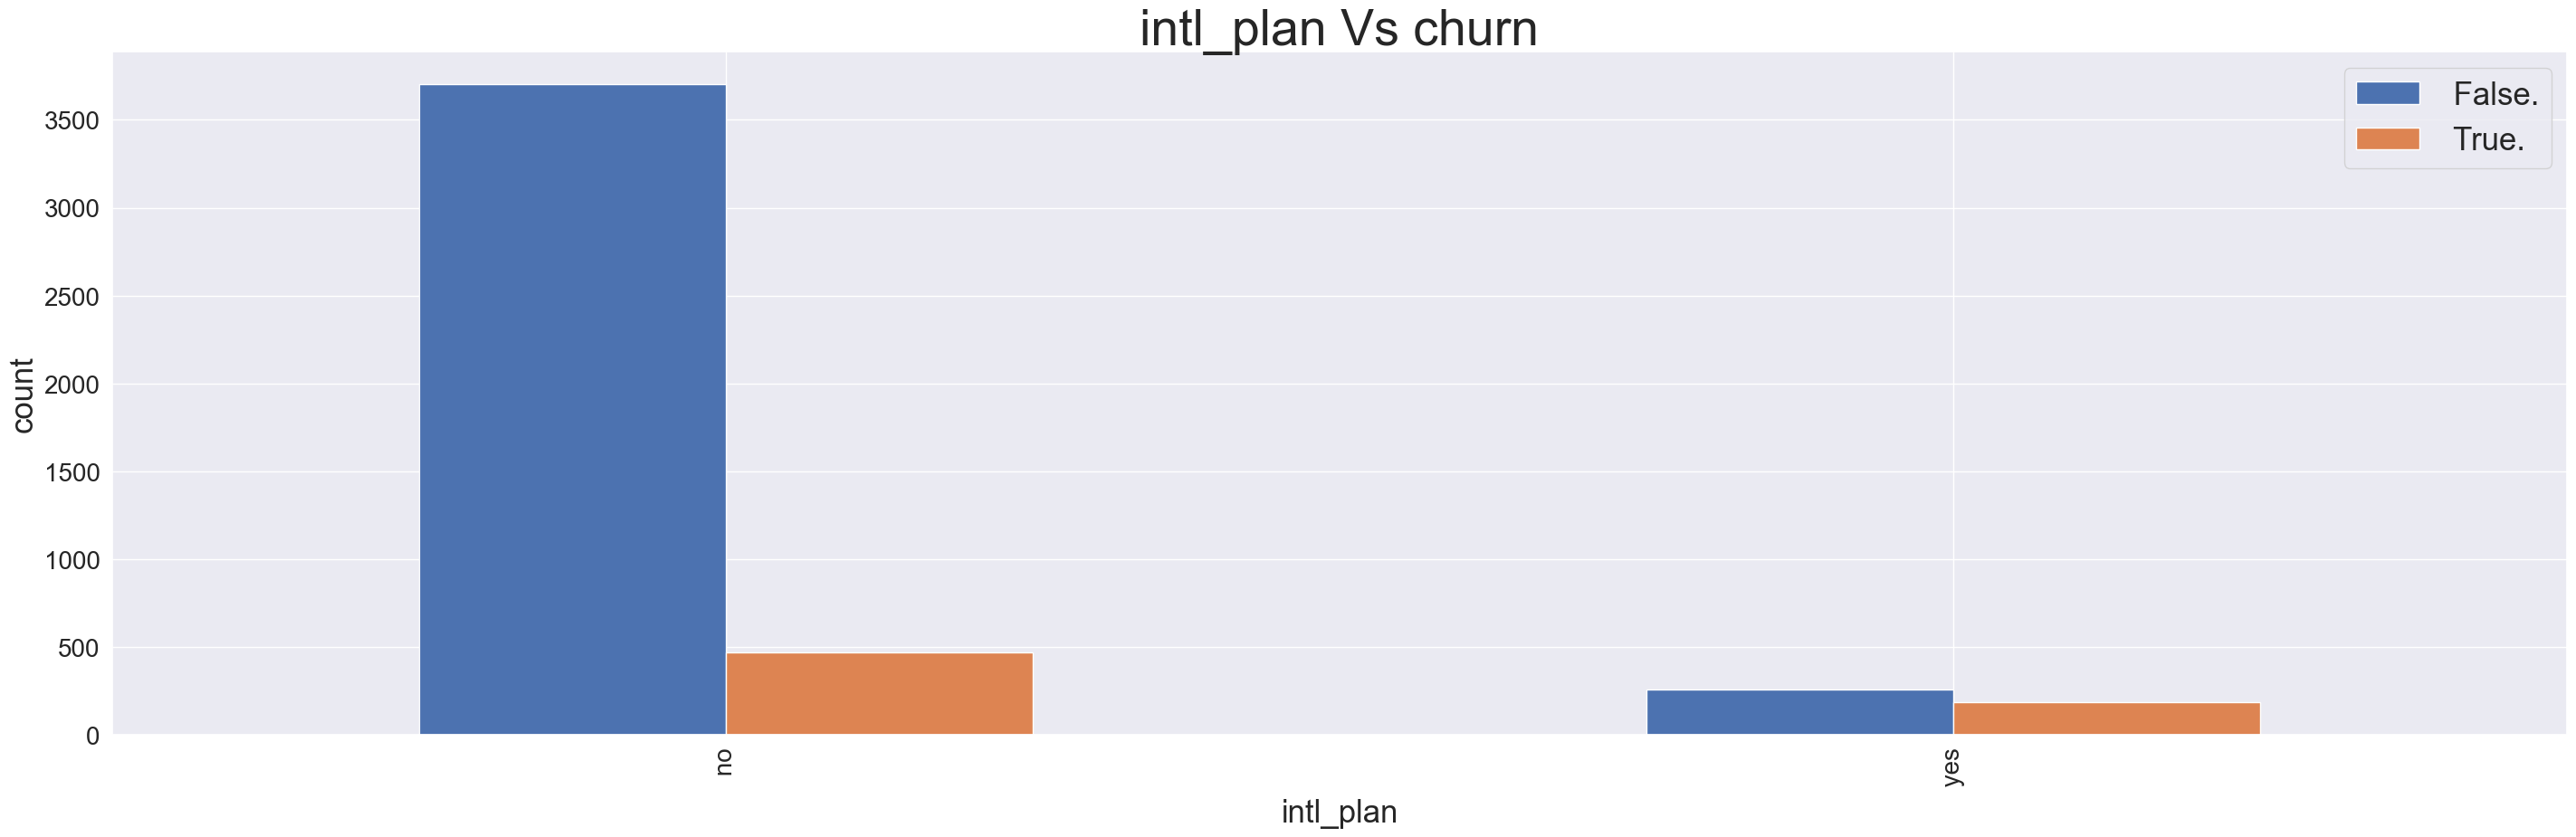

In [27]:
#International_Plan Wise Churning of customer
diff_bar('intl_plan','churn')

In [28]:
# The chances of churn is almost 50-50 for the customers opted for intl_plan. Chances of churn are still there for those who haven't opted this plan, 
# but it still there.

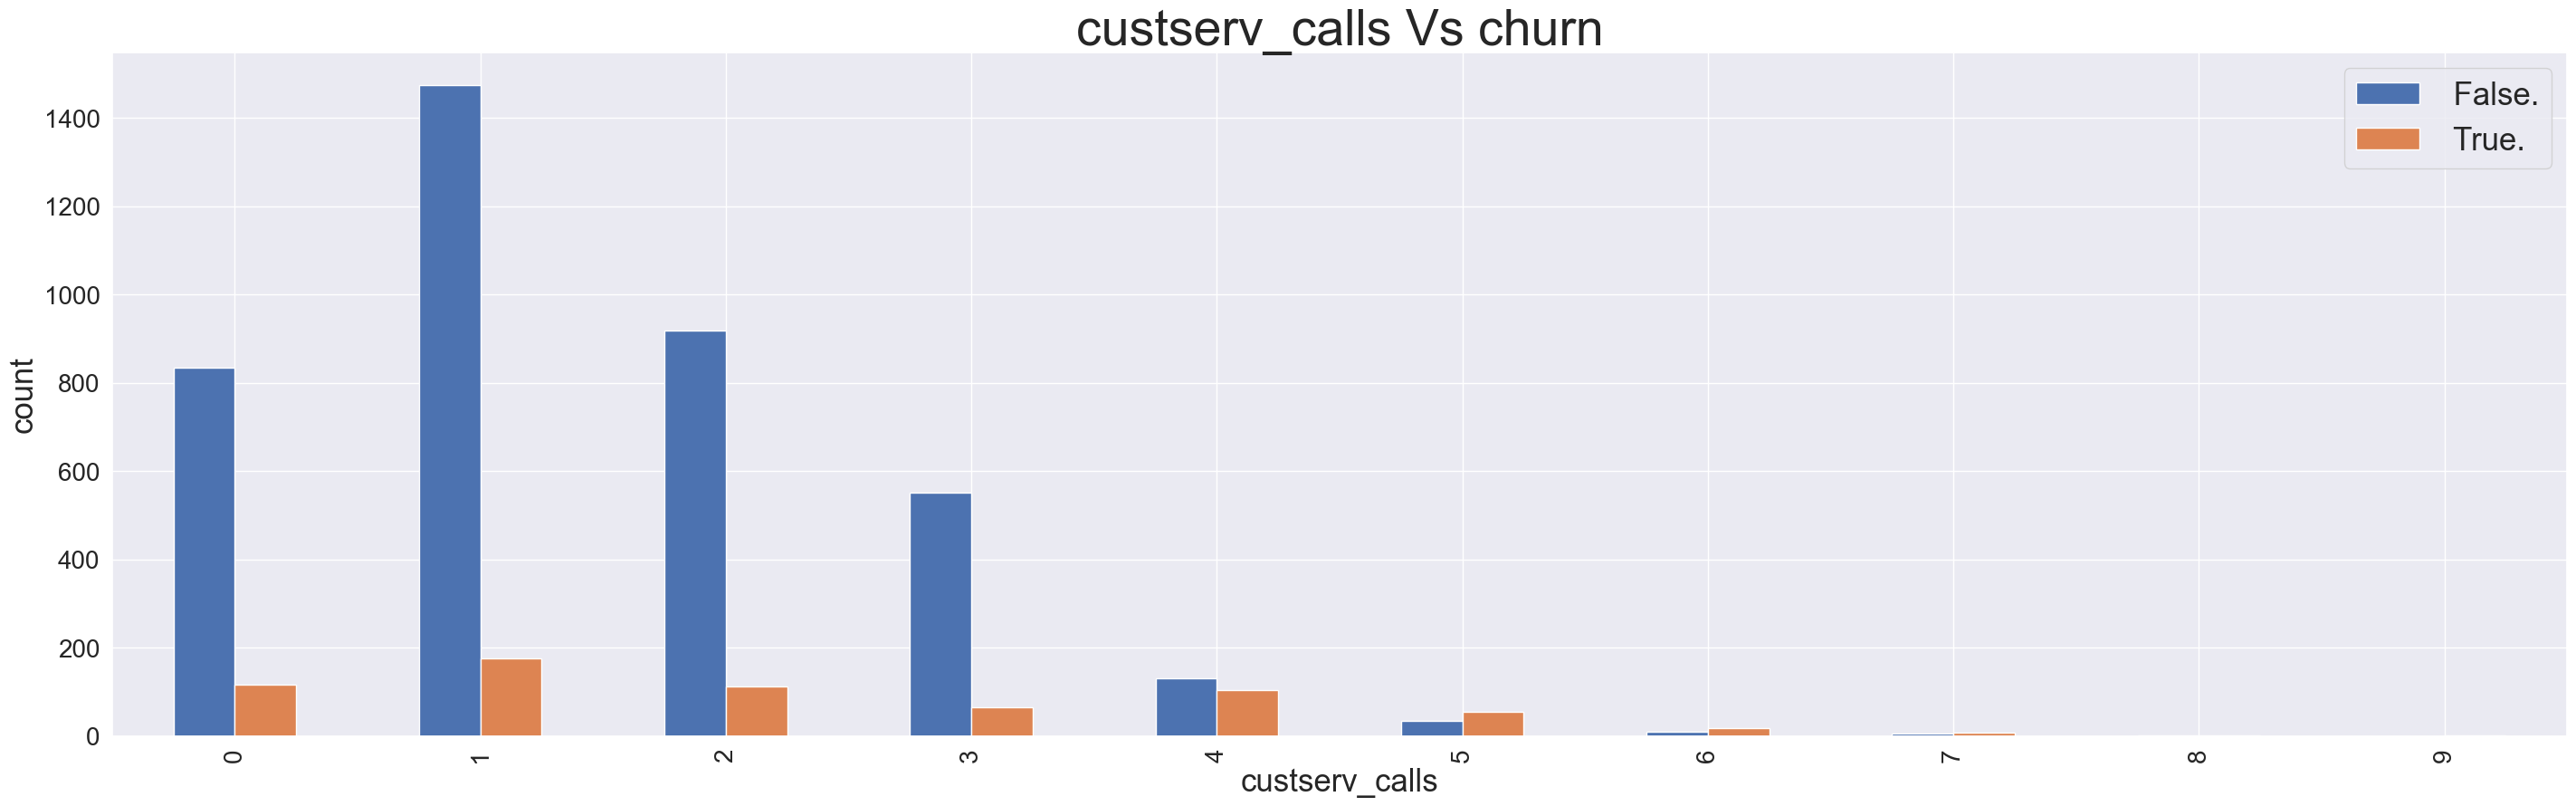

In [29]:
#Number of Customer_Service Call Wise Churning of customer
diff_bar('custserv_calls','churn')

In [30]:
# When the number of customer calls increases gradually the chances of churn value to be true also increases.Churn value is more than 
#100% when this count lies between 5-7.

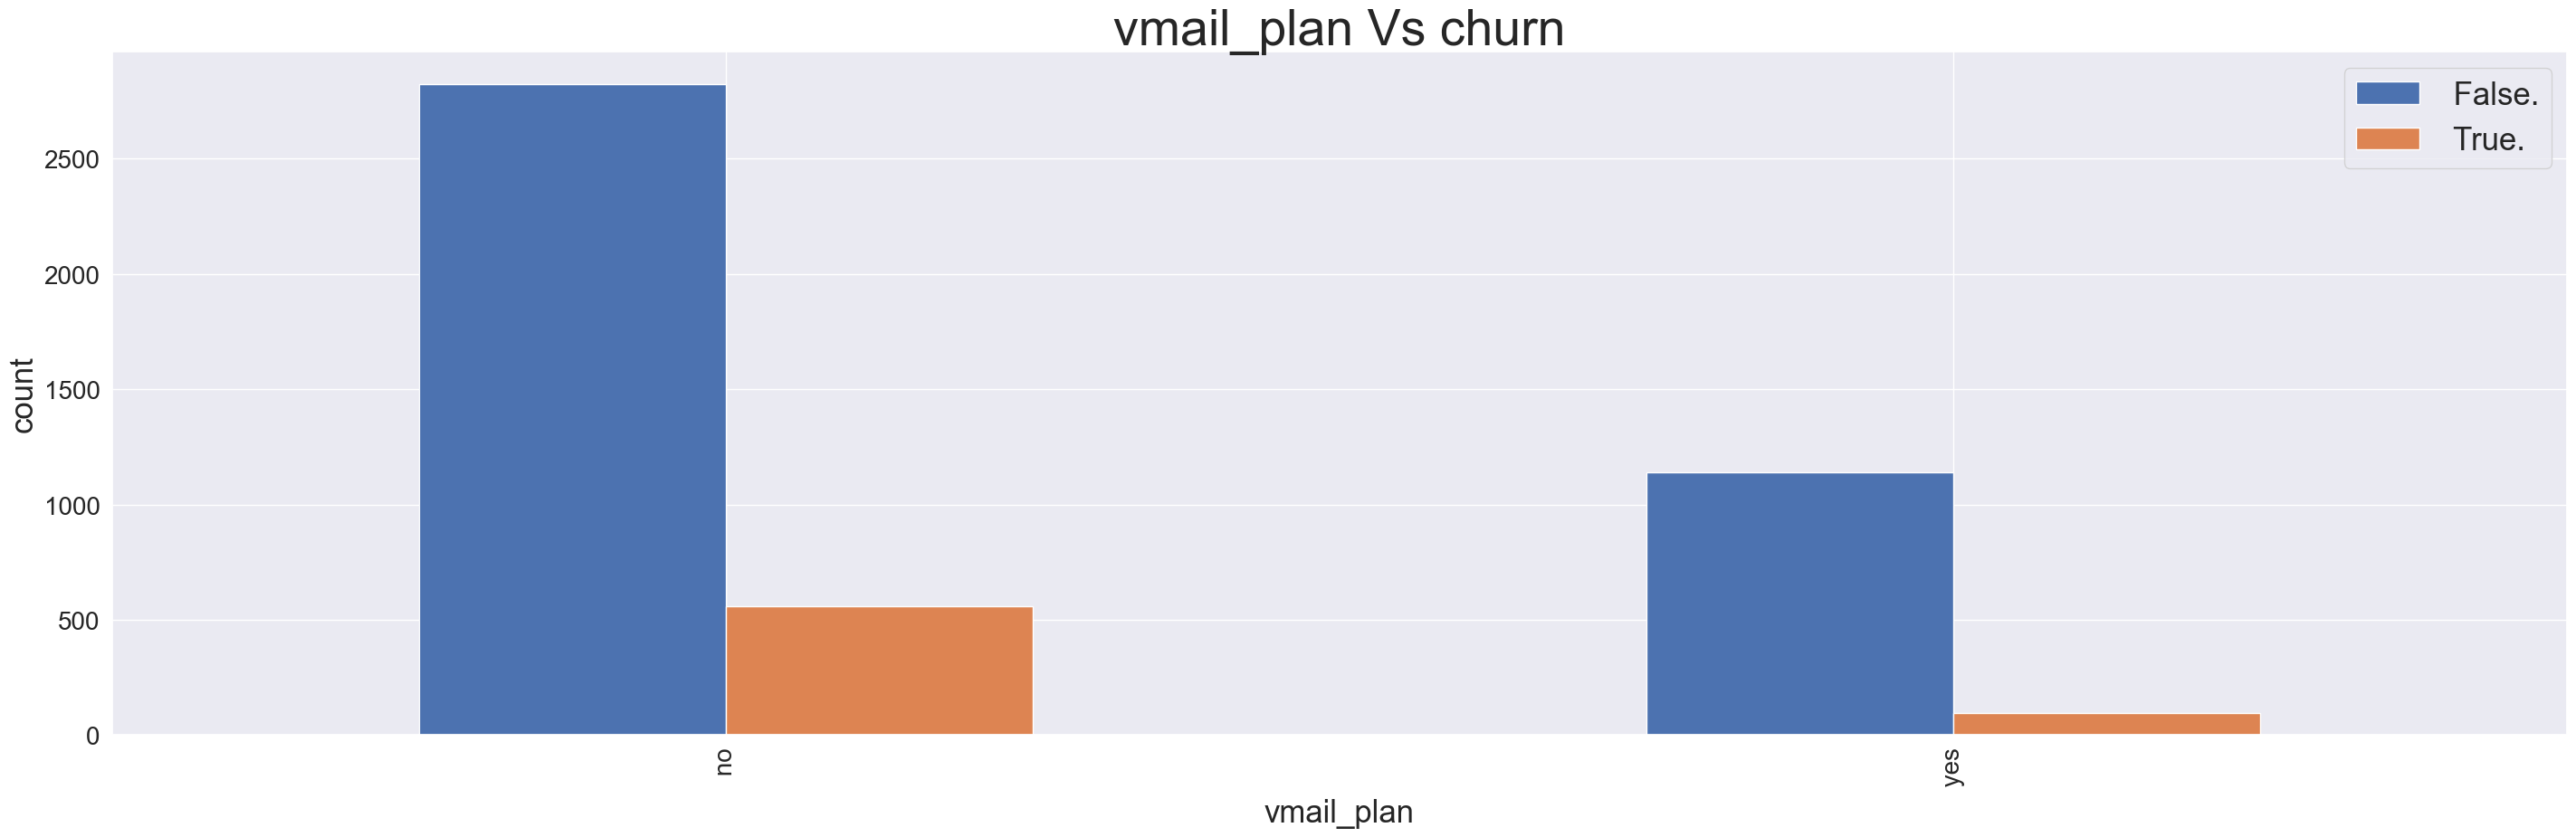

In [31]:
#No. of Customer Churning and had a Voice mail plan
diff_bar('vmail_plan','churn')

In [32]:
#when the customer opted for voice mail, 100 out of 1300 shows the churn value to be true.
#when the customer did not opt for voice mail, 500 out of 3000 shows the churn value to be true.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   object 
 1   acct_length     4617 non-null   int32  
 2   area_code       4617 non-null   int32  
 3   phone           4617 non-null   object 
 4   intl_plan       4617 non-null   object 
 5   vmail_plan      4617 non-null   object 
 6   vmail_message   4617 non-null   int32  
 7   day_mins        4617 non-null   float64
 8   day_calls       4617 non-null   int32  
 9   day_charge      4617 non-null   float64
 10  eve_mins        4617 non-null   float64
 11  eve_calls       4617 non-null   int32  
 12  eve_charge      4617 non-null   float64
 13  night_mins      4617 non-null   float64
 14  night_calls     4617 non-null   int32  
 15  night_charge    4617 non-null   float64
 16  intl_mins       4617 non-null   float64
 17  intl_calls      4617 non-null   i

<AxesSubplot:xlabel='area_code', ylabel='count'>

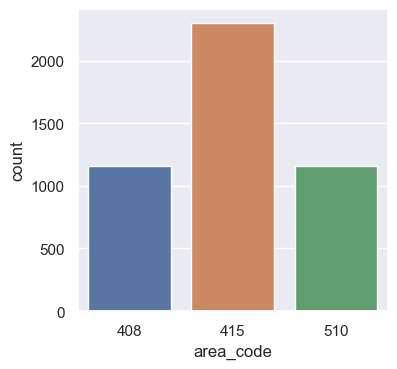

In [34]:
sn.set (rc= {'figure.figsize': (4,4)})
sn.countplot(x=df.area_code,data=df)

<AxesSubplot:xlabel='intl_plan', ylabel='count'>

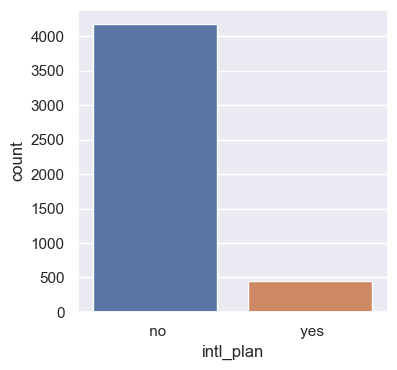

In [35]:
sn.set (rc= {'figure.figsize': (4,4)})
sn.countplot(x='intl_plan',data=df)

In [36]:
df.intl_plan.value_counts()

 no     4171
 yes     446
Name: intl_plan, dtype: int64

In [37]:
df.shape

(4617, 21)

<AxesSubplot:xlabel='vmail_plan', ylabel='count'>

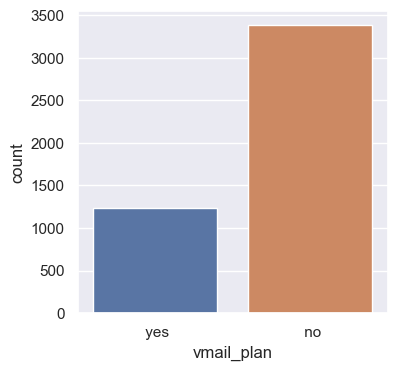

In [38]:
sn.countplot(x='vmail_plan',data=df)

In [39]:
df.vmail_plan.value_counts()   

 no     3381
 yes    1236
Name: vmail_plan, dtype: int64

<AxesSubplot:xlabel='vmail_message', ylabel='count'>

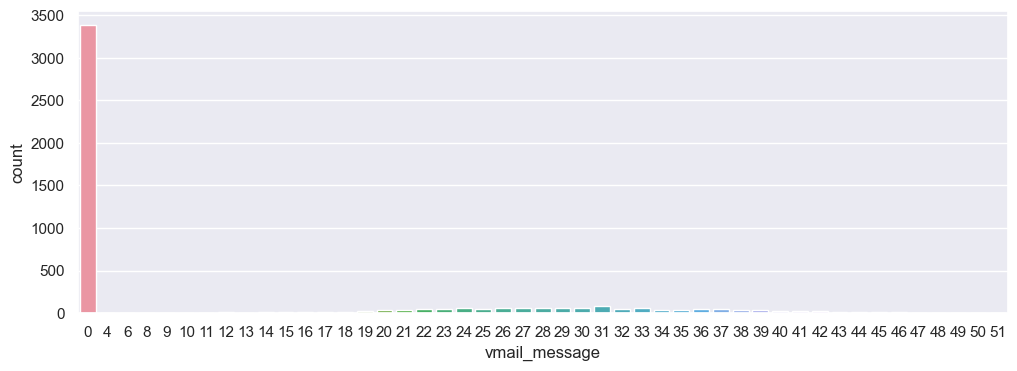

In [40]:
sn.set (rc= {'figure.figsize': (12,4)})
sn.countplot(x=df.vmail_message,data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

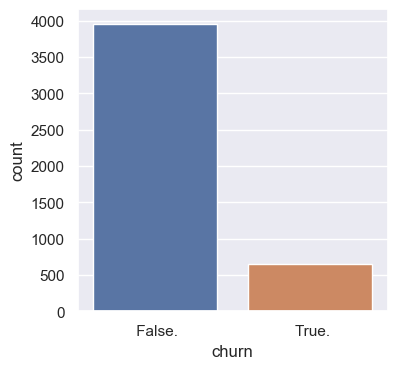

In [41]:
sn.set (rc= {'figure.figsize': (4,4)})
sn.countplot(x='churn',data=df)

In [42]:
df.churn.value_counts()

 False.    3961
 True.      656
Name: churn, dtype: int64

In [43]:
# Plot the distribution of the numerical variables

In [44]:
df.columns

Index(['state', 'acct_length', 'area_code', 'phone', 'intl_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn'],
      dtype='object')

In [45]:
len(non_catg_cols)

16

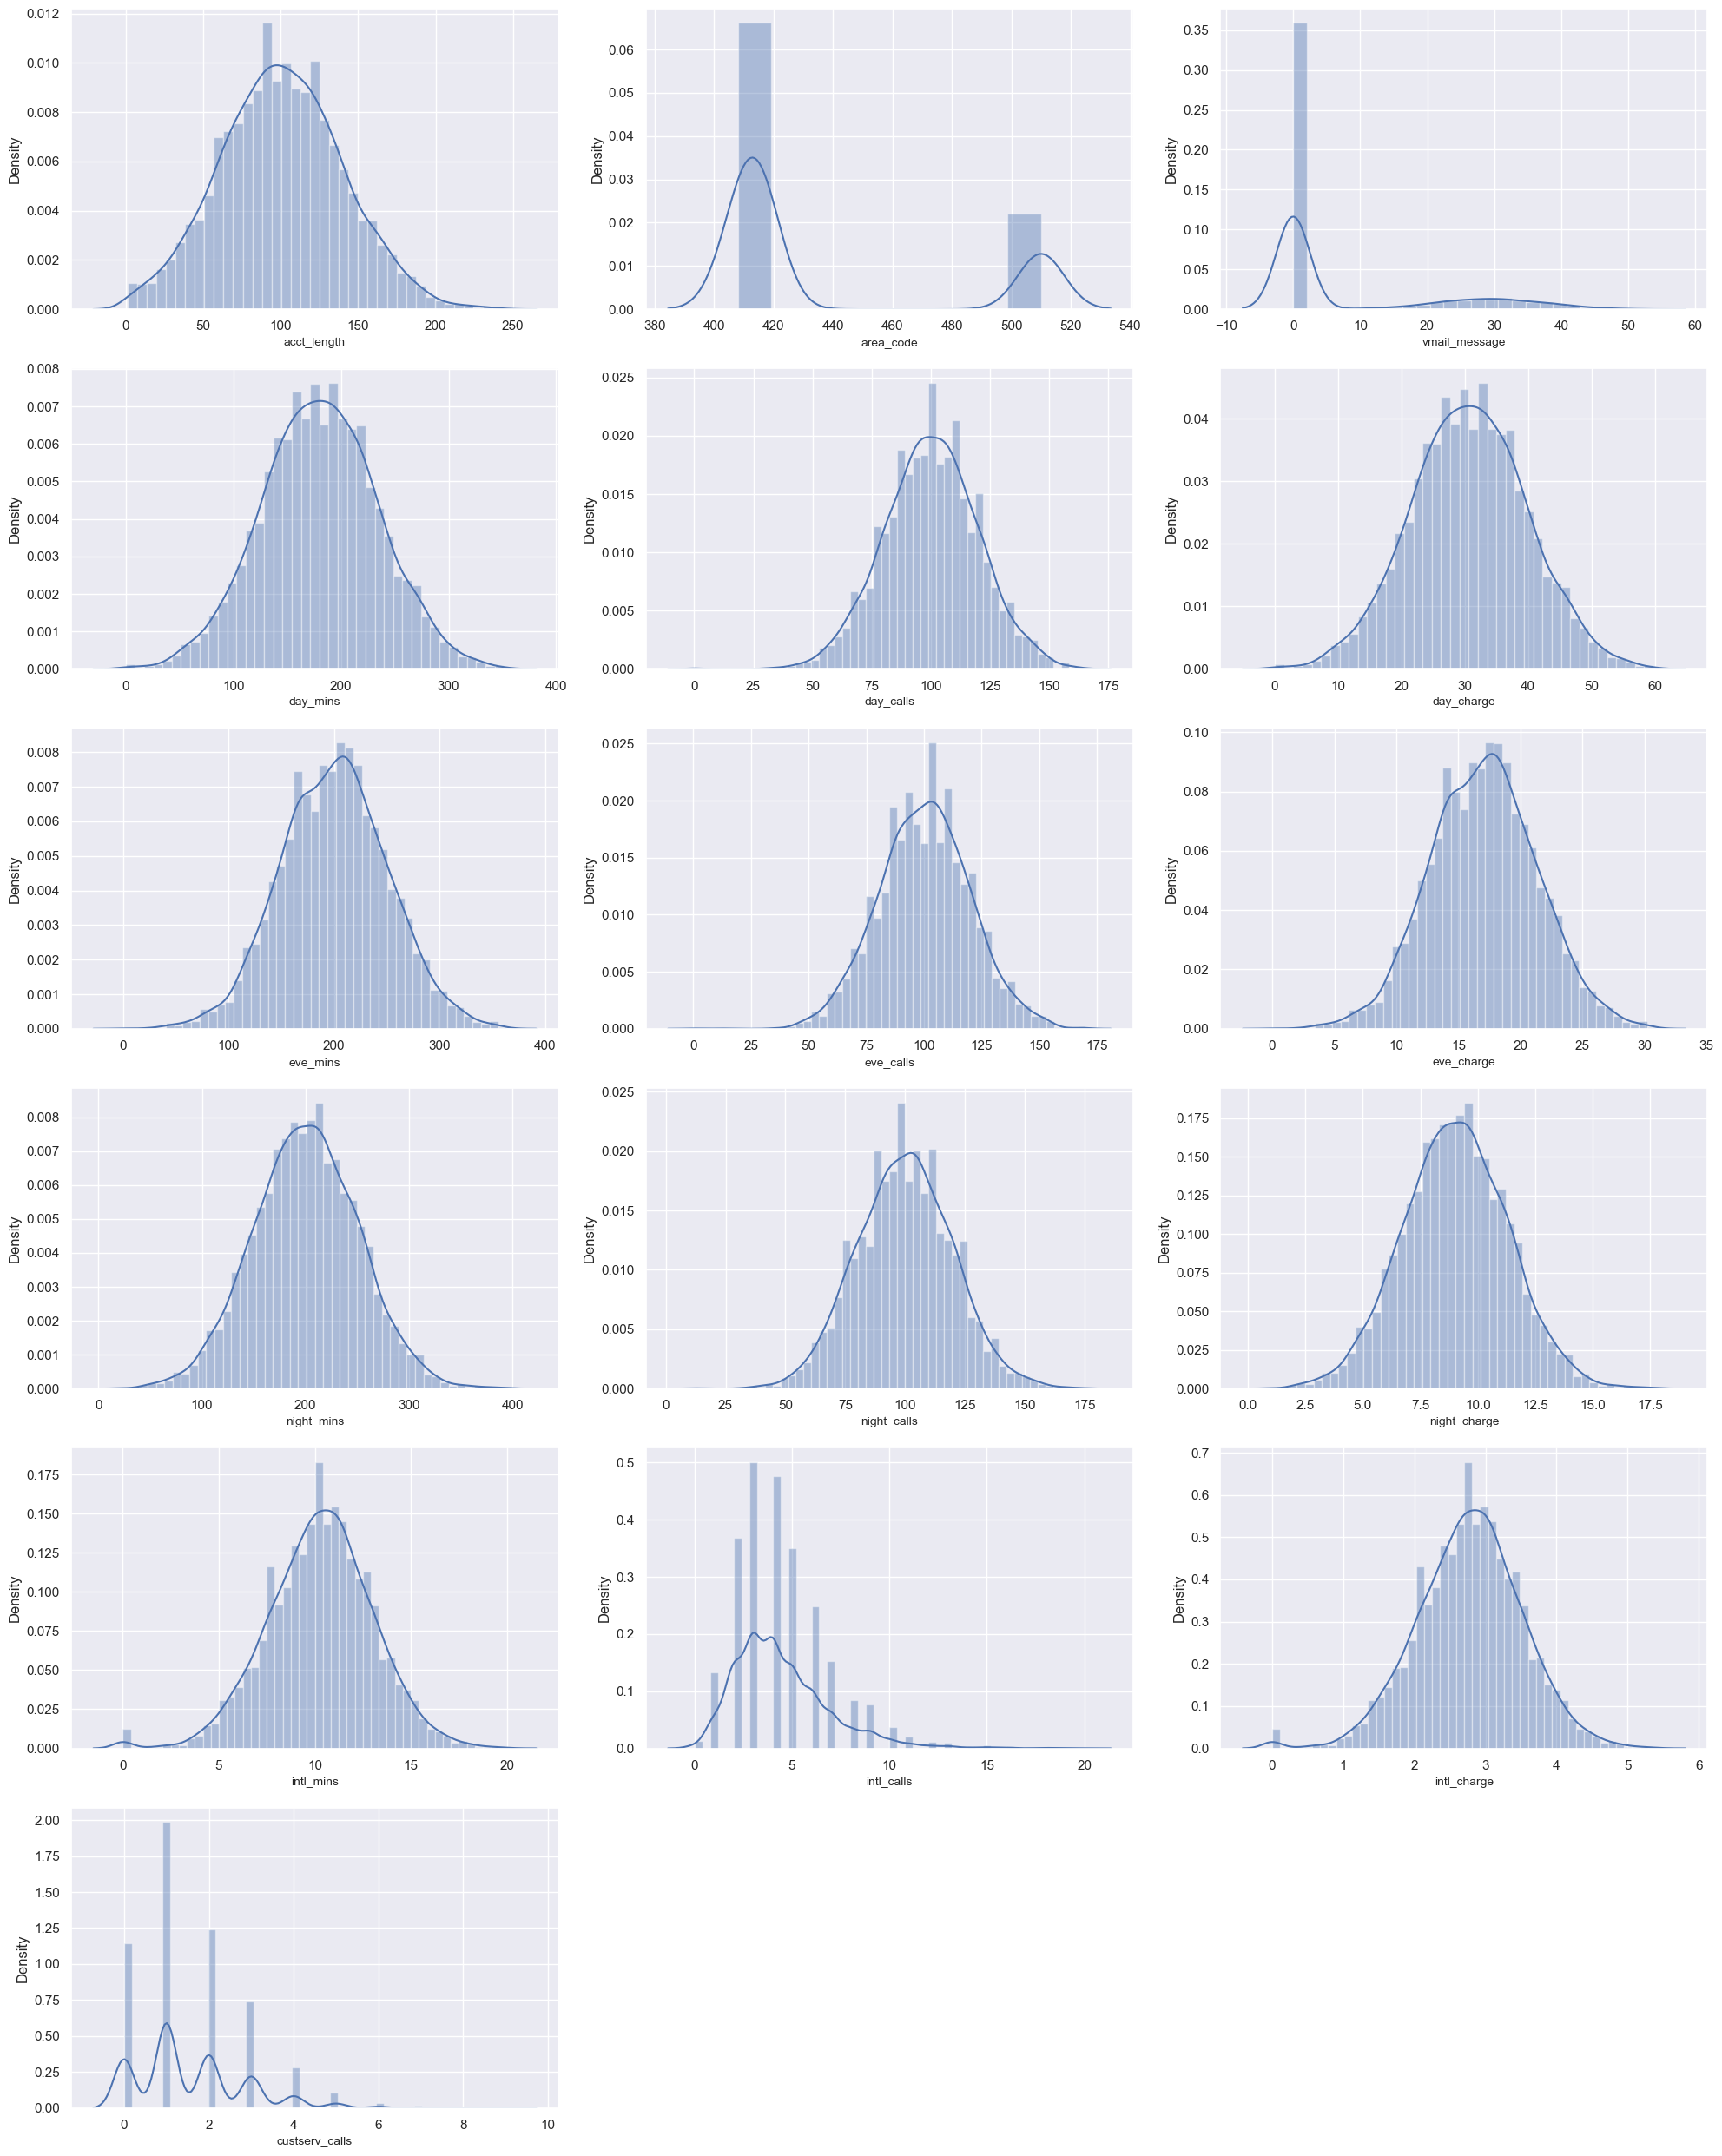

In [46]:
plt.figure(figsize=(20,25), facecolor='white')
pno = 1
for col in non_catg_cols:
    if pno<=len(non_catg_cols):
        #print(pno, i)
        ax = plt.subplot(6,3,pno)
        sn.distplot(df[col]) #.dropna(axis=0)
        plt.xlabel(col,fontsize=10)
    pno += 1
plt.tight_layout()


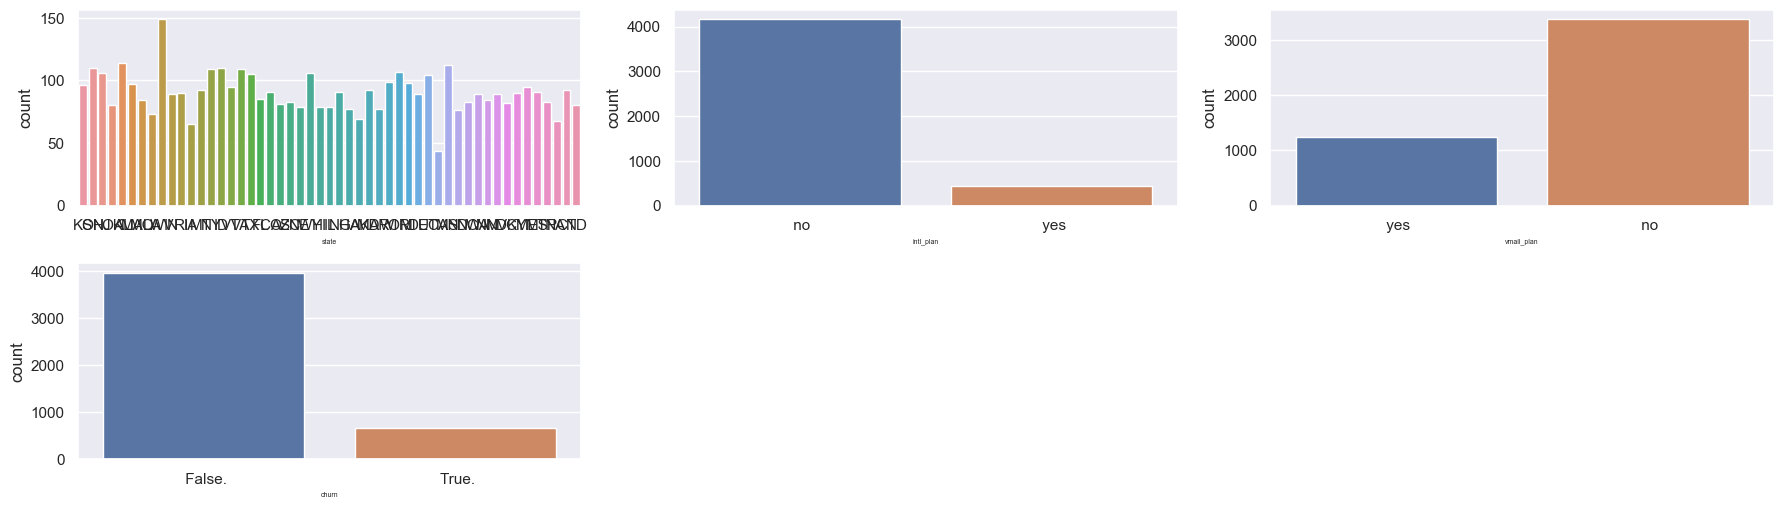

In [47]:
plt.figure(figsize=(18,15), facecolor='white')
pno = 1
for col in catg_cols:
    if pno<=len(catg_cols)-1:
        ax = plt.subplot(6,3,pno)
        sn.countplot(x=df[col],data=df)
        plt.xlabel(col,fontsize=5)
    pno += 1
plt.tight_layout()

<AxesSubplot:xlabel='acct_length', ylabel='Density'>

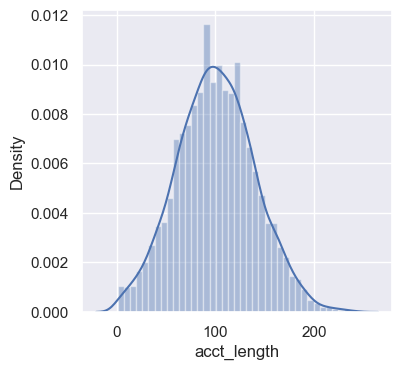

In [48]:
sn.distplot(df.acct_length)

<AxesSubplot:xlabel='acct_length', ylabel='Count'>

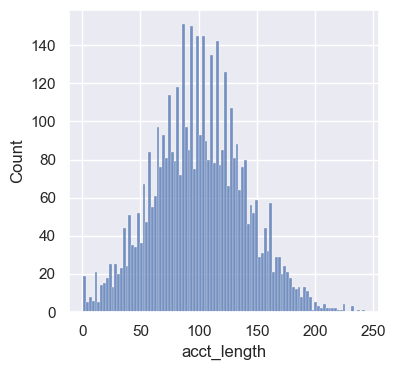

In [49]:
sn.histplot(df.acct_length.astype(int), bins=100)

<AxesSubplot:xlabel='area_code', ylabel='count'>

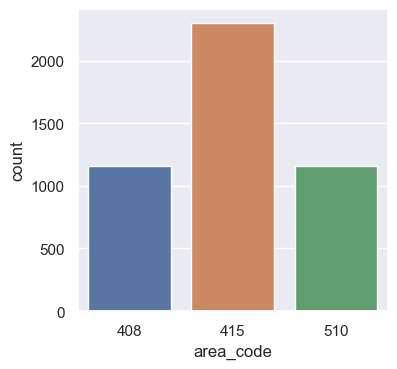

In [50]:
sn.countplot(x=df.area_code,data=df)

In [51]:
df.acct_length.value_counts()

90     63
87     56
93     54
105    54
101    53
       ..
215     1
216     1
208     1
200     1
243     1
Name: acct_length, Length: 218, dtype: int64

In [52]:
df.vmail_message.unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6])

In [53]:
df.area_code.unique()

array([415, 408, 510])

In [54]:
df.area_code.value_counts()

415    2299
408    1161
510    1157
Name: area_code, dtype: int64

In [55]:
(2299*100)/(2299+1161+1157)

49.794238683127574

In [56]:
df.area_code.value_counts() * 100 /df.area_code.value_counts().sum()

415    49.794239
408    25.146199
510    25.059562
Name: area_code, dtype: float64

In [57]:
df.shape

(4617, 21)

In [58]:
df.vmail_message.value_counts().mean()

98.23404255319149

In [59]:
df.vmail_message.value_counts().median()

21.0

In [60]:
df.vmail_message.value_counts().mode()

0    2
dtype: int64

In [61]:
df.vmail_plan.unique()

array([' yes', ' no'], dtype=object)

In [62]:
df.vmail_plan.value_counts()

 no     3381
 yes    1236
Name: vmail_plan, dtype: int64

In [63]:
df.vmail_message.unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9,  6])

In [64]:
df['vmail_message'].loc[(df.vmail_plan ==' yes') & (df.vmail_message> 0)].max()

51

In [65]:
df.head()

state  acct_length  area_code      phone intl_plan vmail_plan  \
0    KS          128        415   382-4657        no        yes   
1    OH          107        415   371-7191        no        yes   
2    NJ          137        415   358-1921        no         no   
3    OH           84        408   375-9999       yes         no   
4    OK           75        415   330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  eve_charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   custserv_calls    churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.  

[5 rows x 21 columns]

In [66]:
df.custserv_calls.unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [67]:
df.loc[df.custserv_calls == '1']

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [68]:
df.custserv_calls.astype(int).sum()

7235

#### Bivariate Analysis

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   object 
 1   acct_length     4617 non-null   int32  
 2   area_code       4617 non-null   int32  
 3   phone           4617 non-null   object 
 4   intl_plan       4617 non-null   object 
 5   vmail_plan      4617 non-null   object 
 6   vmail_message   4617 non-null   int32  
 7   day_mins        4617 non-null   float64
 8   day_calls       4617 non-null   int32  
 9   day_charge      4617 non-null   float64
 10  eve_mins        4617 non-null   float64
 11  eve_calls       4617 non-null   int32  
 12  eve_charge      4617 non-null   float64
 13  night_mins      4617 non-null   float64
 14  night_calls     4617 non-null   int32  
 15  night_charge    4617 non-null   float64
 16  intl_mins       4617 non-null   float64
 17  intl_calls      4617 non-null   i

In [70]:
df.head()

state  acct_length  area_code      phone intl_plan vmail_plan  \
0    KS          128        415   382-4657        no        yes   
1    OH          107        415   371-7191        no        yes   
2    NJ          137        415   358-1921        no         no   
3    OH           84        408   375-9999       yes         no   
4    OK           75        415   330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  eve_charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   custserv_calls    churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.  

[5 rows x 21 columns]

In [71]:
df.state.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [72]:
# label encode the state as the state may be important variable in prediction
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.state = le.fit_transform(df.state)

In [73]:
df.head()

state  acct_length  area_code      phone intl_plan vmail_plan  \
0     16          128        415   382-4657        no        yes   
1     35          107        415   371-7191        no        yes   
2     31          137        415   358-1921        no         no   
3     35           84        408   375-9999       yes         no   
4     36           75        415   330-6626       yes         no   

   vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  eve_charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   custserv_calls    churn  
0               1   False.  
1               1   False.  
2               0   False.  
3               2   False.  
4               3   False.  

[5 rows x 21 columns]

In [74]:
df.intl_plan.unique()

array([' no', ' yes'], dtype=object)

In [75]:
df.intl_plan = df.intl_plan.map({' no':0, ' yes':1})

In [76]:
df.vmail_plan.unique()

array([' yes', ' no'], dtype=object)

In [77]:
df.vmail_plan = df.vmail_plan.map({' no':0, ' yes':1})

In [78]:
df.custserv_calls.unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [79]:
df.churn.unique()

array([' False.', ' True.'], dtype=object)

In [80]:
df.churn = df.churn.map({' False.':0, ' True.':1})

In [81]:
df.isnull().sum()

state             0
acct_length       0
area_code         0
phone             0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

In [82]:
df.shape

(4617, 21)

In [83]:
df.loc[(df['state']=='AZ') & (df['acct_length']==63)]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [84]:
df.state.unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

In [85]:
tcols = catg_cols[0:-1] + non_catg_cols

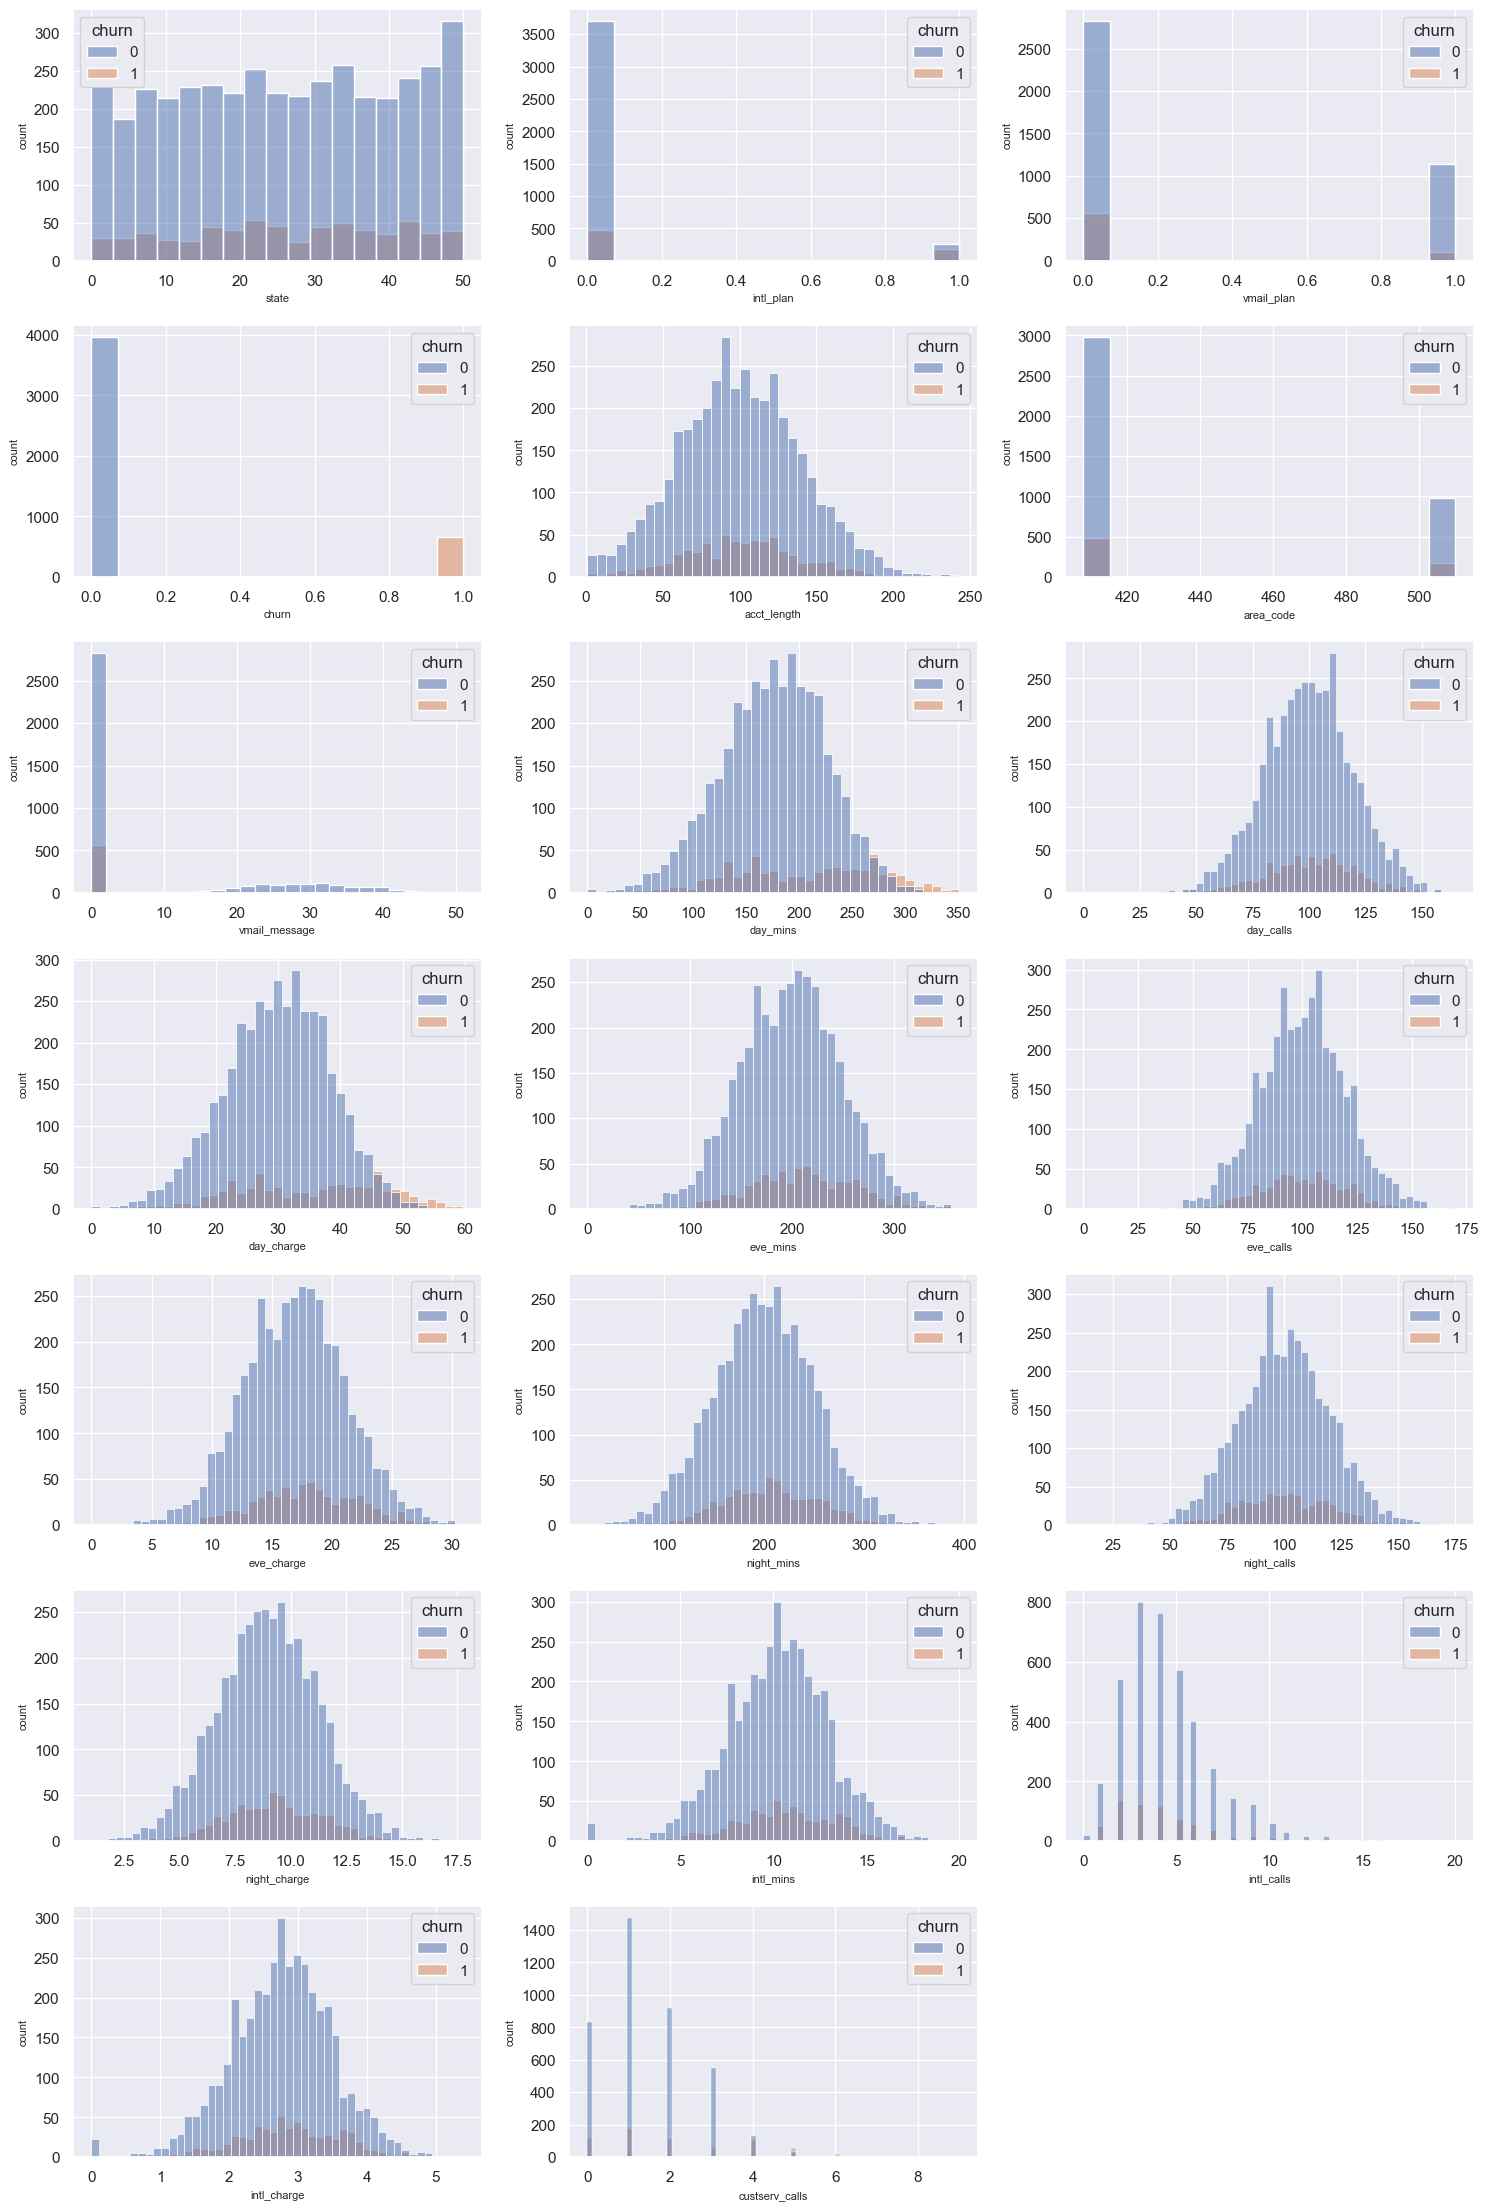

In [86]:
plt.figure(figsize=(15,25))
pnum = 1
for col in tcols:
    if pnum <= len(df.columns):
        ax=plt.subplot(8,3,pnum)
        sn.histplot(x=df[col], hue=df.churn, data=df)
        plt.xlabel(col,fontsize=8)
        plt.ylabel('count',fontsize=8)
    pnum+=1
plt.tight_layout()

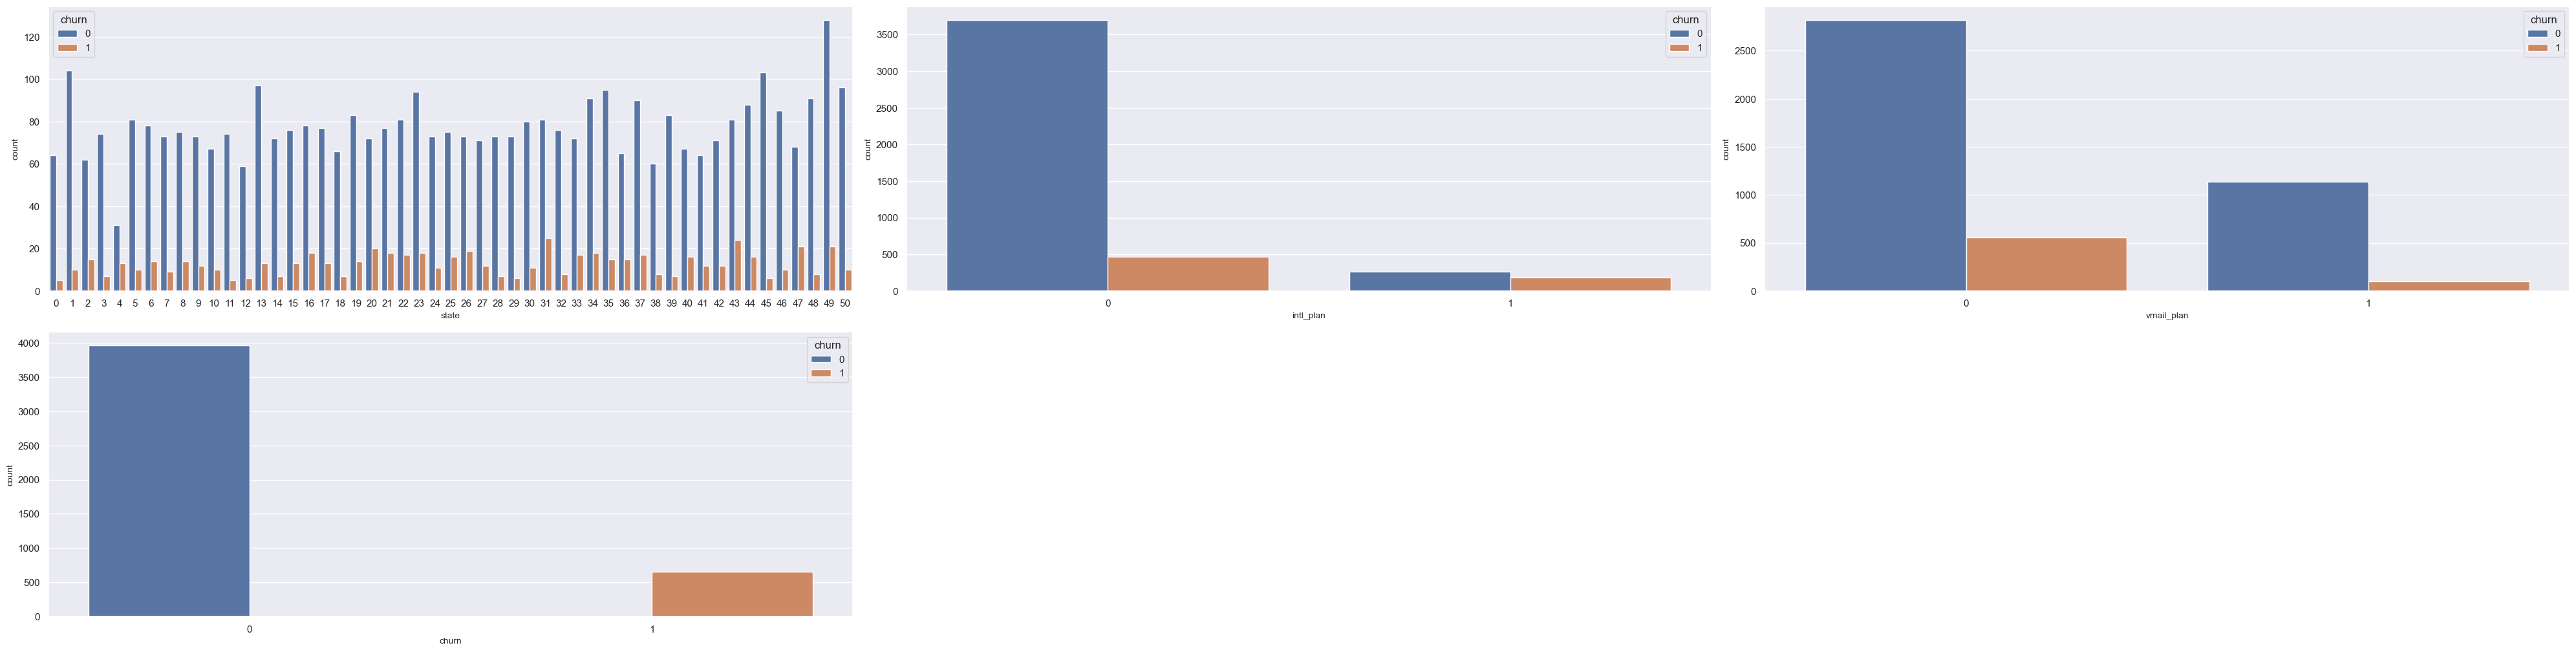

In [87]:
plt.figure(figsize=(40,40), facecolor='white') 
pnum = 1
for col in catg_cols[0:-1]:
    if pnum<= len(catg_cols[0:-1]):
        ax = plt.subplot(8,3,pnum)
        sn.countplot(x=df[col], data=df, hue='churn')
        plt.xlabel(col,fontsize=10)
        plt.ylabel('count',fontsize=10)
    pnum+=1
plt.tight_layout()

In [88]:
len(tcols)

20

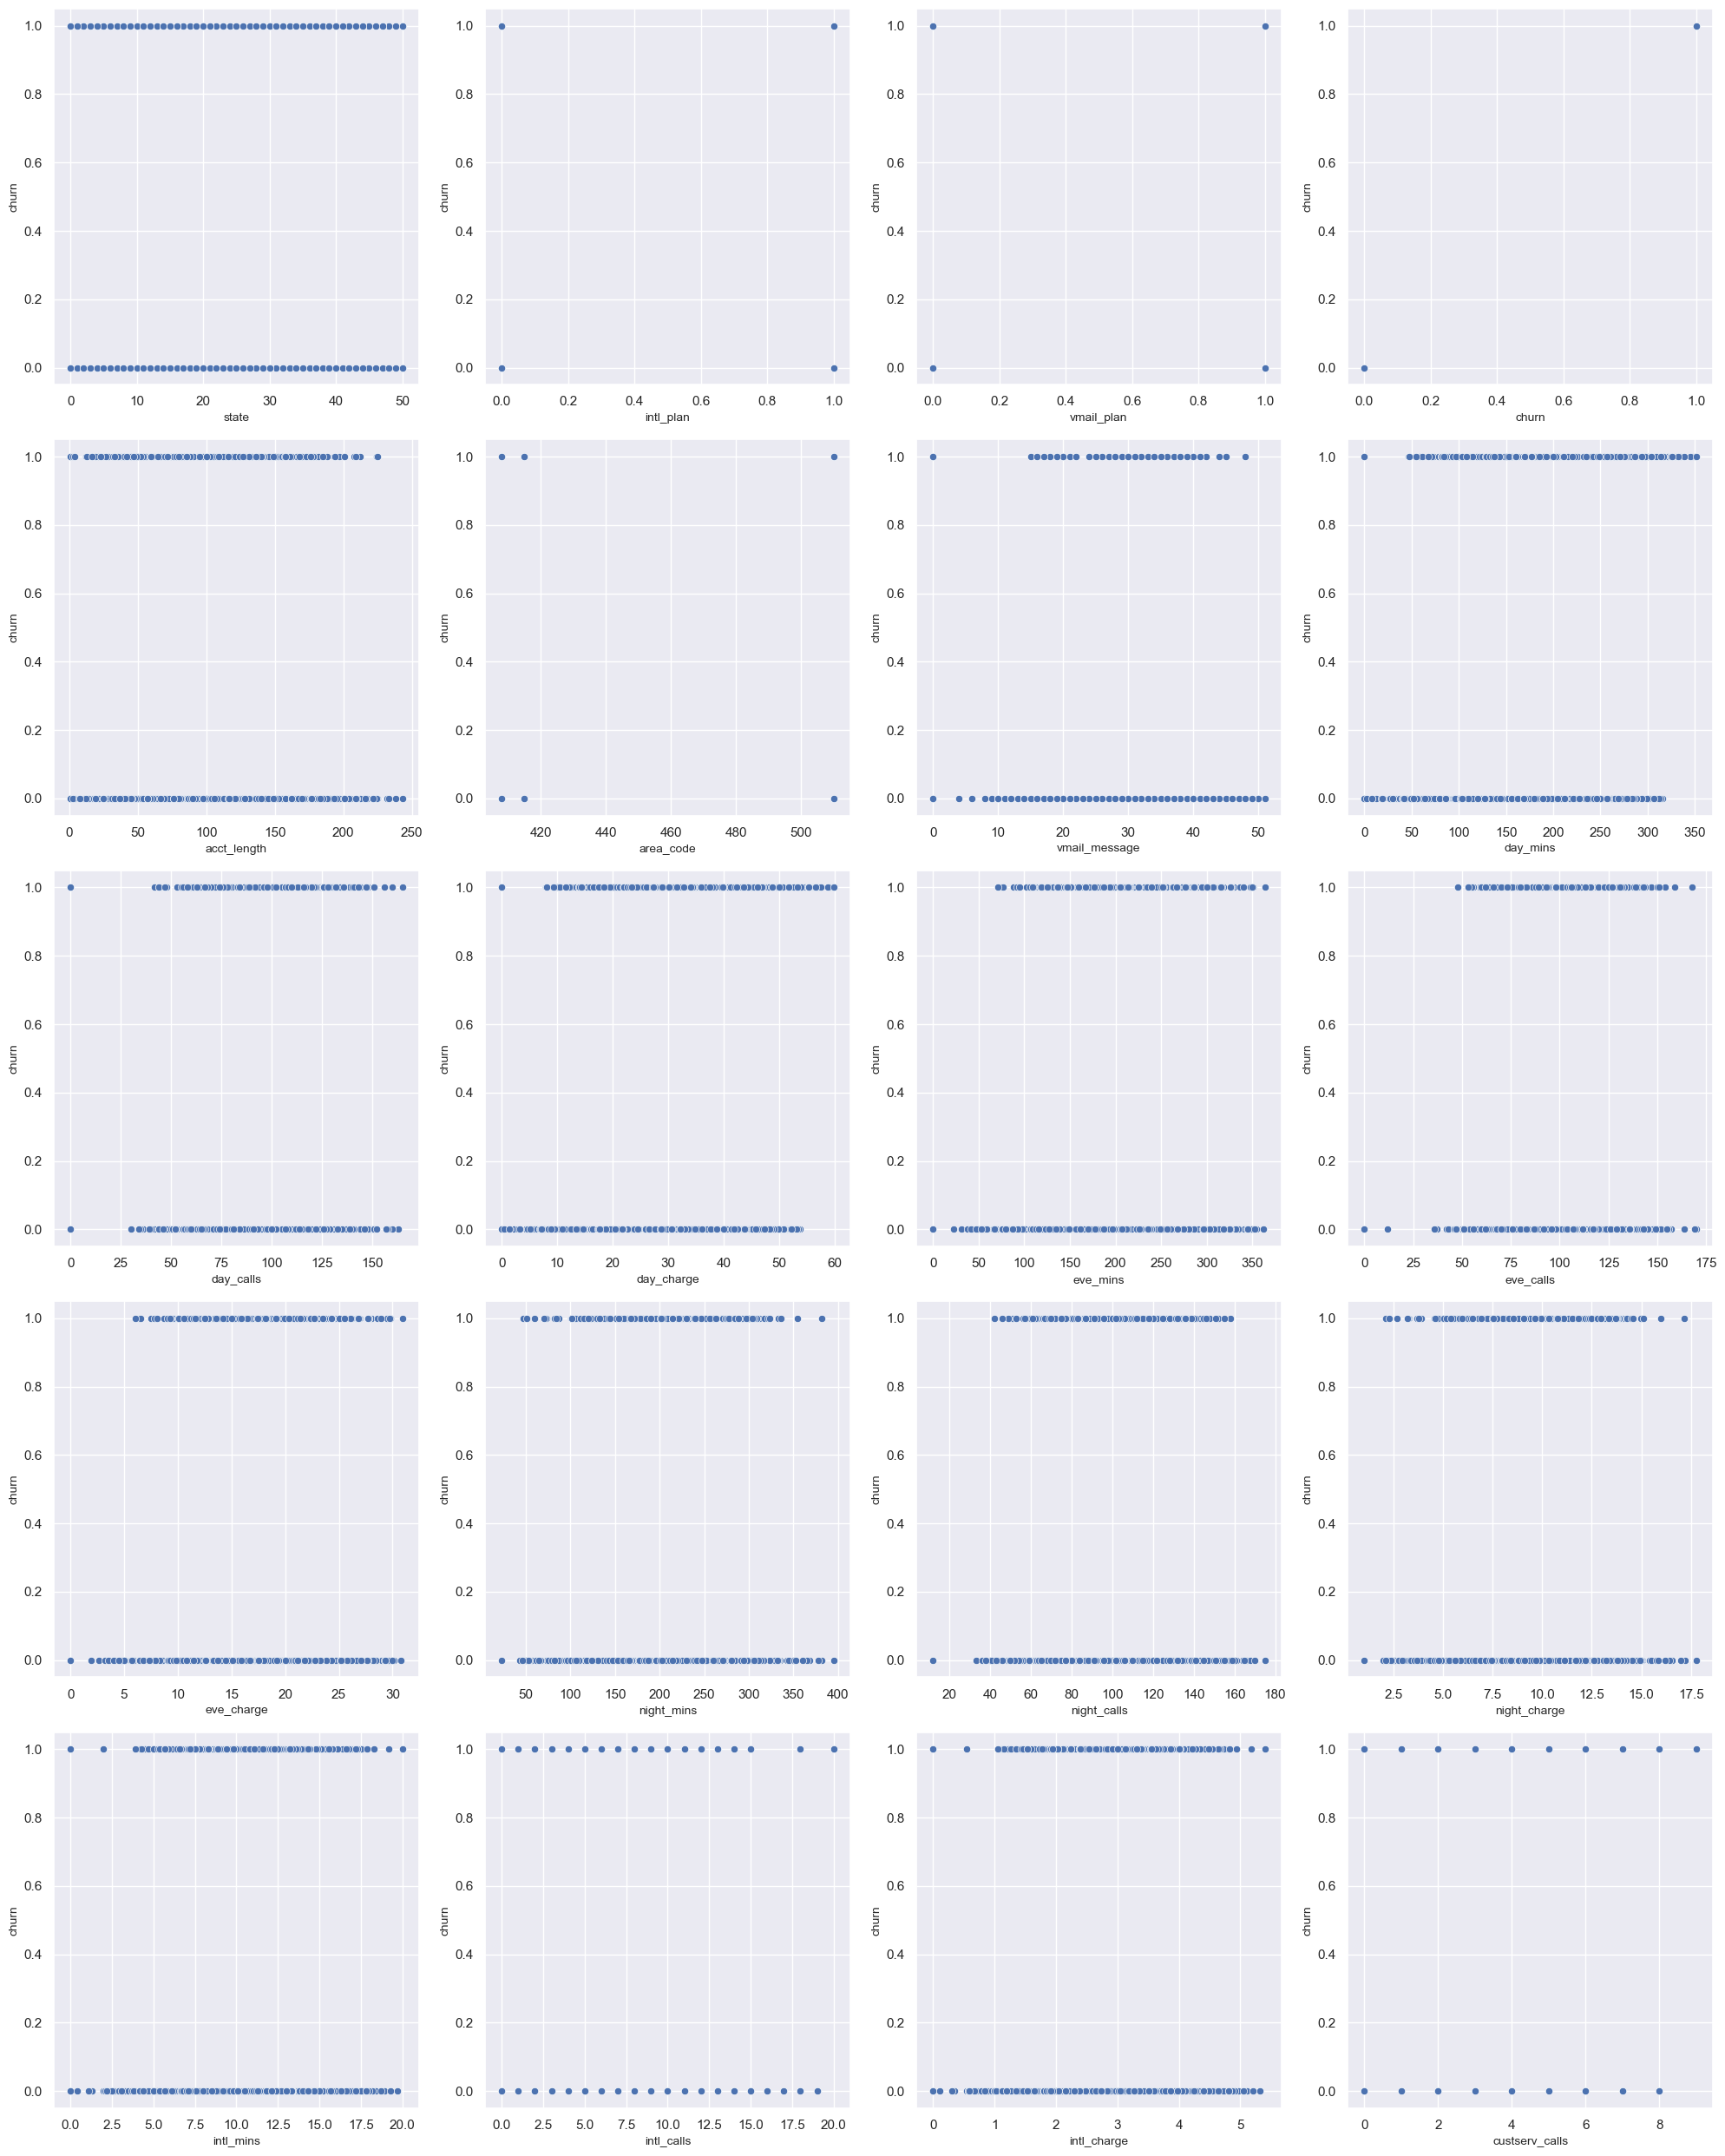

In [89]:
plt.figure(figsize=(20,25), facecolor='white')
pnum = 1
for col in tcols:
    if pnum <= len(tcols) :
        ax = plt.subplot(5,4,pnum)
        sn.scatterplot(x=df[col], y=df.churn)
        plt.xlabel(col,fontsize=10)
        plt.ylabel('churn',fontsize=10)
    pnum += 1
plt.tight_layout()

In [90]:
df.churn.value_counts()

0    3961
1     656
Name: churn, dtype: int64

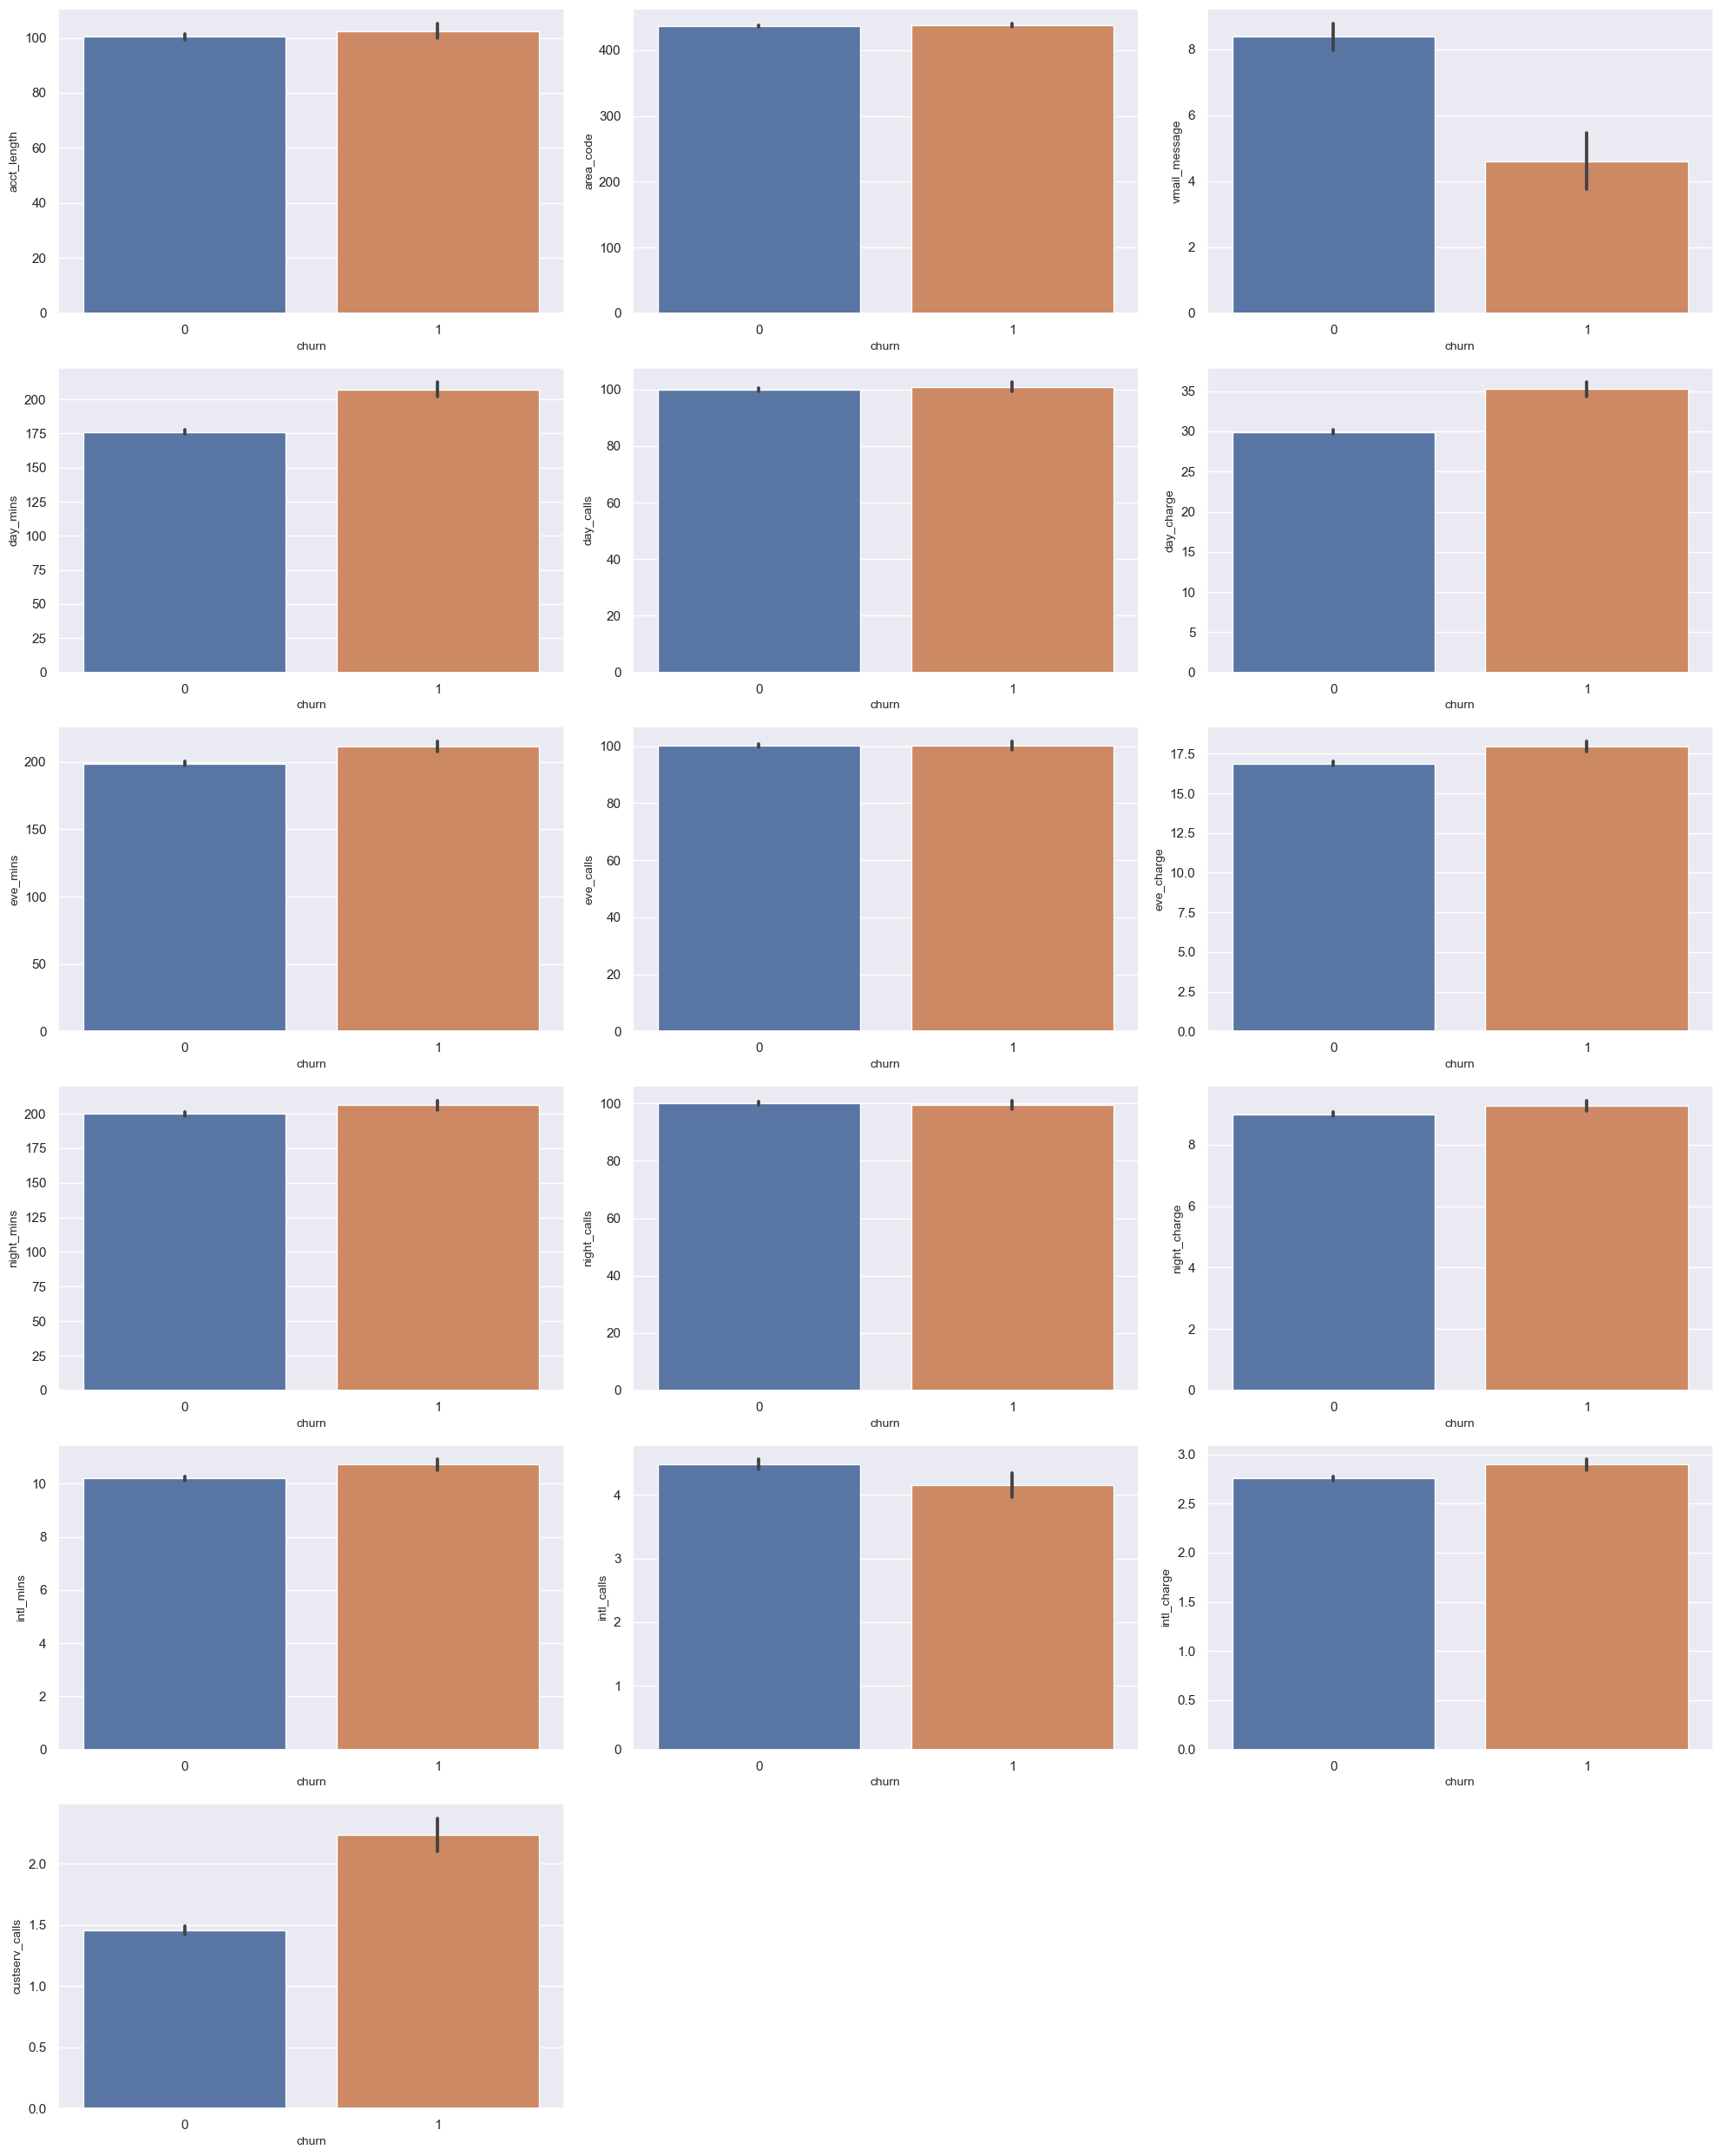

In [91]:
plt.figure(figsize=(20,25), facecolor='white')
pnum = 1
for col in non_catg_cols:
    if pnum <= len(non_catg_cols) :
        ax = plt.subplot(6,3,pnum)
        sn.barplot(x=df.churn,y=df[col] )    
        plt.xlabel('churn',fontsize=10)
        plt.ylabel(col,fontsize=10)
        pnum += 1       
plt.tight_layout()

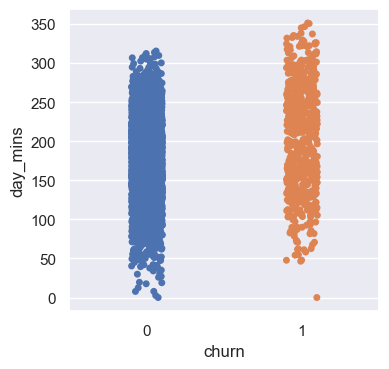

In [92]:
sn.stripplot(x=df.churn, y=df.day_mins, data=df)
plt.show()

#### Data Preprocessing

In [93]:
df.isnull().sum()

state             0
acct_length       0
area_code         0
phone             0
intl_plan         0
vmail_plan        0
vmail_message     0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
intl_mins         0
intl_calls        0
intl_charge       0
custserv_calls    0
churn             0
dtype: int64

In [94]:
data = df[['acct_length','vmail_message','day_mins','day_calls','day_charge','eve_mins','eve_calls','eve_charge','night_mins','night_calls','night_charge','intl_mins','intl_calls','intl_charge','custserv_calls']]

In [95]:
data

acct_length  vmail_message  day_mins  day_calls  day_charge  eve_mins  \
0             128             25     265.1        110       45.07     197.4   
1             107             26     161.6        123       27.47     195.5   
2             137              0     243.4        114       41.38     121.2   
3              84              0     299.4         71       50.90      61.9   
4              75              0     166.7        113       28.34     148.3   
...           ...            ...       ...        ...         ...       ...   
4612           57             25     144.0         81       24.48     187.2   
4613          177             29     189.0         91       32.13     303.1   
4614           67             33     127.5        126       21.68     296.1   
4615           98             23     168.9         98       28.71     226.3   
4616          140              0     204.7        100       34.80     126.8   

      eve_calls  eve_charge  night_mins  night_calls  night_charge  intl_mins  \
0            99       16.78       244.7           91         11.01       10.0   
1           103       16.62       254.4          103         11.45       13.7   
2           110       10.30       162.6          104          7.32       12.2   
3            88        5.26       196.9           89          8.86        6.6   
4           122       12.61       186.9          121          8.41       10.1   
...         ...         ...         ...          ...           ...        ...   
4612        112       15.91       158.6          122          7.14        8.5   
4613         96       25.76       163.6          116          7.36       15.7   
4614        129       25.17       200.9           91          9.04       13.0   
4615        117       19.24       165.5           96          7.45       14.3   
4616        107       10.78       202.8          115          9.13       12.1   

      intl_calls  intl_charge  custserv_calls  
0              3         2.70               1  
1              3         3.70               1  
2              5         3.29               0  
3              7         1.78               2  
4              3         2.73               3  
...          ...          ...             ...  
4612           6         2.30               3  
4613           1         4.24               3  
4614           3         3.51               1  
4615           3         3.86               0  
4616           4         3.27               2  

[4617 rows x 15 columns]

### Using distribution plots

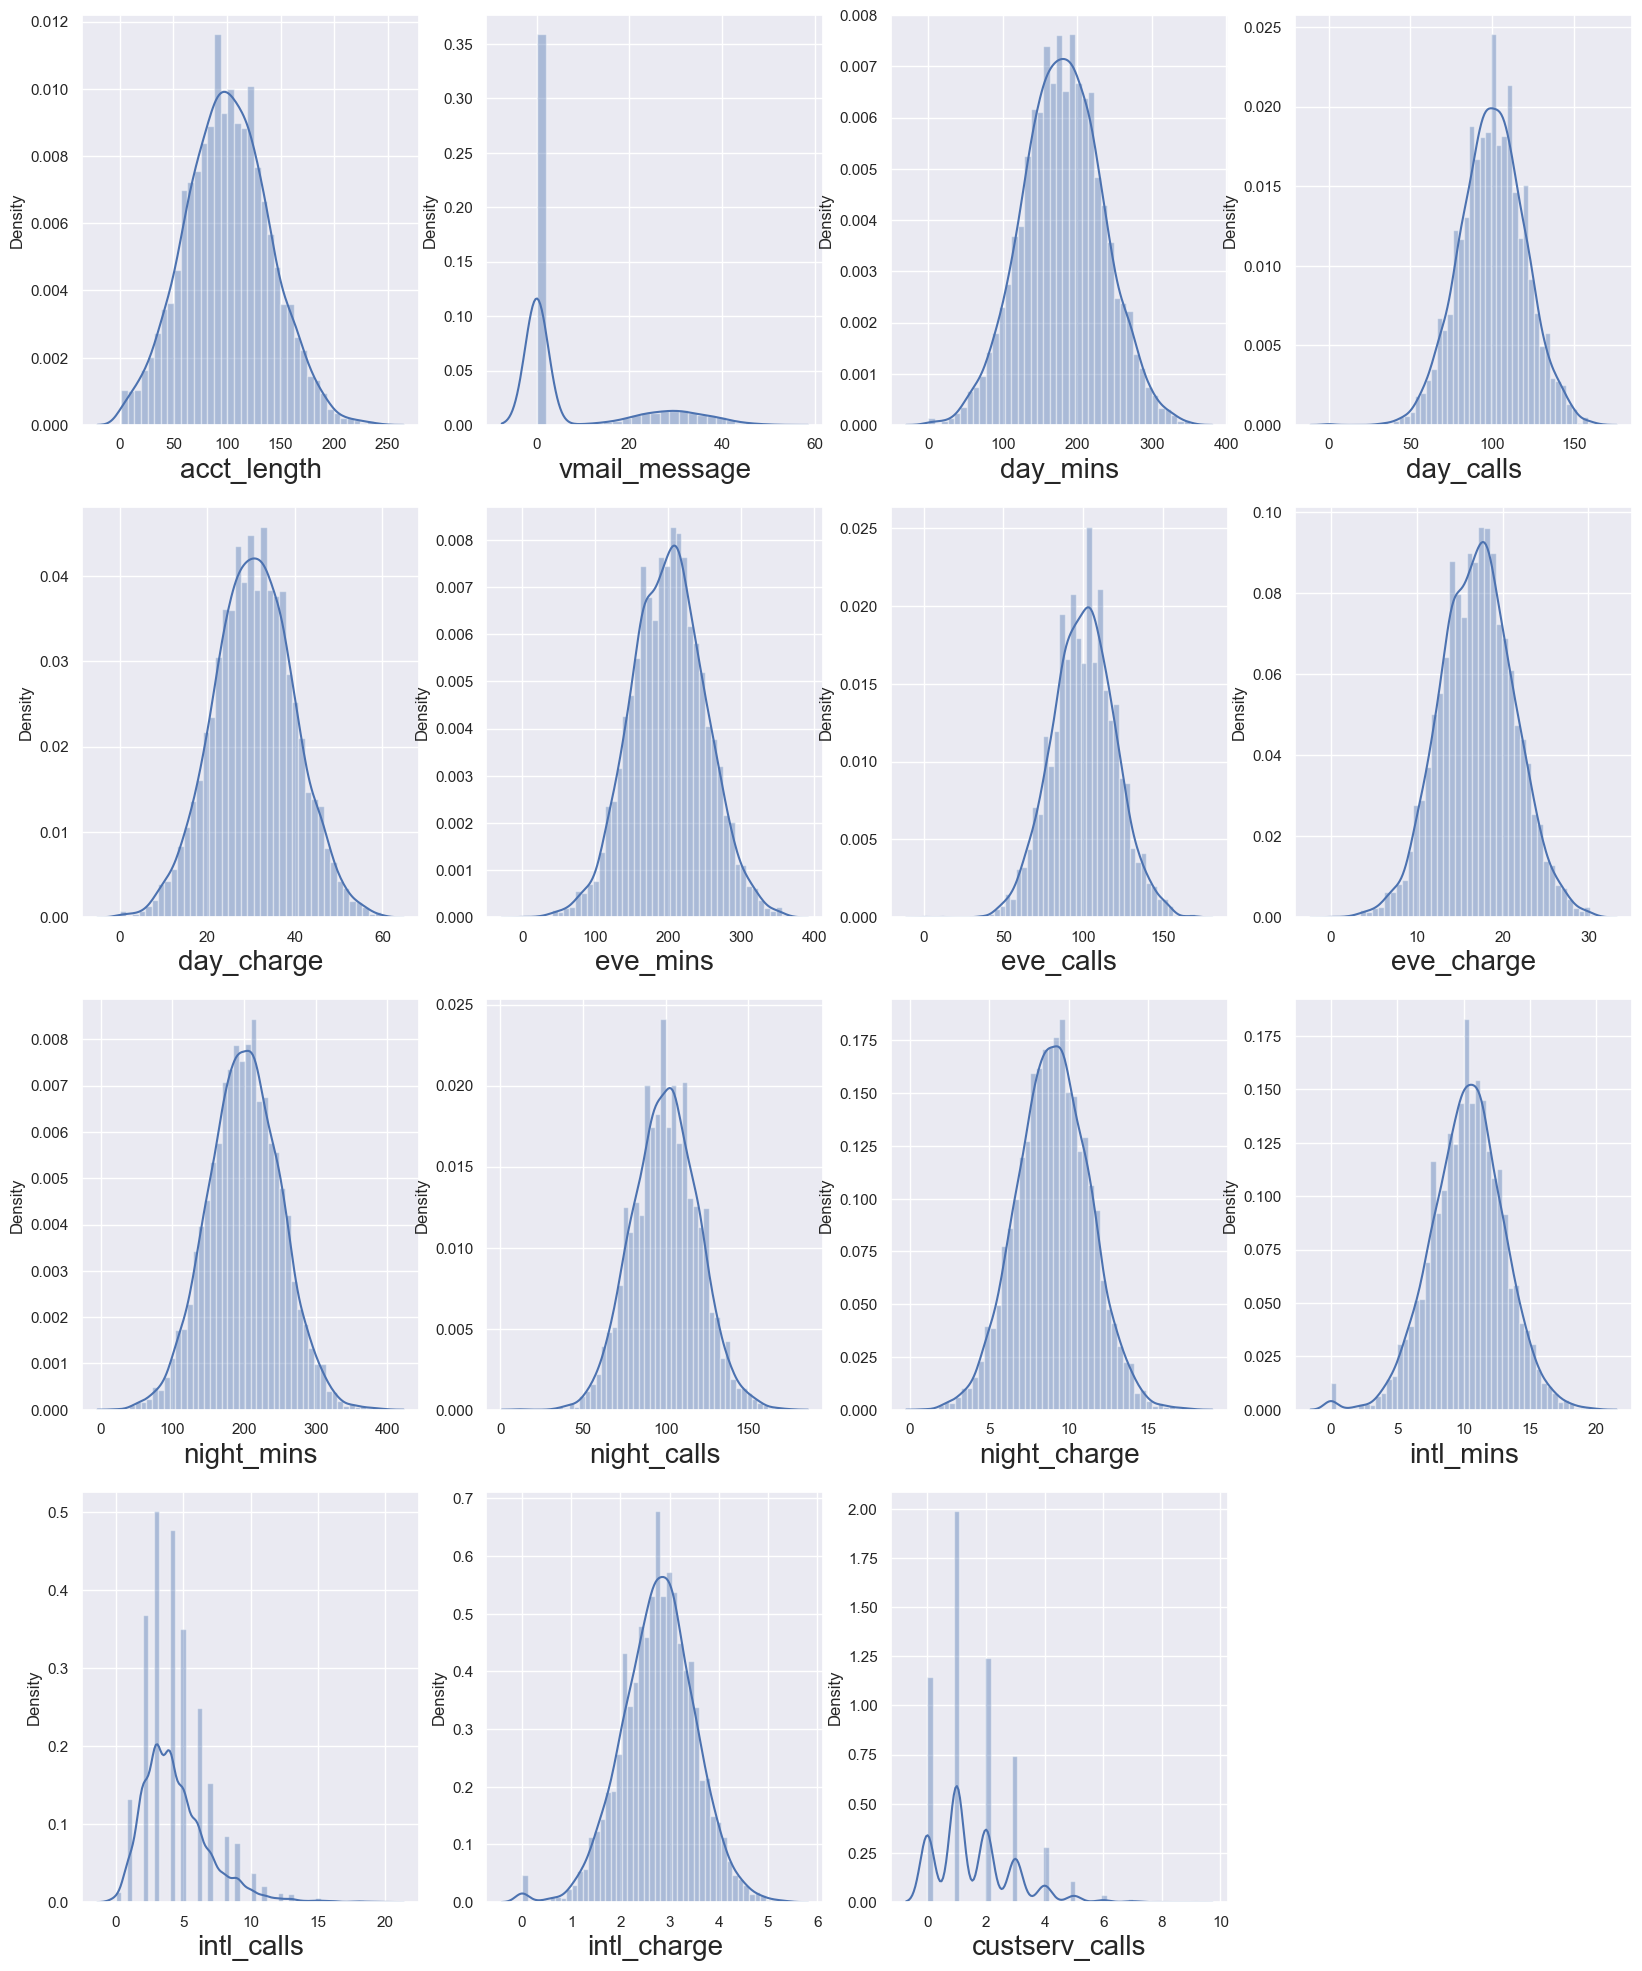

In [96]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white') #ashish
plotnumber = 1

for column in data:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

## Visualizing Outliers Using Boxplots

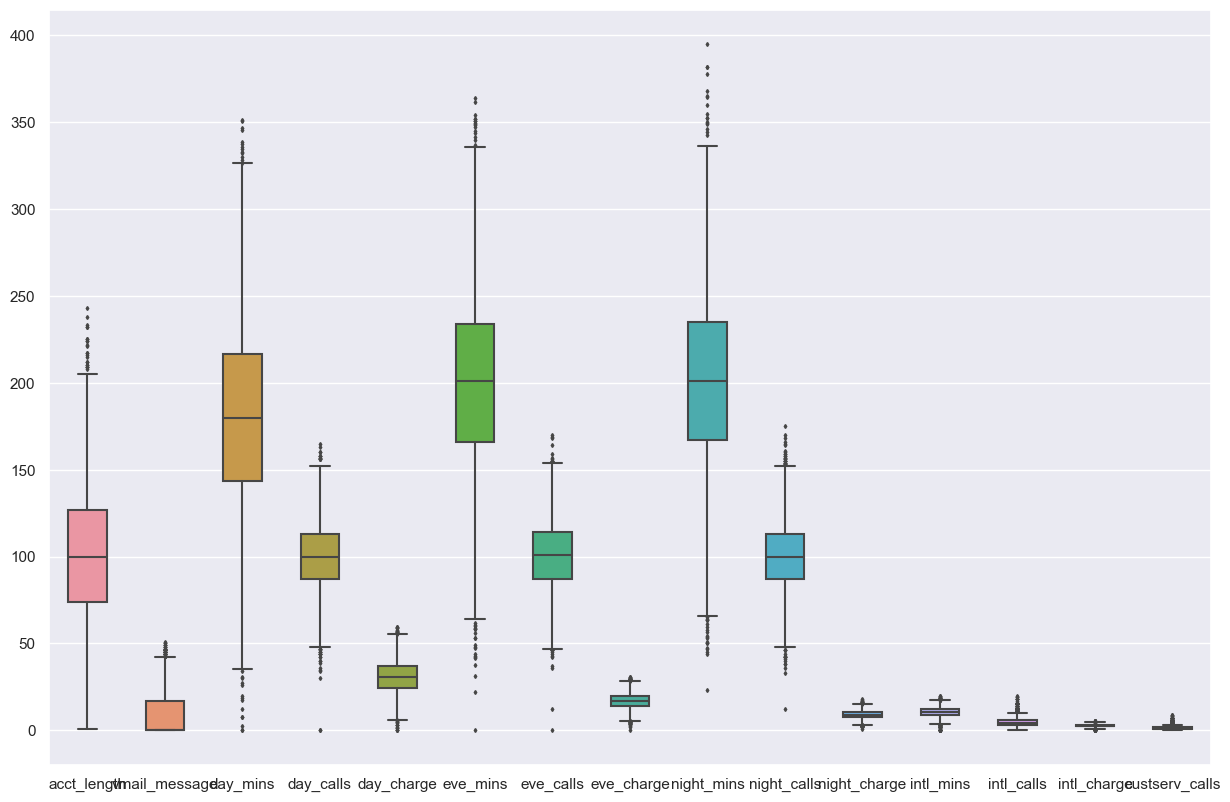

In [97]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,fliersize=2)
plt.show()

#Observation: Needs outlier treatment # here visualization is difficult, so trying other way of plotting outliers.

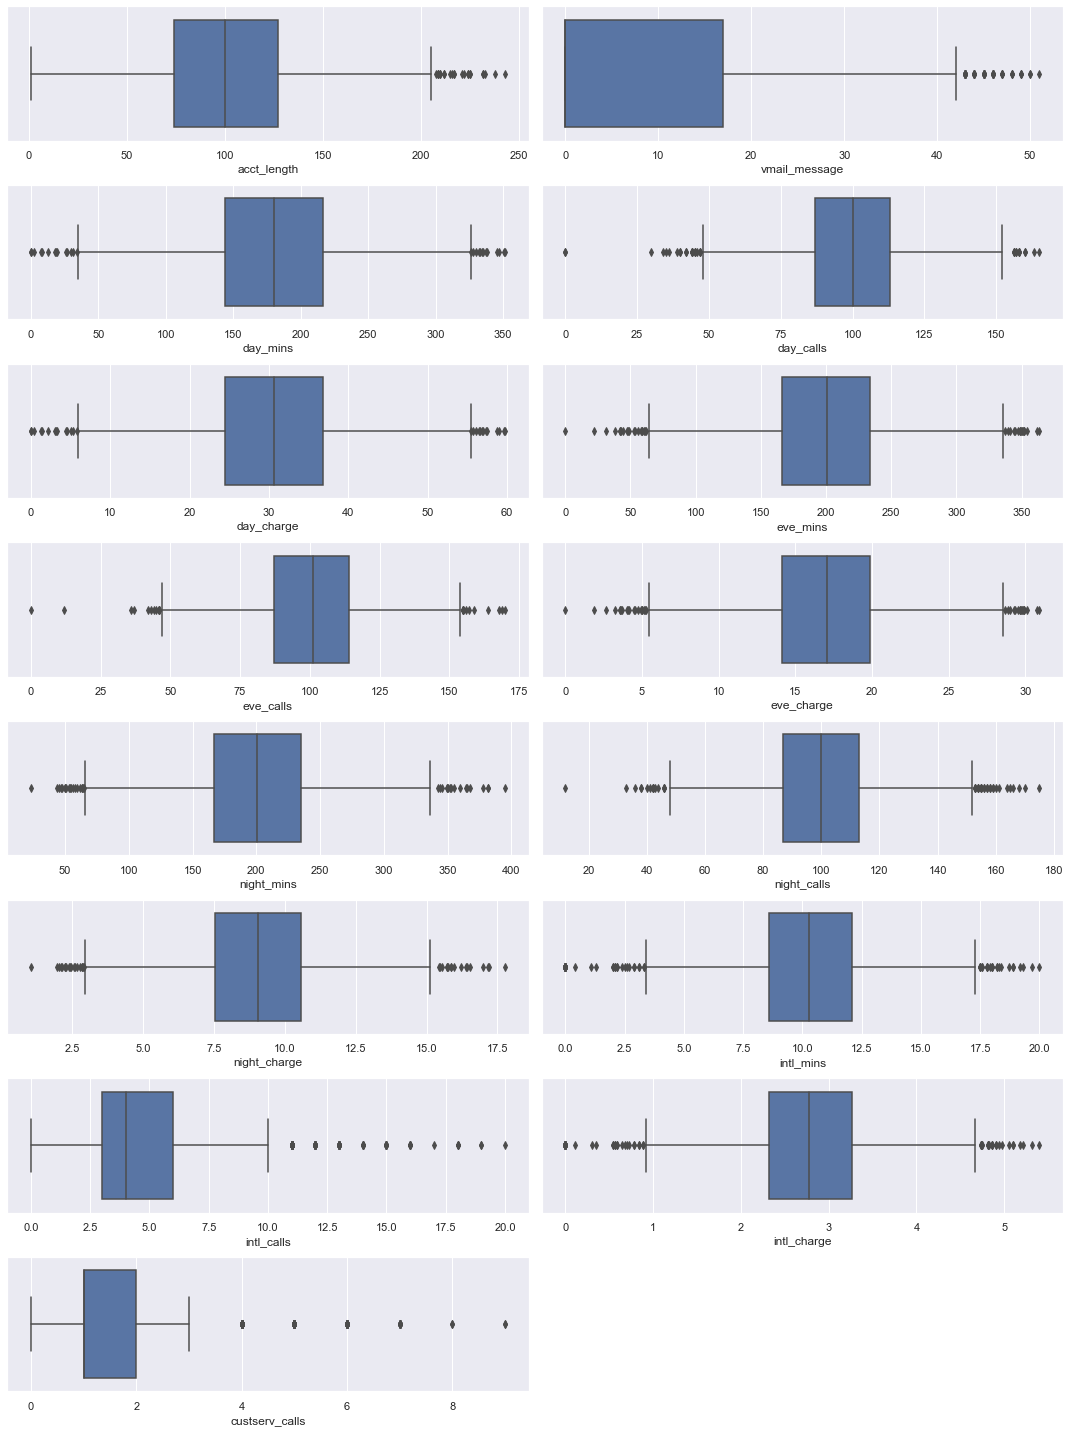

In [98]:
%matplotlib inline
plt.figure(figsize=(15,20), tight_layout=True)  
plotnumber=1
for column in data:
    if plotnumber<=16:
        ax=plt.subplot(8,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=data[column])
        plotnumber+=1

# Removing Outliers

In [99]:
# now separating features individually and removing outliers.

### Checking Outlier For The Feature "acct_length"

<AxesSubplot:xlabel='acct_length', ylabel='Density'>

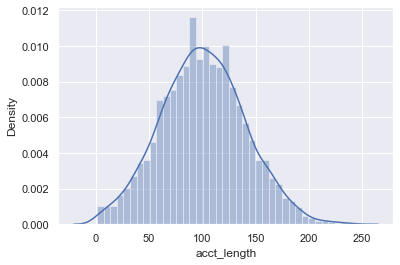

In [100]:
sns.distplot(df.acct_length)


<AxesSubplot:xlabel='acct_length'>

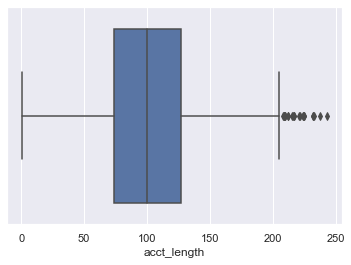

In [101]:
sns.boxplot(df.acct_length) 

### Removing Outlier For "acct_length" Feature Using IQR

In [102]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['acct_length'], interpolation = 'midpoint') 

IQR

53.0

In [103]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['acct_length'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['acct_length'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [104]:
min_limit

-5.5

In [105]:
#filtering the data
df.loc[df['acct_length']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [106]:
max_limit

206.5

In [107]:
df.loc[df['acct_length']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
197      43          208        510   378-3625          0           0   
238      50          215        510   393-9619          0           0   
309      41          209        415   413-5310          0           0   
416       8          224        510   361-6563          1           0   
817      44          243        510   355-9360          0           0   
1045     43          217        408   385-7082          0           0   
1093     45          210        408   360-8666          0           0   
1387      6          212        415   366-6751          0           0   
1408     32          232        408   386-9177          0           0   
1551     22          225        415   371-2500          0           0   
1751     50          225        415   374-1213          0           0   
1886     13          224        510   360-8919          0           0   
2150     40          212        415   336-8343          0           0   
2259     27          210        415   363-7802          0           1   
2277      7          217        415   421-9846          0           0   
2700     40          209        510   388-7540          0           0   
3216     41          221        510   365-2192          0           1   
3227     34          209        415   369-8703          0           0   
4260     47          238        415   351-4104          0           0   
4342     22          216        408   333-1633          0           0   
4379     42          222        408   372-2527          0           1   
4389     11          232        415   364-3035          0           0   
4395     14          233        408   390-2383          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
197               0     326.5         67       55.51  ...        113   
238               0      83.6        148       14.21  ...         91   
309               0     227.2        128       38.62  ...         92   
416               0     171.5         99       29.16  ...        103   
817               0      95.5         92       16.24  ...         63   
1045              0     176.4        115       29.99  ...        128   
1093              0     104.6        121       17.78  ...         71   
1387              0     126.0         96       21.42  ...         80   
1408              0     165.6        104       28.15  ...        115   
1551              0     165.4        106       28.12  ...        109   
1751              0     182.7        142       31.06  ...         63   
1886              0     111.4        133       18.94  ...         66   
2150              0     226.0        127       38.42  ...         83   
2259             31     313.8         87       53.35  ...        103   
2277              0     123.7        138       21.03  ...        105   
2700              0     255.1        124       43.37  ...        110   
3216             24     180.5         85       30.69  ...         92   
3227              0     153.7        105       26.13  ...         87   
4260              0     202.0         60       34.34  ...        105   
4342              0     212.3        106       36.09  ...         71   
4379             34     218.5         89       37.15  ...         76   
4389              0     248.2        128       42.19  ...         96   
4395              0     137.3         94       23.34  ...         87   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
197        14.99       181.7          102          8.18       10.7   
238        10.28       226.6          110         10.20       10.7   
309        21.96       183.5           74          8.26        8.9   
416        13.60       212.4          102          9.56        5.0   
817        13.91       264.2          118         11.89        6.6   
1045       13.50       306.6          107         13.80        9.3   
1093       12.71       255.1      

In [108]:
## imputing the outliers 
df.loc[df['acct_length'] > max_limit,'acct_length']=np.median(df['acct_length'])

<AxesSubplot:xlabel='acct_length'>

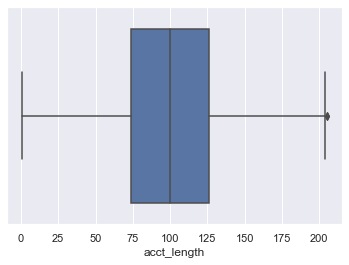

In [109]:
# Checking for outliers again using boxplot

sns.boxplot(df.acct_length)

In [110]:
df.loc[df['acct_length']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [111]:
## Applying IQR again for 'acct_length' feature

In [112]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['acct_length'], interpolation = 'midpoint') 

IQR

52.0

In [113]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['acct_length'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['acct_length'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [114]:
min_limit

-4.0

In [115]:
#filtering the data
df.loc[df['acct_length']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [116]:
max_limit

204.0

In [117]:
df.loc[df['acct_length']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
928      21        205.0        510   413-4039          0           1   
2303     15        205.0        510   361-5864          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
928              24     175.8        139       29.89  ...         98   
2303              0      49.9        123        8.48  ...         81   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
928        13.18       180.7           64          8.13        7.8   
2303       12.81       188.2           67          8.47       10.1   

      intl_calls  intl_charge  custserv_calls  churn  
928            5         2.11               2      0  
2303           4         2.73               2      0  

[2 rows x 21 columns]

In [118]:
## imputing the outliers 
df.loc[df['acct_length'] > max_limit,'acct_length']=np.median(df['acct_length'])

<AxesSubplot:xlabel='acct_length'>

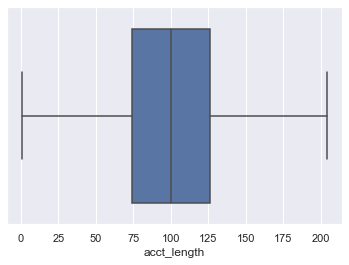

In [119]:
# Checking for outliers again using boxplot

sns.boxplot(df.acct_length)

In [120]:
## Outlier removed for acct_length

### Checking Outlier For The Feature "vmail_message"

<AxesSubplot:xlabel='vmail_message', ylabel='Density'>

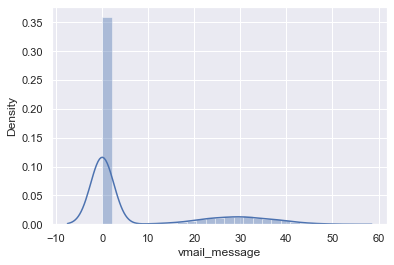

In [121]:
sns.distplot(df.vmail_message)

<AxesSubplot:xlabel='vmail_message'>

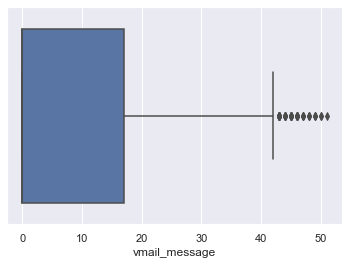

In [122]:
sns.boxplot(df.vmail_message) 

### Removing Outlier For "vmail_message" Feature Using IQR

In [123]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['vmail_message'], interpolation = 'midpoint') 

IQR

17.0

In [124]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['vmail_message'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['vmail_message'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [125]:
min_limit

-25.5

In [126]:
#filtering the data
df.loc[df['vmail_message']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [127]:
max_limit

42.5

In [128]:
df.loc[df['vmail_message']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
71       23        162.0        510   413-7170          0           1   
149      39        145.0        408   366-6730          0           1   
268      24         64.0        510   389-1475          0           1   
277      41        144.0        408   339-3049          0           1   
423      15         96.0        415   356-9187          0           1   
599      35         75.0        510   370-3021          0           1   
615      44         48.0        510   340-3075          0           1   
790       3         92.0        415   416-9522          1           1   
845       9        144.0        415   376-4484          0           1   
872      36        149.0        510   359-9972          0           1   
1269      9         55.0        510   364-7644          0           1   
1285     40        109.0        415   388-6479          0           1   
1378     14         58.0        415   404-9348          1           1   
1441     27        172.0        408   331-5962          0           1   
1454     44        133.0        408   398-8745          0           1   
1487     44        116.0        415   345-5639          0           1   
1596      2         63.0        510   330-5168          0           1   
1602     46        121.0        415   400-3343          1           1   
1732     11         97.0        415   408-1242          0           1   
1797     49         92.0        415   361-1404          0           1   
1846     30        120.0        510   395-2579          0           1   
1908     19         88.0        408   383-5109          0           1   
2366     25        122.0        408   402-8930          0           1   
2457     20        130.0        415   364-9567          0           1   
2570     12         64.0        415   374-1836          0           1   
2608     15         81.0        408   347-6717          0           1   
2686     33         92.0        415   404-3105          0           1   
2716     49        137.0        510   376-4284          0           1   
2768     33        121.0        408   419-2369          0           1   
2887     37        134.0        415   359-7255          0           1   
3154      6         73.0        415   356-1654          0           1   
3165     48         91.0        408   377-7276          0           1   
3174     40         36.0        408   359-5091          0           1   
3246     27         77.0        408   334-6129          1           1   
3279     31        139.0        415   376-2408          0           1   
3342     43        128.0        415   403-4933          0           1   
3433      1         74.0        408   351-4935          0           1   
3523     44        102.0        510   403-2262          0           1   
3524     45         71.0        415   371-2649          0           1   
3543     50        109.0        415   339-8534          1           1   
3577      9        133.0        408   394-8999          0           1   
3826     16         59.0        510   347-6527          0           1   
3910     16         51.0        415   355-4598          0           1   
4059     19         58.0        408   396-8095          0           1   
4275     38        135.0        415   339-9147          0           1   
4338     19        135.0        415   329-4175          0           1   
4369      0        141.0        408   421-9683          0           1   
4445      6         59.0        415   368-4117          0           1   
4502      6         60.0        415   404-3055          1           1   
4516     33         87.0        408   407-8683          0           1   
4588     18         81.0        415   376-5968          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
71               46     224.9         97       38.23  ...         84   
149              43     257.7         97       43.81  ...        

In [129]:
## imputing the outliers 
df.loc[df['vmail_message'] > max_limit,'vmail_message']=np.median(df['vmail_message'])

<AxesSubplot:xlabel='vmail_message'>

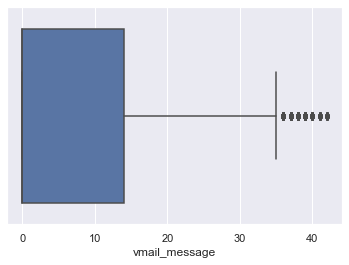

In [130]:
# Checking for outliers again using boxplot

sns.boxplot(df.vmail_message)

In [131]:
max_limit

42.5

In [132]:
df.loc[df['vmail_message']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [133]:
## Applying IQR again for 'vmail_message' feature

In [134]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['vmail_message'], interpolation = 'midpoint') 

IQR

14.0

In [135]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['vmail_message'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['vmail_message'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [136]:
min_limit

-21.0

In [137]:
#filtering the data
df.loc[df['vmail_message']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [138]:
max_limit

35.0

In [139]:
df.loc[df['vmail_message']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
9        49        141.0        415   330-8173          1           1   
26       50         57.0        408   357-3817          0           1   
35       10         72.0        415   362-1407          0           1   
41       20        135.0        408   383-6029          1           1   
65       47         40.0        415   352-8305          0           1   
...     ...          ...        ...        ...        ...         ...   
4493     46         83.0        510   395-2817          0           1   
4495     46         93.0        415   338-2813          0           1   
4509     42        128.0        510   331-6243          0           1   
4518     34         61.0        415   396-2646          0           1   
4592     41         72.0        415   333-1661          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
9              37.0     258.6         84       43.96  ...        111   
26             39.0     213.0        115       36.21  ...        112   
35             37.0     220.0         80       37.40  ...        102   
41             41.0     173.1         85       29.43  ...        107   
65             41.0     148.1         74       25.18  ...         88   
...             ...       ...        ...         ...  ...        ...   
4493           37.0     133.1        117       22.63  ...         89   
4495           37.0     230.4         95       39.17  ...         89   
4509           40.0     272.2        112       46.27  ...        111   
4518           36.0     233.9         97       39.76  ...        133   
4592           38.0      84.3        116       14.33  ...        127   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
9          18.87       326.4           97         14.69       11.2   
26         16.24       182.7          115          8.22        9.5   
35         18.47       152.8           71          6.88       14.7   
41         17.33       122.2           78          5.50       14.6   
65         14.41       214.1          102          9.63        6.2   
...          ...         ...          ...           ...        ...   
4493       14.57       218.1           92          9.81       10.9   
4495       13.22       179.0           90          8.06       10.4   
4509       20.39       257.3          124         11.58       11.6   
4518       14.93       177.0           83          7.97        9.5   
4592       22.71       167.7           75          7.55        8.3   

      intl_calls  intl_charge  custserv_calls  churn  
9              5         3.02               0      0  
26             3         2.57               0      0  
35             6         3.97               3      0  
41            15         3.94               0      1  
65             5         1.67               2      0  
...          ...          ...             ...    ...  
4493           4         2.94               3      0  
4495           9         2.81               3      0  
4509           2         3.13               1      0  
4518           4         2.57               1      0  
4592           6         2.24               4      1  

[230 rows x 21 columns]

In [140]:
## imputing the outliers 
df.loc[df['vmail_message'] > max_limit,'vmail_message']=np.median(df['vmail_message'])

<AxesSubplot:xlabel='vmail_message'>

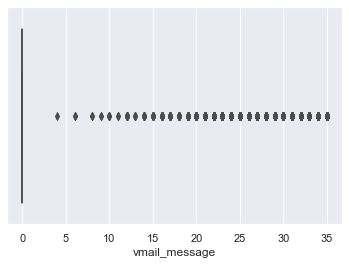

In [141]:
# Checking for outliers again using boxplot

sns.boxplot(df.vmail_message)

In [142]:
## No need to treat outlier again as there is more than 5% outliers

### Checking Outlier For The Feature "day_mins"

<AxesSubplot:xlabel='day_mins', ylabel='Density'>

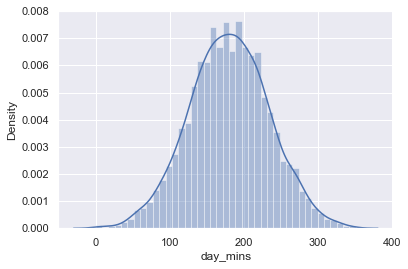

In [143]:
sns.distplot(df.day_mins)

<AxesSubplot:xlabel='day_mins'>

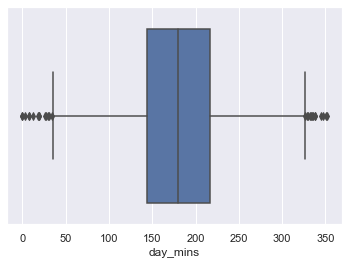

In [144]:
sns.boxplot(df.day_mins)

### Removing Outlier For "day_mins" Feature Using IQR

In [145]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['day_mins'], interpolation = 'midpoint') 

IQR

73.10000000000002

In [146]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['day_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['day_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [147]:
min_limit

34.049999999999955

In [148]:
# filtering the data
df.loc[df['day_mins']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
685       5         63.0        415   408-4530          0           1   
741      29         66.0        415   337-1225          0           0   
1052     37         98.0        415   378-6772          1           0   
1076     50         53.0        415   337-4339          0           1   
1345     41         98.0        415   392-2555          0           0   
1397     46        101.0        510   413-7655          0           0   
1621     40        138.0        510   370-9533          0           1   
1986     48         70.0        415   405-9233          0           0   
2124     16         43.0        415   381-9367          0           0   
2252     30        148.0        408   333-7449          0           0   
2736     36        127.0        510   403-1128          0           1   
2753     35        134.0        415   406-4158          0           0   
3046     22        110.0        510   357-5784          0           0   
3174     40         36.0        408   359-5091          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
685            32.0      30.9        113        5.25  ...        113   
741             0.0      34.0        133        5.78  ...         61   
1052            0.0      12.5         67        2.13  ...         90   
1076           27.0      25.9        119        4.40  ...         96   
1345            0.0       0.0          0        0.00  ...        130   
1397            0.0       0.0          0        0.00  ...        119   
1621           21.0      19.5        149        3.32  ...        109   
1986            0.0       7.9        100        1.34  ...         83   
2124            0.0      27.0        117        4.59  ...         97   
2252            0.0      17.6        121        2.99  ...        125   
2736           27.0       2.6        113        0.44  ...        102   
2753            0.0       7.8         86        1.33  ...        100   
3046            0.0      18.9         92        3.21  ...         81   
3174            0.0      29.9        123        5.08  ...        117   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
685        15.90       230.8          101         10.39        8.6   
741        23.68       129.6          120          5.83       11.5   
1052       21.81       169.4           88          7.62        7.7   
1076       17.55       228.1           64         10.26        6.5   
1345       13.57       167.1           88          7.52        6.8   
1397       16.33       168.8           95          7.60        7.2   
1621       11.98       179.7          111          8.09        7.9   
1986       11.59       156.6           89          7.05       12.1   
2124       13.68       279.5           96         12.58       10.7   
2252       13.74       203.1           82          9.14       10.6   
2736       21.59       242.7          156         10.92        9.2   
2753       14.57       186.5           80          8.39       12.9   
3046       21.96       109.6           74          4.93       14.8   
3174       10.97       325.9          105         14.67        8.6   

      intl_calls  intl_charge  custserv_calls  churn  
685            7         2.32               1      0  
741            3         3.11               0      0  
1052           9         2.08               1      0  
1076           7         1.76               1      0  
1345           1         1.84               4      1  
1397           4         1.94               1      0  
1621           1         2.13               0      0  
1986           1         3.27               0      0  
2124           3         2.89               3      0  
2252           6         2.86               1      0  
2736           5         2.48               3      0  
2753           2         3.48               2      0  
3046           4         4.00               1      0  
3174    

In [149]:
## imputing the outliers 
df.loc[df['day_mins'] < min_limit,'day_mins']=np.median(df['day_mins'])

In [150]:
df.loc[df['day_mins']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [151]:
max_limit

326.45000000000005

In [152]:
df.loc[df['day_mins']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
15       34        161.0        415   351-7269          0           0   
156      35         83.0        415   370-9116          0           0   
197      43        100.0        510   378-3625          0           0   
365       5        154.0        415   343-5709          0           0   
605      24        112.0        415   373-2053          0           0   
975       8        129.0        510   332-6181          0           0   
985      34         64.0        415   345-9140          1           0   
1679     36         82.0        510   393-4823          0           0   
2028     41         93.0        510   408-4836          0           0   
2594     35        115.0        510   348-1163          1           0   
3442     44        133.0        510   384-7176          0           0   
3993     31        112.0        408   406-2551          0           0   
4121     44        101.0        415   412-3425          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
15              0.0     332.9         67       56.59  ...         97   
156             0.0     337.4        120       57.36  ...        116   
197             0.0     326.5         67       55.51  ...        113   
365             0.0     350.8         75       59.64  ...         94   
605             0.0     335.5         77       57.04  ...        109   
975             0.0     334.3        118       56.83  ...        104   
985             0.0     346.8         55       58.96  ...         79   
1679            0.0     329.8         73       56.07  ...        120   
2028            0.0     328.1        106       55.78  ...         89   
2594            0.0     345.3         81       58.70  ...        106   
3442            0.0     338.4         86       57.53  ...         97   
3993            0.0     351.5         95       59.76  ...        108   
4121            0.0     332.1         91       56.46  ...        123   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
15         27.01       160.6          128          7.23        5.4   
156        19.33       153.9          114          6.93       15.8   
197        14.99       181.7          102          8.18       10.7   
365        18.40       253.9          100         11.43       10.1   
605        18.06       265.0          132         11.93       12.7   
975        16.33       191.0           83          8.59       10.4   
985        21.21       275.4          102         12.39       13.3   
1679       17.71       267.1          102         12.02       10.6   
2028       12.89       303.5          114         13.66        8.7   
2594       17.29       217.5          107          9.79       11.8   
3442       19.94       264.8          139         11.92       14.8   
3993       17.58       275.8          146         12.41       11.9   
4121       12.84       277.8           99         12.50       11.3   

      intl_calls  intl_charge  custserv_calls  churn  
15             9         1.46               4      1  
156            7         4.27               0      1  
197            6         2.89               2      1  
365            9         2.73               1      1  
605            8         3.43               2      1  
975            6         2.81               0      1  
985            9         3.59               1      1  
1679           6         2.86               0      1  
2028           3         2.35               1      1  
2594           8         3.19               1      1  
3442           4         4.00               3      1  
3993           4         3.21               1      1  
4121           3         3.05               1      1  

[13 rows x 21 columns]

In [153]:
## imputing the outliers 
df.loc[df['day_mins'] > max_limit,'day_mins']=np.median(df['day_mins'])

<AxesSubplot:xlabel='day_mins'>

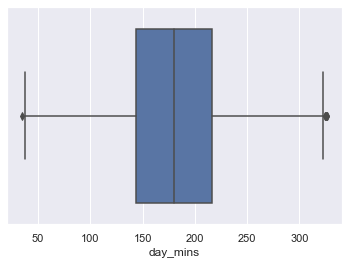

In [154]:
sns.boxplot(df.day_mins)

In [155]:
df.loc[df['day_mins']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [156]:
#Applying IQR again for day_mins

In [157]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['day_mins'], interpolation = 'midpoint') 

IQR

72.0

In [158]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['day_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['day_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [159]:
min_limit

36.19999999999999

In [160]:
df.loc[df['day_mins']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
1130     38        122.0        415   361-5225          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
1130            0.0      35.1         62        5.97  ...         89   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
1130       15.37       251.6           58         11.32       12.7   

      intl_calls  intl_charge  custserv_calls  churn  
1130           2         3.43               1      0  

[1 rows x 21 columns]

In [161]:
## imputing the outliers 
df.loc[df['day_mins'] < min_limit,'day_mins']=np.median(df['day_mins'])

In [162]:
df.loc[df['day_mins']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [163]:
max_limit

324.2

In [164]:
df.loc[df['day_mins']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2412     48         89.0        415   373-4264          0           0   
2824     37         81.0        415   406-4100          0           0   
3628     30        127.0        415   395-1013          1           0   
3675      3        114.0        510   408-1861          0           0   
3733     16         92.0        510   401-7159          0           0   
4476     16         70.0        415   331-5650          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2412            0.0     326.3        112       55.47  ...        110   
2824            0.0     324.7         48       55.20  ...         82   
3628            0.0     324.3        107       55.13  ...         90   
3675            0.0     326.1        119       55.44  ...        105   
3733            0.0     325.4         73       55.32  ...        100   
4476            0.0     325.5        128       55.34  ...        105   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2412       14.03       162.9           97          7.33        7.5   
2824       20.09       187.6           78          8.44       13.1   
3628       12.04       207.6           90          9.34       12.8   
3675       13.69       220.1          129          9.90       11.0   
3733       10.86       209.9           98          9.45        9.3   
4476       25.53       199.8           93          8.99        5.7   

      intl_calls  intl_charge  custserv_calls  churn  
2412           1         2.03               1      1  
2824           5         3.54               0      1  
3628           7         3.46               1      1  
3675           3         2.97               1      1  
3733          10         2.51               1      1  
4476           7         1.54               1      1  

[6 rows x 21 columns]

In [165]:
## imputing the outliers 
df.loc[df['day_mins'] > max_limit,'day_mins']=np.median(df['day_mins'])

<AxesSubplot:xlabel='day_mins'>

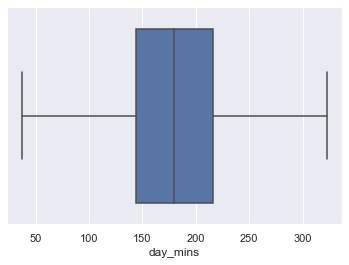

In [166]:
sns.boxplot(df.day_mins)

In [167]:
## Outlier has been removed for "day_mins"

### Checking Outlier For The Feature "day_calls"

<AxesSubplot:xlabel='day_calls', ylabel='Density'>

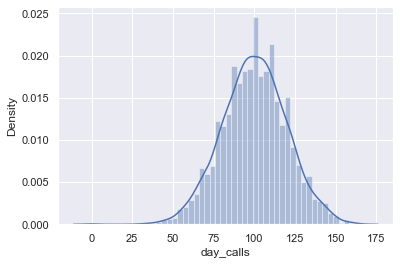

In [168]:
sns.distplot(df.day_calls)

<AxesSubplot:xlabel='day_calls'>

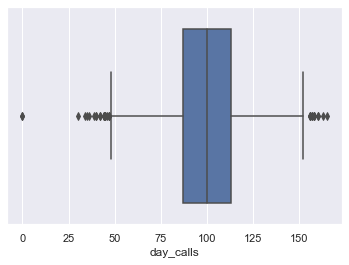

In [169]:
sns.boxplot(df.day_calls)

### Removing Outlier For "day_calls" Feature Using IQR

In [170]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['day_calls'], interpolation = 'midpoint') 

IQR

26.0

In [171]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['day_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['day_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [172]:
min_limit

48.0

In [173]:
# filtering the data
df.loc[df['day_calls']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
143      46        103.0        510   390-2805          0           0   
415       8        113.0        415   352-4418          0           0   
692      29         82.0        408   343-2741          0           0   
740      44         67.0        510   414-9027          0           1   
1144     30        155.0        408   353-6300          0           0   
1322      8          2.0        415   415-8448          1           0   
1345     41         98.0        415   392-2555          0           0   
1346     38        106.0        408   403-9167          1           0   
1397     46        101.0        510   413-7655          0           0   
1422     50        107.0        510   411-5740          0           1   
1989     26        124.0        415   420-5652          0           1   
2217      4        137.0        415   415-3689          0           1   
2492     40         73.0        415   344-9347          0           0   
2884     44        170.0        415   397-6542          0           0   
2885     11        135.0        415   333-4492          0           0   
2964     37         99.0        408   353-3372          0           0   
3187     49         58.0        408   391-6558          0           1   
3978     10        111.0        408   327-4579          1           0   
4049     37        112.0        408   402-4433          0           0   
4155     39        131.0        415   399-1939          0           0   
4445      6         59.0        415   368-4117          0           1   
4464     39         87.0        415   375-8229          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
143             0.0     246.5         47       41.91  ...         84   
415             0.0     239.7         47       40.75  ...        110   
692             0.0     185.8         36       31.59  ...        134   
740            20.0     230.6         40       39.20  ...         58   
1144            0.0     216.7         30       36.84  ...        125   
1322            0.0     132.1         42       22.46  ...         88   
1345            0.0     180.0          0        0.00  ...        130   
1346            0.0     133.7         45       22.73  ...        107   
1397            0.0     180.0          0        0.00  ...        119   
1422           31.0     160.3         45       27.25  ...         70   
1989           30.0     144.5         35       24.57  ...        101   
2217           22.0     189.6         42       32.23  ...        137   
2492            0.0     203.3         45       34.56  ...         87   
2884            0.0     285.7         44       48.57  ...        144   
2885            0.0     190.9         44       32.45  ...        109   
2964            0.0     256.4         44       43.59  ...        105   
3187            0.0     211.9         40       36.02  ...         76   
3978            0.0     159.4         47       27.10  ...         53   
4049            0.0     135.7         34       23.07  ...         99   
4155            0.0     131.3         39       22.32  ...        101   
4445            0.0     200.1         44       34.02  ...         78   
4464            0.0     210.7         46       35.82  ...        116   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
143        16.62       200.5           96          9.02       11.7   
415        24.05       238.4           88         10.73        8.7   
692        23.50       192.1          104          8.64        5.7   
740        16.07       162.2          115          7.30        9.4   
1144       12.27       135.3          106          6.09       10.8   
1322       11.81       192.6          119          8.67        9.1   
1345       13.57       167.1           88          7.52        6.8   
1346       15.96       181.9           89          8.19       10.7   
1397       16.33       168.8           

In [174]:
## imputing the outliers 
df.loc[df['day_calls'] < min_limit,'day_calls']=np.median(df['day_calls'])

In [175]:
df.loc[df['day_calls']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [176]:
max_limit

152.0

In [177]:
df.loc[df['day_calls']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
315      19         39.0        408   332-2462          0           0   
468       3         86.0        415   392-2381          0           1   
1057     49         86.0        415   332-2258          0           1   
1121     22         91.0        415   390-7930          0           0   
1460     26         80.0        415   361-8288          0           0   
1869     25        101.0        408   387-5533          0           0   
2392     50         90.0        510   400-8069          0           0   
2394     15         57.0        415   345-5089          0           0   
4230      7        150.0        510   390-2027          1           0   
4297     40        105.0        408   336-4889          1           0   
4308     43        150.0        408   340-6060          0           1   
4562     32         42.0        415   389-2130          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
315             0.0      60.4      158.0       10.27  ...        120   
468            32.0      70.9      163.0       12.05  ...        121   
1057            0.0     123.0      158.0       20.91  ...        119   
1121            0.0     154.4      165.0       26.25  ...        121   
1460            0.0     198.1      160.0       33.68  ...         87   
1869            0.0     239.0      156.0       40.63  ...        106   
2392            0.0     125.4      158.0       21.32  ...         83   
2394            0.0     189.3      157.0       32.18  ...         70   
4230            0.0     114.8      156.0       19.52  ...         78   
4297            0.0     274.0      156.0       46.58  ...         69   
4308           24.0     212.4      157.0       36.11  ...         91   
4562            0.0     137.9      160.0       23.44  ...        107   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
315        26.03       123.9           46          5.58       12.4   
468        14.17       244.9          105         11.02       11.1   
1057       11.38       138.2          103          6.22       13.3   
1121       14.31       239.9           81         10.80       11.7   
1460       13.32       182.1           76          8.19        9.3   
1869       23.21       278.2           93         12.52       13.5   
2392       22.87       238.6          103         10.74       11.0   
2394       14.87       221.9          117          9.99       11.2   
4230       11.50       218.4           98          9.83       15.6   
4297       22.36       195.9           93          8.82       11.3   
4308       14.34       199.4          112          8.97        9.7   
4562       19.97       166.6           70          7.50       14.3   

      intl_calls  intl_charge  custserv_calls  churn  
315            3         3.35               1      0  
468            5         3.00               3      0  
1057           4         3.59               1      0  
1121           4         3.16               5      1  
1460           3         2.51               3      0  
1869           8         3.65               1      1  
2392           7         2.97               1      0  
2394           5         3.02               3      0  
4230           4         4.21               1      1  
4297           3         3.05               3      1  
4308           1         2.62               2      0  
4562           3         3.86               5      1  

[12 rows x 21 columns]

In [178]:
## imputing the outliers 
df.loc[df['day_calls'] > max_limit,'day_calls']= np.median(df['day_calls'])

<AxesSubplot:xlabel='day_calls'>

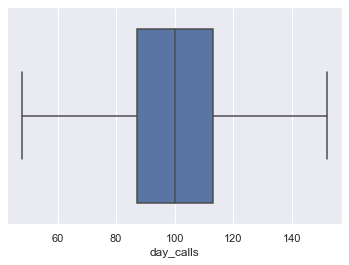

In [179]:
sns.boxplot(df.day_calls)

In [180]:
df.loc[df['day_calls'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [181]:
## Outlier has been removed for "day_calls"

### Checking Outlier For The Feature "day_charge"

<AxesSubplot:xlabel='day_charge', ylabel='Density'>

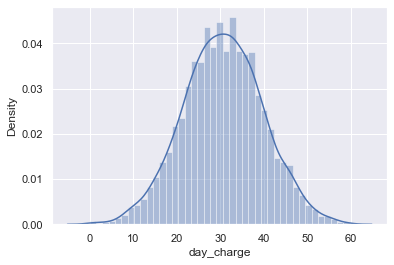

In [182]:
sns.distplot(df.day_charge)

<AxesSubplot:xlabel='day_charge'>

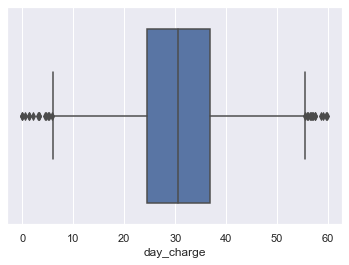

In [183]:
sns.boxplot(df.day_charge)

### Removing Outlier For "day_charge" Feature Using IQR

In [184]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['day_charge'], interpolation = 'midpoint') 

IQR

12.43

In [185]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['day_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['day_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [186]:
min_limit

5.785

In [187]:
# filtering the data
df.loc[df['day_charge']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
685       5         63.0        415   408-4530          0           1   
741      29         66.0        415   337-1225          0           0   
1052     37         98.0        415   378-6772          1           0   
1076     50         53.0        415   337-4339          0           1   
1345     41         98.0        415   392-2555          0           0   
1397     46        101.0        510   413-7655          0           0   
1621     40        138.0        510   370-9533          0           1   
1986     48         70.0        415   405-9233          0           0   
2124     16         43.0        415   381-9367          0           0   
2252     30        148.0        408   333-7449          0           0   
2736     36        127.0        510   403-1128          0           1   
2753     35        134.0        415   406-4158          0           0   
3046     22        110.0        510   357-5784          0           0   
3174     40         36.0        408   359-5091          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
685            32.0     180.0      113.0        5.25  ...        113   
741             0.0     180.0      133.0        5.78  ...         61   
1052            0.0     180.0       67.0        2.13  ...         90   
1076           27.0     180.0      119.0        4.40  ...         96   
1345            0.0     180.0      100.0        0.00  ...        130   
1397            0.0     180.0      100.0        0.00  ...        119   
1621           21.0     180.0      149.0        3.32  ...        109   
1986            0.0     180.0      100.0        1.34  ...         83   
2124            0.0     180.0      117.0        4.59  ...         97   
2252            0.0     180.0      121.0        2.99  ...        125   
2736           27.0     180.0      113.0        0.44  ...        102   
2753            0.0     180.0       86.0        1.33  ...        100   
3046            0.0     180.0       92.0        3.21  ...         81   
3174            0.0     180.0      123.0        5.08  ...        117   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
685        15.90       230.8          101         10.39        8.6   
741        23.68       129.6          120          5.83       11.5   
1052       21.81       169.4           88          7.62        7.7   
1076       17.55       228.1           64         10.26        6.5   
1345       13.57       167.1           88          7.52        6.8   
1397       16.33       168.8           95          7.60        7.2   
1621       11.98       179.7          111          8.09        7.9   
1986       11.59       156.6           89          7.05       12.1   
2124       13.68       279.5           96         12.58       10.7   
2252       13.74       203.1           82          9.14       10.6   
2736       21.59       242.7          156         10.92        9.2   
2753       14.57       186.5           80          8.39       12.9   
3046       21.96       109.6           74          4.93       14.8   
3174       10.97       325.9          105         14.67        8.6   

      intl_calls  intl_charge  custserv_calls  churn  
685            7         2.32               1      0  
741            3         3.11               0      0  
1052           9         2.08               1      0  
1076           7         1.76               1      0  
1345           1         1.84               4      1  
1397           4         1.94               1      0  
1621           1         2.13               0      0  
1986           1         3.27               0      0  
2124           3         2.89               3      0  
2252           6         2.86               1      0  
2736           5         2.48               3      0  
2753           2         3.48               2      0  
3046           4         4.00               1      0  
3174    

In [188]:
df.loc[df['day_charge'] < min_limit,'day_charge']=np.median(df['day_charge'])

In [189]:
df.loc[df['day_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [190]:
max_limit

55.504999999999995

In [191]:
df.loc[df['day_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
15       34        161.0        415   351-7269          0           0   
156      35         83.0        415   370-9116          0           0   
197      43        100.0        510   378-3625          0           0   
365       5        154.0        415   343-5709          0           0   
605      24        112.0        415   373-2053          0           0   
975       8        129.0        510   332-6181          0           0   
985      34         64.0        415   345-9140          1           0   
1679     36         82.0        510   393-4823          0           0   
2028     41         93.0        510   408-4836          0           0   
2594     35        115.0        510   348-1163          1           0   
3442     44        133.0        510   384-7176          0           0   
3993     31        112.0        408   406-2551          0           0   
4121     44        101.0        415   412-3425          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
15              0.0     180.0       67.0       56.59  ...         97   
156             0.0     180.0      120.0       57.36  ...        116   
197             0.0     180.0       67.0       55.51  ...        113   
365             0.0     180.0       75.0       59.64  ...         94   
605             0.0     180.0       77.0       57.04  ...        109   
975             0.0     180.0      118.0       56.83  ...        104   
985             0.0     180.0       55.0       58.96  ...         79   
1679            0.0     180.0       73.0       56.07  ...        120   
2028            0.0     180.0      106.0       55.78  ...         89   
2594            0.0     180.0       81.0       58.70  ...        106   
3442            0.0     180.0       86.0       57.53  ...         97   
3993            0.0     180.0       95.0       59.76  ...        108   
4121            0.0     180.0       91.0       56.46  ...        123   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
15         27.01       160.6          128          7.23        5.4   
156        19.33       153.9          114          6.93       15.8   
197        14.99       181.7          102          8.18       10.7   
365        18.40       253.9          100         11.43       10.1   
605        18.06       265.0          132         11.93       12.7   
975        16.33       191.0           83          8.59       10.4   
985        21.21       275.4          102         12.39       13.3   
1679       17.71       267.1          102         12.02       10.6   
2028       12.89       303.5          114         13.66        8.7   
2594       17.29       217.5          107          9.79       11.8   
3442       19.94       264.8          139         11.92       14.8   
3993       17.58       275.8          146         12.41       11.9   
4121       12.84       277.8           99         12.50       11.3   

      intl_calls  intl_charge  custserv_calls  churn  
15             9         1.46               4      1  
156            7         4.27               0      1  
197            6         2.89               2      1  
365            9         2.73               1      1  
605            8         3.43               2      1  
975            6         2.81               0      1  
985            9         3.59               1      1  
1679           6         2.86               0      1  
2028           3         2.35               1      1  
2594           8         3.19               1      1  
3442           4         4.00               3      1  
3993           4         3.21               1      1  
4121           3         3.05               1      1  

[13 rows x 21 columns]

In [192]:
## imputing the outliers 
df.loc[df['day_charge'] > max_limit,'day_charge']= np.median(df['day_charge'])

In [193]:
df.loc[df['day_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='day_charge'>

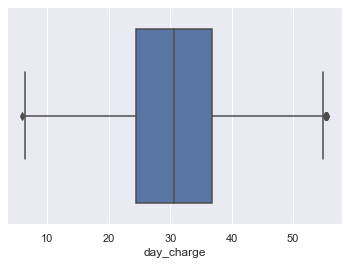

In [194]:
sns.boxplot(df.day_charge)

In [195]:
#Applying IQR again for 'day_charge' feature

In [196]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['day_charge'], interpolation = 'midpoint') 

IQR

12.239999999999998

In [197]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['day_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['day_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [198]:
min_limit

6.150000000000002

In [199]:
df.loc[df['day_charge'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
1130     38        122.0        415   361-5225          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
1130            0.0     180.0       62.0        5.97  ...         89   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
1130       15.37       251.6           58         11.32       12.7   

      intl_calls  intl_charge  custserv_calls  churn  
1130           2         3.43               1      0  

[1 rows x 21 columns]

In [200]:
df.loc[df['day_charge'] < min_limit,'day_charge']=np.median(df['day_charge'])

In [201]:
df.loc[df['day_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [202]:
max_limit

55.11

In [203]:
df.loc[df['day_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2412     48         89.0        415   373-4264          0           0   
2824     37         81.0        415   406-4100          0           0   
3628     30        127.0        415   395-1013          1           0   
3675      3        114.0        510   408-1861          0           0   
3733     16         92.0        510   401-7159          0           0   
4476     16         70.0        415   331-5650          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2412            0.0     180.0      112.0       55.47  ...        110   
2824            0.0     180.0       48.0       55.20  ...         82   
3628            0.0     180.0      107.0       55.13  ...         90   
3675            0.0     180.0      119.0       55.44  ...        105   
3733            0.0     180.0       73.0       55.32  ...        100   
4476            0.0     180.0      128.0       55.34  ...        105   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2412       14.03       162.9           97          7.33        7.5   
2824       20.09       187.6           78          8.44       13.1   
3628       12.04       207.6           90          9.34       12.8   
3675       13.69       220.1          129          9.90       11.0   
3733       10.86       209.9           98          9.45        9.3   
4476       25.53       199.8           93          8.99        5.7   

      intl_calls  intl_charge  custserv_calls  churn  
2412           1         2.03               1      1  
2824           5         3.54               0      1  
3628           7         3.46               1      1  
3675           3         2.97               1      1  
3733          10         2.51               1      1  
4476           7         1.54               1      1  

[6 rows x 21 columns]

In [204]:
## imputing the outliers 
df.loc[df['day_charge'] > max_limit,'day_charge']= np.median(df['day_charge'])

In [205]:
df.loc[df['day_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='day_charge'>

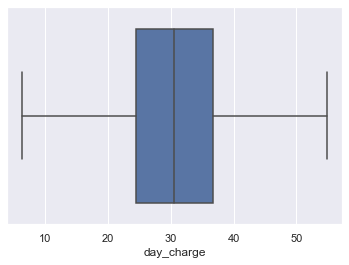

In [206]:
sns.boxplot(df.day_charge)

In [207]:
## Outlier has been removed for the feature "day_charge"

In [208]:
df.columns

Index(['state', 'acct_length', 'area_code', 'phone', 'intl_plan', 'vmail_plan',
       'vmail_message', 'day_mins', 'day_calls', 'day_charge', 'eve_mins',
       'eve_calls', 'eve_charge', 'night_mins', 'night_calls', 'night_charge',
       'intl_mins', 'intl_calls', 'intl_charge', 'custserv_calls', 'churn'],
      dtype='object')

### Checking Outlier For The Feature "eve_mins"

<AxesSubplot:xlabel='eve_mins', ylabel='Density'>

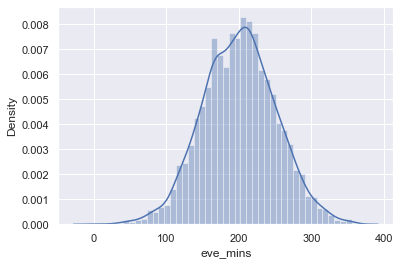

In [209]:
sns.distplot(df.eve_mins)

<AxesSubplot:xlabel='eve_mins'>

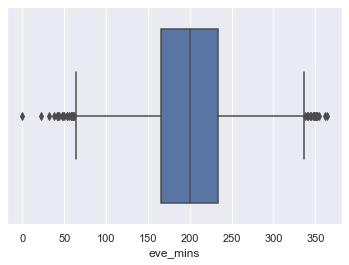

In [210]:
sns.boxplot(df.eve_mins)

### Removing Outlier For "eve_mins" Feature Using IQR

In [211]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_mins'], interpolation = 'midpoint') 

IQR

68.1

In [212]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [213]:
min_limit

63.750000000000014

In [214]:
# filtering the data
df.loc[df['eve_mins']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
3        35         84.0        408   375-9999          1           0   
32       18        172.0        408   383-1121          0           0   
533      36        125.0        415   406-5059          0           1   
587      30        114.0        415   406-4588          0           0   
821      23         80.0        415   332-2137          0           0   
850      47        166.0        408   354-9492          0           0   
889      23        103.0        415   386-9141          0           0   
893      24        167.0        415   397-8772          1           0   
1054      0         50.0        408   362-8331          0           0   
1190     29        149.0        415   369-5942          0           0   
1233     14         48.0        510   380-5246          0           0   
1335     50         71.0        415   409-7034          0           0   
1960     43         38.0        510   413-9055          0           0   
2932     44         97.0        415   418-3181          0           0   
3370     35         54.0        415   334-9483          0           0   
3799     42         61.0        415   358-3314          0           1   
3989     31         42.0        408   342-6813          0           0   
3996      6         92.0        408   411-1056          0           0   
4375     42        102.0        408   408-7260          0           0   
4387     45        118.0        408   416-5528          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
3               0.0     299.4       71.0       50.90  ...         88   
32              0.0     212.0      121.0       36.04  ...        115   
533             0.0     201.3      117.0       34.22  ...         78   
587             0.0     169.6       85.0       28.83  ...         86   
821             0.0     105.8      110.0       17.99  ...         88   
850             0.0     274.3      110.0       46.63  ...        109   
889             0.0     198.5      112.0       33.75  ...         90   
893             0.0     244.8       91.0       41.62  ...        105   
1054            0.0     183.6      107.0       31.21  ...        118   
1190            0.0     156.0       56.0       26.52  ...        116   
1233            0.0     128.2       71.0       21.79  ...         78   
1335            0.0     243.7      124.0       41.43  ...         90   
1960            0.0     149.0       92.0       25.33  ...         78   
2932            0.0     209.2      134.0       35.56  ...          0   
3370            0.0     255.4      122.0       43.42  ...         87   
3799            0.0     139.8      108.0       23.77  ...        120   
3989            0.0     269.9       99.0       45.88  ...         76   
3996            0.0     250.6      100.0       42.60  ...         94   
4375            0.0     157.4       83.0       26.76  ...        102   
4387            0.0     160.3      110.0       27.25  ...         92   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
3           5.26       196.9           89          8.86        6.6   
32          2.65       293.3           78         13.20       12.6   
533         3.59       125.7          104          5.66        5.4   
587         5.01       179.3          124          8.07        7.4   
821         3.73       189.6           87          8.53       13.1   
850         4.50       246.1          119         11.07       10.9   
889         3.61       179.2          124          8.06       12.4   
893         5.17       176.7          110          7.95       10.7   
1054        4.98       202.6           99          9.12        8.7   
1190        4.76       163.3          104          7.35        8.9   
1233        4.09       116.3           80          5.23        8.9   
1335        5.10       189.0          129          8.50       11.3   
1960        4.18       163.3           93        

In [215]:
df.loc[df['eve_mins'] < min_limit,'eve_mins']=np.median(df['eve_mins'])

In [216]:
df.loc[df['eve_mins'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [217]:
max_limit

336.15

In [218]:
df.loc[df['eve_mins'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
6        19        121.0        510   355-9993          0           1   
8        18        117.0        408   335-4719          0           0   
302      39        121.0        408   329-7347          0           0   
529       7        100.0        510   403-2455          1           0   
580      15        113.0        415   353-6007          0           0   
1601      2         99.0        510   387-2604          1           0   
2160     33         94.0        408   351-4025          1           0   
2331     15         46.0        415   368-9751          0           1   
2551     20        102.0        415   386-9774          0           0   
2732     27        130.0        408   384-4938          1           0   
3075      5        181.0        510   370-9592          0           1   
3955     17        132.0        415   390-1966          0           0   
4158     34         98.0        510   393-2256          0           0   
4347     28        109.0        415   396-4269          0           0   
4544     16         39.0        408   352-8833          0           0   
4564     43        145.0        510   401-1455          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
6              24.0     218.2       88.0       37.09  ...        108   
8               0.0     184.5       97.0       31.37  ...         80   
302             0.0     170.4      108.0       28.97  ...         68   
529             0.0      68.5      110.0       11.65  ...        115   
580             0.0     209.4      151.0       35.60  ...        113   
1601            0.0     242.3      102.0       41.19  ...        102   
2160            0.0      89.5       94.0       15.22  ...        106   
2331           34.0     191.4      102.0       32.54  ...         96   
2551            0.0     129.5       56.0       22.02  ...        118   
2732            0.0     216.2      106.0       36.75  ...         86   
3075            0.0     105.2       61.0       17.88  ...         79   
3955            0.0     172.7       90.0       29.36  ...         62   
4158            0.0     198.6       92.0       33.76  ...         99   
4347            0.0     101.8      105.0       17.31  ...        107   
4544            0.0     181.2       71.0       30.80  ...        108   
4564            0.0     158.8      120.0       27.00  ...        145   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
6          29.62       212.6          118          9.57        7.5   
8          29.89       215.8           90          9.71        8.7   
302        29.79       297.0           87         13.37       11.2   
529        28.65       205.2           99          9.23       12.1   
580        29.52       246.0          116         11.07        7.4   
1601       29.83       163.1           93          7.34       11.3   
2160       28.89       172.9           76          7.78        7.9   
2331       30.75       147.5          132          6.64        7.2   
2551       30.11       145.5           93          6.55       10.9   
2732       30.91       126.7          123          5.70       16.9   
3075       29.01       165.7           97          7.46        6.3   
3955       29.24       301.6          113         13.57        5.5   
4158       29.70       221.7           83          9.98        7.3   
4347       29.66       233.2          150         10.49        7.5   
4544       29.32       213.6          145          9.61       12.1   
4564       29.93       177.6          140          7.99        6.2   

      intl_calls  intl_charge  custserv_calls  churn  
6              7         2.03               3      0  
8              4         2.35               1      0  
302            3         3.02               0      1  
529            9         3.27               0      0  
580            2         2.00               1      1  
1601           3  

In [219]:
df.loc[df['eve_mins'] > max_limit,'eve_mins']=np.median(df['eve_mins'])

In [220]:
df.loc[df['eve_mins'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_mins'>

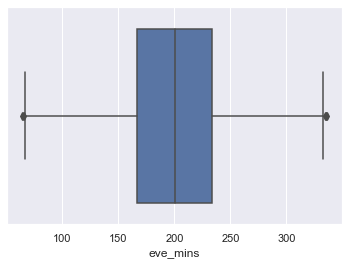

In [221]:
sns.boxplot(df.eve_mins)

In [222]:
#Applying IQR again for 'eve_mins' feature

In [223]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_mins'], interpolation = 'midpoint') 

IQR

66.89999999999998

In [224]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [225]:
min_limit

66.45000000000005

In [226]:
df.loc[df['eve_mins'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
186      34        106.0        408   422-1471          0           0   
1906      7         91.0        415   384-7873          0           1   
2316      6        135.0        415   389-6037          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
186             0.0     158.7       74.0       26.98  ...        139   
1906            0.0     169.8      105.0       28.87  ...        116   
2316            0.0     186.0      107.0       31.62  ...         94   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
186         5.47       198.5          103          8.93       10.2   
1906        5.54       144.4           92          6.50       10.9   
2316        5.61       213.1          105          9.59       12.9   

      intl_calls  intl_charge  custserv_calls  churn  
186            4         2.75               1      0  
1906           4         2.94               1      0  
2316           4         3.48               1      0  

[3 rows x 21 columns]

In [227]:
df.loc[df['eve_mins'] < min_limit,'eve_mins']=np.median(df['eve_mins'])

In [228]:
df.loc[df['eve_mins'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [229]:
max_limit

334.04999999999995

In [230]:
df.loc[df['eve_mins'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
579       6         72.0        408   388-4879          0           1   
1276     22         51.0        415   373-1448          0           0   
2337     20        139.0        415   335-3133          0           0   
3650      8         95.0        415   415-8746          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
579            21.0     186.7      108.0       31.74  ...         86   
1276            0.0     229.7      129.0       39.05  ...        104   
2337            0.0     181.6      119.0       30.87  ...        118   
3650            0.0     145.4       98.0       24.72  ...        109   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
579        28.48       187.2          119          8.42       16.5   
1276       28.56       192.8          128          8.68        9.6   
2337       28.53       149.8           64          6.74        8.3   
3650       28.40       209.8           72          9.44        8.8   

      intl_calls  intl_charge  custserv_calls  churn  
579            4         4.46               1      0  
1276           1         2.59               1      1  
2337           6         2.24               4      0  
3650           2         2.38               1      0  

[4 rows x 21 columns]

In [231]:
df.loc[df['eve_mins'] > max_limit,'eve_mins']=np.median(df['eve_mins'])

In [232]:
df.loc[df['eve_mins'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_mins'>

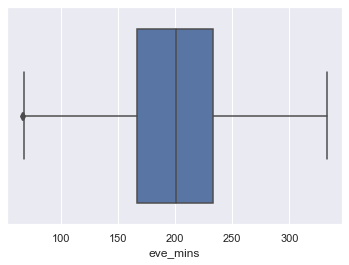

In [233]:
sns.boxplot(df.eve_mins)

In [234]:
#Applying IQR again for 'eve_mins' feature

In [235]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_mins'], interpolation = 'midpoint') 

IQR

66.6

In [236]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [237]:
min_limit

67.00000000000001

In [238]:
df.loc[df['eve_mins'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
534      18         67.0        510   373-6784          0           0   
1362     49         63.0        510   329-7102          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
534             0.0     310.4       97.0       52.77  ...        123   
1362            0.0     132.9      122.0       22.59  ...         62   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
534         5.65       246.5           99         11.09        9.2   
1362        5.70       160.4          121          7.22        9.9   

      intl_calls  intl_charge  custserv_calls  churn  
534           10         2.48               4      0  
1362           2         2.67               3      0  

[2 rows x 21 columns]

In [239]:
df.loc[df['eve_mins'] < min_limit,'eve_mins']=np.median(df['eve_mins'])

In [240]:
df.loc[df['eve_mins'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [241]:
max_limit

333.4

In [242]:
df.loc[df['eve_mins'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_mins'>

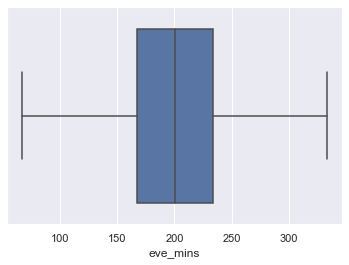

In [243]:
sns.boxplot(df.eve_mins)

In [244]:
## Outlier has been removed for the feature "eve_mins"

### Checking Outlier For The Feature "eve_calls"

<AxesSubplot:xlabel='eve_calls', ylabel='Density'>

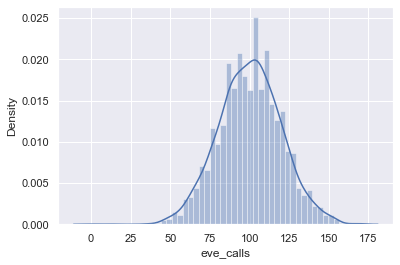

In [245]:
sns.distplot(df.eve_calls)

<AxesSubplot:xlabel='eve_calls'>

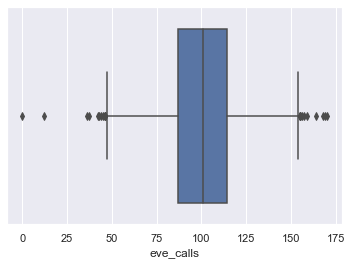

In [246]:
sns.boxplot(df.eve_calls)

### Removing Outlier For "eve_calls" Feature Using IQR

In [247]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_calls'], interpolation = 'midpoint') 

IQR

27.0

In [248]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [249]:
min_limit

46.5

In [250]:
df.loc[df['eve_calls']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
154      36         96.0        415   362-4596          0           0   
475       2         74.0        510   329-9046          0           0   
646      49        153.0        408   405-9384          0           1   
960       2          5.0        415   380-2758          0           0   
1266     12         42.0        415   348-1528          0           0   
1615      6         74.0        408   384-3389          0           0   
1730     32        161.0        408   397-8011          0           0   
1856      5         86.0        408   419-7415          0           0   
2592     45        163.0        415   378-8342          0           0   
2853     19        105.0        415   354-4448          0           1   
2932     44         97.0        415   418-3181          0           0   
3341     24        138.0        510   353-6954          0           0   
3527     38         90.0        408   364-8776          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
154             0.0     260.4      115.0       44.27  ...         46   
475             0.0     148.5      111.0       25.25  ...         42   
646            28.0     235.6       74.0       40.05  ...         37   
960             0.0     199.2      106.0       33.86  ...         12   
1266            0.0     155.4      127.0       26.42  ...         45   
1615            0.0     157.1       95.0       26.71  ...         36   
1730            0.0     107.5      121.0       18.28  ...         46   
1856            0.0     171.8      106.0       29.21  ...         44   
2592            0.0     202.9      100.0       34.49  ...         46   
2853           21.0     147.0      112.0       24.99  ...         43   
2932            0.0     209.2      134.0       35.56  ...          0   
3341            0.0      89.1      117.0       15.15  ...         46   
3527            0.0     160.9       97.0       27.35  ...         46   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
154        12.41       269.5           87         12.13       11.5   
475        12.45       289.2           83         13.01        9.9   
646        19.37       170.3          103          7.66       15.4   
960        15.92       214.0           85          9.63       13.3   
1266       13.95       157.7          128          7.10        9.0   
1615       18.11       280.4           77         12.62        7.6   
1730       21.79       247.2          131         11.12       12.6   
1856       25.64       139.4          108          6.27        9.7   
2592       15.18       203.8          116          9.17       12.8   
2853       16.77       267.4           93         12.03        8.7   
2932        0.00       175.4           94          7.89       11.8   
3341       10.78       190.5           71          8.57        9.9   
3527       11.59       209.0          121          9.40        9.1   

      intl_calls  intl_charge  custserv_calls  churn  
154            4         3.11               5      0  
475            6         2.67               3      0  
646            9         4.16               0      0  
960            3         3.59               3      0  
1266           3         2.43               0      0  
1615           3         2.05               2      0  
1730           3         3.40               2      0  
1856           5         2.62               1      0  
2592           3         3.46               5      0  
2853           3         2.35               2      0  
2932           6         3.19               1      0  
3341           4         2.67               2      0  
3527           4         2.46               2      0  

[13 rows x 21 columns]

In [251]:
#Performing imputation
df.loc[df['eve_calls'] < min_limit,'eve_calls']=np.median(df['eve_calls'])

In [252]:
df.loc[df['eve_calls'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [253]:
max_limit

154.5

In [254]:
df.loc[df['eve_calls'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
58       48         68.0        415   403-9733          0           0   
301       9        127.0        415   416-1676          0           0   
1020     11        115.0        415   336-6128          0           1   
1071     38        134.0        408   408-8650          0           0   
1706     20         54.0        415   408-6302          0           0   
2227     40         41.0        408   417-6906          0           0   
3121     10         98.0        408   388-8797          0           0   
3157      2        127.0        415   416-3649          1           0   
3219     34        150.0        415   421-6268          0           1   
3940     50         44.0        415   368-2732          0           1   
4486     32        143.0        415   374-8632          0           0   
4571     30         98.0        415   381-9931          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
58              0.0     148.8       70.0       25.30  ...      164.0   
301             0.0     266.6      106.0       45.32  ...      168.0   
1020           33.0     145.0       72.0       24.65  ...      157.0   
1071            0.0     205.3      122.0       34.90  ...      155.0   
1706            0.0     273.8      113.0       46.55  ...      156.0   
2227            0.0     237.8       92.0       40.43  ...      155.0   
3121            0.0     169.9       77.0       28.88  ...      155.0   
3157            0.0     143.2       60.0       24.34  ...      159.0   
3219           35.0     139.6       72.0       23.73  ...      170.0   
3940           20.0     184.8      105.0       31.42  ...      169.0   
4486            0.0     271.7       67.0       46.19  ...      155.0   
4571            0.0     243.4       88.0       41.38  ...      155.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
58         20.95       129.8          103          5.84       12.1   
301        22.51       207.2          119          9.32        5.9   
1020       16.53       242.3          138         10.90       14.2   
1071       20.44       179.1          107          8.06        5.0   
1706       10.17       267.6          117         12.04       11.7   
2227       19.00       217.4           90          9.78       10.2   
3121       11.76       142.6          105          6.42        8.5   
3157       15.26       171.8          122          7.73        6.2   
3219       28.29       213.8          105          9.62        8.8   
3940       16.58       130.1          121          5.85       11.6   
4486       16.07       101.1           55          4.55       17.2   
4571       12.50       156.4           80          7.04        9.7   

      intl_calls  intl_charge  custserv_calls  churn  
58             3         3.27               3      0  
301            2         1.59               1      1  
1020           3         3.83               2      0  
1071           9         1.35               1      0  
1706           3         3.16               1      0  
2227           6         2.75               2      0  
3121           7         2.30               1      0  
3157           4         1.67               4      1  
3219           2         2.38               2      0  
3940           3         3.13               1      0  
4486           5         4.64               1      0  
4571           4         2.62               2      0  

[12 rows x 21 columns]

In [255]:
#Performing imputation
df.loc[df['eve_calls'] > max_limit,'eve_calls']=np.median(df['eve_calls'])

In [256]:
df.loc[df['eve_calls'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_calls'>

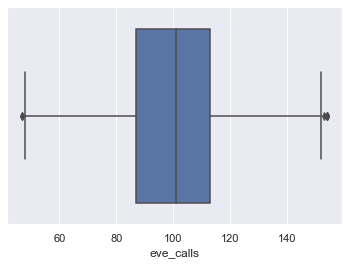

In [257]:
sns.boxplot(df.eve_calls)

In [258]:
#Applying IQR again for "eve_calls" feature

In [259]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_calls'], interpolation = 'midpoint') 

IQR

26.0

In [260]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [261]:
min_limit

48.0

In [262]:
df.loc[df['eve_calls'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
3907      2         99.0        408   342-5216          0           1   
4052      3        102.0        510   384-1980          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
3907           21.0     180.2       97.0       30.63  ...       47.0   
4052           29.0     158.2      132.0       26.89  ...       47.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
3907       14.25       203.1           84          9.14       14.6   
4052       21.30       219.3           86          9.87       15.1   

      intl_calls  intl_charge  custserv_calls  churn  
3907           5         3.94               2      0  
4052           4         4.08               1      0  

[2 rows x 21 columns]

In [263]:
#Performing imputation
df.loc[df['eve_calls'] < min_limit,'eve_calls']=np.median(df['eve_calls'])

In [264]:
df.loc[df['eve_calls'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [265]:
max_limit

152.0

In [266]:
df.loc[df['eve_calls'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
1876     36         46.0        415   354-8191          0           0   
2063     20         90.0        415   353-3203          0           0   
2937     17         96.0        415   353-3223          0           1   
4105     13         73.0        408   372-3559          0           0   
4229     15         91.0        510   336-2510          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
1876            0.0     164.2      116.0       27.91  ...      153.0   
2063            0.0     114.4      122.0       19.45  ...      154.0   
2937            0.0     108.6       90.0       18.46  ...      154.0   
4105            0.0      67.0       76.0       11.39  ...      154.0   
4229            0.0     103.2      100.0       17.54  ...      154.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
1876       16.68       236.1          119         10.62        8.1   
2063       10.85       253.1          109         11.39       10.1   
2937       17.54       126.3          118          5.68       13.4   
4105       18.96       236.5          151         10.64       11.2   
4229       10.61       336.1          111         15.12       14.0   

      intl_calls  intl_charge  custserv_calls  churn  
1876           1         2.19               1      0  
2063           5         2.73               2      0  
2937           4         3.62               0      0  
4105           2         3.02               1      0  
4229           4         3.78               2      1  

[5 rows x 21 columns]

In [267]:
#Performing imputation
df.loc[df['eve_calls'] > max_limit,'eve_calls']=np.median(df['eve_calls'])

In [268]:
df.loc[df['eve_calls'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_calls'>

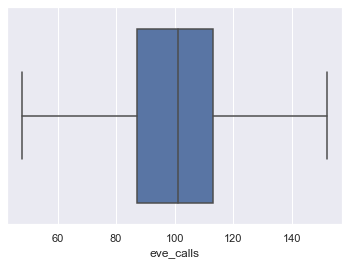

In [269]:
sns.boxplot(df.eve_calls)

In [270]:
## Outlier has been removed for "eve_calls" feature

### Checking Outlier For The Feature "eve_charge"

<AxesSubplot:xlabel='eve_charge', ylabel='Density'>

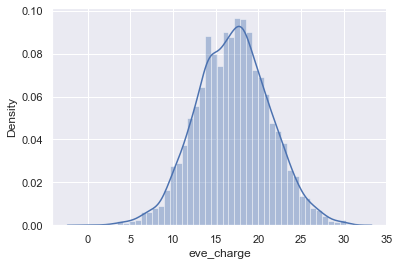

In [271]:
sns.distplot(df.eve_charge)

<AxesSubplot:xlabel='eve_charge'>

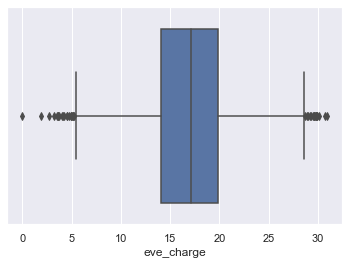

In [272]:
sns.boxplot(df.eve_charge)

### Removing Outlier For "eve_charge" Feature Using IQR

In [273]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_charge'], interpolation = 'midpoint') 

IQR

5.790000000000001

In [274]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [275]:
min_limit

5.414999999999997

In [276]:
df.loc[df['eve_charge']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
3        35         84.0        408   375-9999          1           0   
32       18        172.0        408   383-1121          0           0   
533      36        125.0        415   406-5059          0           1   
587      30        114.0        415   406-4588          0           0   
821      23         80.0        415   332-2137          0           0   
850      47        166.0        408   354-9492          0           0   
889      23        103.0        415   386-9141          0           0   
893      24        167.0        415   397-8772          1           0   
1054      0         50.0        408   362-8331          0           0   
1190     29        149.0        415   369-5942          0           0   
1233     14         48.0        510   380-5246          0           0   
1335     50         71.0        415   409-7034          0           0   
1960     43         38.0        510   413-9055          0           0   
2932     44         97.0        415   418-3181          0           0   
3370     35         54.0        415   334-9483          0           0   
3799     42         61.0        415   358-3314          0           1   
3989     31         42.0        408   342-6813          0           0   
3996      6         92.0        408   411-1056          0           0   
4375     42        102.0        408   408-7260          0           0   
4387     45        118.0        408   416-5528          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
3               0.0     299.4       71.0       50.90  ...       88.0   
32              0.0     212.0      121.0       36.04  ...      115.0   
533             0.0     201.3      117.0       34.22  ...       78.0   
587             0.0     169.6       85.0       28.83  ...       86.0   
821             0.0     105.8      110.0       17.99  ...       88.0   
850             0.0     274.3      110.0       46.63  ...      109.0   
889             0.0     198.5      112.0       33.75  ...       90.0   
893             0.0     244.8       91.0       41.62  ...      105.0   
1054            0.0     183.6      107.0       31.21  ...      118.0   
1190            0.0     156.0       56.0       26.52  ...      116.0   
1233            0.0     128.2       71.0       21.79  ...       78.0   
1335            0.0     243.7      124.0       41.43  ...       90.0   
1960            0.0     149.0       92.0       25.33  ...       78.0   
2932            0.0     209.2      134.0       35.56  ...      101.0   
3370            0.0     255.4      122.0       43.42  ...       87.0   
3799            0.0     139.8      108.0       23.77  ...      120.0   
3989            0.0     269.9       99.0       45.88  ...       76.0   
3996            0.0     250.6      100.0       42.60  ...       94.0   
4375            0.0     157.4       83.0       26.76  ...      102.0   
4387            0.0     160.3      110.0       27.25  ...       92.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
3           5.26       196.9           89          8.86        6.6   
32          2.65       293.3           78         13.20       12.6   
533         3.59       125.7          104          5.66        5.4   
587         5.01       179.3          124          8.07        7.4   
821         3.73       189.6           87          8.53       13.1   
850         4.50       246.1          119         11.07       10.9   
889         3.61       179.2          124          8.06       12.4   
893         5.17       176.7          110          7.95       10.7   
1054        4.98       202.6           99          9.12        8.7   
1190        4.76       163.3          104          7.35        8.9   
1233        4.09       116.3           80          5.23        8.9   
1335        5.10       189.0          129          8.50       11.3   
1960        4.18       163.3           93        

In [277]:
#Performing imputation
df.loc[df['eve_charge'] < min_limit,'eve_charge']=np.median(df['eve_charge'])

In [278]:
df.loc[df['eve_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [279]:
max_limit

28.575000000000003

In [280]:
df.loc[df['eve_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
6        19        121.0        510   355-9993          0           1   
8        18        117.0        408   335-4719          0           0   
302      39        121.0        408   329-7347          0           0   
529       7        100.0        510   403-2455          1           0   
580      15        113.0        415   353-6007          0           0   
1601      2         99.0        510   387-2604          1           0   
2160     33         94.0        408   351-4025          1           0   
2331     15         46.0        415   368-9751          0           1   
2551     20        102.0        415   386-9774          0           0   
2732     27        130.0        408   384-4938          1           0   
3075      5        181.0        510   370-9592          0           1   
3955     17        132.0        415   390-1966          0           0   
4158     34         98.0        510   393-2256          0           0   
4347     28        109.0        415   396-4269          0           0   
4544     16         39.0        408   352-8833          0           0   
4564     43        145.0        510   401-1455          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
6              24.0     218.2       88.0       37.09  ...      108.0   
8               0.0     184.5       97.0       31.37  ...       80.0   
302             0.0     170.4      108.0       28.97  ...       68.0   
529             0.0      68.5      110.0       11.65  ...      115.0   
580             0.0     209.4      151.0       35.60  ...      113.0   
1601            0.0     242.3      102.0       41.19  ...      102.0   
2160            0.0      89.5       94.0       15.22  ...      106.0   
2331           34.0     191.4      102.0       32.54  ...       96.0   
2551            0.0     129.5       56.0       22.02  ...      118.0   
2732            0.0     216.2      106.0       36.75  ...       86.0   
3075            0.0     105.2       61.0       17.88  ...       79.0   
3955            0.0     172.7       90.0       29.36  ...       62.0   
4158            0.0     198.6       92.0       33.76  ...       99.0   
4347            0.0     101.8      105.0       17.31  ...      107.0   
4544            0.0     181.2       71.0       30.80  ...      108.0   
4564            0.0     158.8      120.0       27.00  ...      145.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
6          29.62       212.6          118          9.57        7.5   
8          29.89       215.8           90          9.71        8.7   
302        29.79       297.0           87         13.37       11.2   
529        28.65       205.2           99          9.23       12.1   
580        29.52       246.0          116         11.07        7.4   
1601       29.83       163.1           93          7.34       11.3   
2160       28.89       172.9           76          7.78        7.9   
2331       30.75       147.5          132          6.64        7.2   
2551       30.11       145.5           93          6.55       10.9   
2732       30.91       126.7          123          5.70       16.9   
3075       29.01       165.7           97          7.46        6.3   
3955       29.24       301.6          113         13.57        5.5   
4158       29.70       221.7           83          9.98        7.3   
4347       29.66       233.2          150         10.49        7.5   
4544       29.32       213.6          145          9.61       12.1   
4564       29.93       177.6          140          7.99        6.2   

      intl_calls  intl_charge  custserv_calls  churn  
6              7         2.03               3      0  
8              4         2.35               1      0  
302            3         3.02               0      1  
529            9         3.27               0      0  
580            2         2.00               1      1  
1601           3  

In [281]:
df.loc[df['eve_charge'] > max_limit,'eve_charge']=np.median(df['eve_charge'])

In [282]:
df.loc[df['eve_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_charge'>

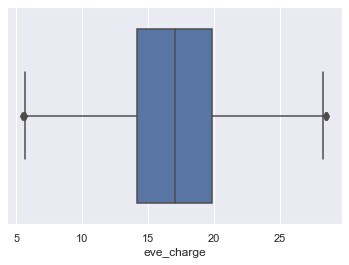

In [283]:
sns.boxplot(df.eve_charge)

In [284]:
#Applying IQR again for 'eve_charge' feature

In [285]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_charge'], interpolation = 'midpoint') 

IQR

5.68

In [286]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [287]:
min_limit

5.66

In [288]:
df.loc[df['eve_charge'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
186      34        106.0        408   422-1471          0           0   
534      18         67.0        510   373-6784          0           0   
1906      7         91.0        415   384-7873          0           1   
2316      6        135.0        415   389-6037          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
186             0.0     158.7       74.0       26.98  ...      139.0   
534             0.0     310.4       97.0       52.77  ...      123.0   
1906            0.0     169.8      105.0       28.87  ...      116.0   
2316            0.0     186.0      107.0       31.62  ...       94.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
186         5.47       198.5          103          8.93       10.2   
534         5.65       246.5           99         11.09        9.2   
1906        5.54       144.4           92          6.50       10.9   
2316        5.61       213.1          105          9.59       12.9   

      intl_calls  intl_charge  custserv_calls  churn  
186            4         2.75               1      0  
534           10         2.48               4      0  
1906           4         2.94               1      0  
2316           4         3.48               1      0  

[4 rows x 21 columns]

In [289]:
#Performing imputation
df.loc[df['eve_charge'] < min_limit,'eve_charge']=np.median(df['eve_charge'])

In [290]:
df.loc[df['eve_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [291]:
max_limit

28.38

In [292]:
df.loc[df['eve_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
579       6         72.0        408   388-4879          0           1   
1276     22         51.0        415   373-1448          0           0   
2337     20        139.0        415   335-3133          0           0   
3650      8         95.0        415   415-8746          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
579            21.0     186.7      108.0       31.74  ...       86.0   
1276            0.0     229.7      129.0       39.05  ...      104.0   
2337            0.0     181.6      119.0       30.87  ...      118.0   
3650            0.0     145.4       98.0       24.72  ...      109.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
579        28.48       187.2          119          8.42       16.5   
1276       28.56       192.8          128          8.68        9.6   
2337       28.53       149.8           64          6.74        8.3   
3650       28.40       209.8           72          9.44        8.8   

      intl_calls  intl_charge  custserv_calls  churn  
579            4         4.46               1      0  
1276           1         2.59               1      1  
2337           6         2.24               4      0  
3650           2         2.38               1      0  

[4 rows x 21 columns]

In [293]:
df.loc[df['eve_charge'] > max_limit,'eve_charge']=np.median(df['eve_charge'])

In [294]:
df.loc[df['eve_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_charge'>

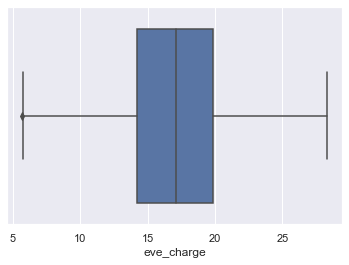

In [295]:
sns.boxplot(df.eve_charge)

In [296]:
#Applying IQR for 'eve_charge' feature again

In [297]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['eve_charge'], interpolation = 'midpoint') 

IQR

5.650000000000002

In [298]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['eve_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['eve_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [299]:
min_limit

5.724999999999996

In [300]:
df.loc[df['eve_charge'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
1362     49         63.0        510   329-7102          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
1362            0.0     132.9      122.0       22.59  ...       62.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
1362         5.7       160.4          121          7.22        9.9   

      intl_calls  intl_charge  custserv_calls  churn  
1362           2         2.67               3      0  

[1 rows x 21 columns]

In [301]:
#Performing imputation
df.loc[df['eve_charge'] < min_limit,'eve_charge']=np.median(df['eve_charge'])

In [302]:
df.loc[df['eve_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [303]:
max_limit

28.325000000000003

In [304]:
df.loc[df['eve_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='eve_charge'>

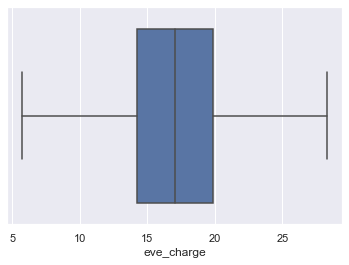

In [305]:
sns.boxplot(df.eve_charge)

In [306]:
##Outlier has been removed for "eve_charge" feature

### Checking Outlier For The Feature "night_mins"

<AxesSubplot:xlabel='night_mins', ylabel='Density'>

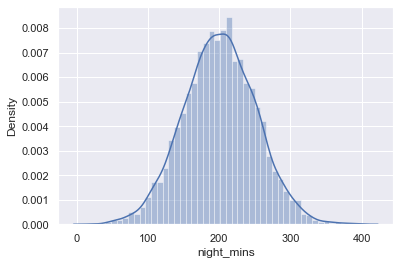

In [307]:
sns.distplot(df.night_mins)

<AxesSubplot:xlabel='night_mins'>

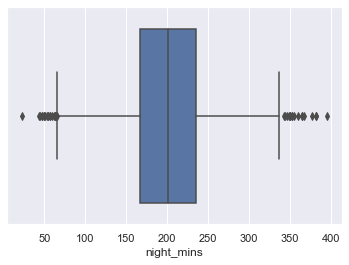

In [308]:
sns.boxplot(df.night_mins)

### Removing Outlier For "night_mins" Feature Using IQR

In [309]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_mins'], interpolation = 'midpoint') 

IQR

67.80000000000001

In [310]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [311]:
min_limit

65.39999999999998

In [312]:
df.loc[df['night_mins']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
116      31         64.0        510   391-4652          0           0   
883      50         42.0        408   357-7060          0           0   
992      22         45.0        510   375-8934          0           1   
999      27        165.0        415   330-6630          0           0   
1072     24        164.0        408   400-3497          0           1   
1113     12        152.0        415   387-6716          0           0   
1260      0         76.0        415   366-9781          0           1   
1313      6        100.0        415   389-2114          0           0   
2350     38        176.0        415   422-5264          0           0   
2382     45        123.0        408   386-7976          0           0   
2452     35        135.0        415   351-7807          0           0   
2756     16        123.0        415   378-2432          0           0   
3024     37        101.0        415   398-5851          0           0   
3159     28         27.0        415   405-1589          0           0   
3247     36        146.0        510   377-4975          0           0   
3659     29         23.0        415   391-5977          0           0   
3807      9        115.0        510   374-1456          0           0   
4222     19        133.0        415   412-4990          0           0   
4383      8        140.0        415   333-5541          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
116             0.0     162.6       83.0       27.64  ...      109.0   
883             0.0     146.3       84.0       24.87  ...      113.0   
992            26.0      91.7      104.0       15.59  ...      119.0   
999             0.0     207.7      109.0       35.31  ...       94.0   
1072           25.0     219.1       88.0       37.25  ...       99.0   
1113            0.0     206.3       98.0       35.07  ...       82.0   
1260           22.0     160.1      107.0       27.22  ...      136.0   
1313            0.0     235.8      130.0       40.09  ...       69.0   
2350            0.0     169.5      151.0       28.82  ...       84.0   
2382            0.0     154.3      107.0       26.23  ...      111.0   
2452            0.0     173.4      107.0       29.48  ...       84.0   
2756            0.0     140.0      106.0       23.80  ...      101.0   
3024            0.0     118.6       89.0       20.16  ...       97.0   
3159            0.0     227.4       67.0       38.66  ...      115.0   
3247            0.0     138.4      104.0       23.53  ...      122.0   
3659            0.0     155.6      122.0       26.45  ...       82.0   
3807            0.0     143.6      135.0       24.41  ...      119.0   
4222            0.0     207.1      106.0       35.21  ...      124.0   
4383            0.0     143.0      100.0       24.31  ...       89.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
116        12.95        57.5          122          2.59       14.2   
883        21.75        45.0          117          2.03        8.0   
992        12.80        63.3          103          2.85        7.7   
999        14.01        54.5           91          2.45        7.9   
1072       12.88        50.1           60          2.25       14.3   
1113       24.89        43.7          121          1.97       10.6   
1260       14.34        23.2          102          1.04        9.5   
1313       14.96        63.6          122          2.86        7.3   
2350        9.60        56.6           99          2.55        8.7   
2382       15.56        54.0          134          2.43       10.9   
2452       18.87        64.2           94          2.89       13.7   
2756       13.06        50.1           87          2.25       12.5   
3024       16.97        53.3           61          2.40       11.5   
3159       21.08        61.4          109          2.76        7.8   
3247       13.51        47.4           73          2.1

In [313]:
# Performing imputation
df.loc[df['night_mins'] < min_limit, 'night_mins'] = np.median(df['night_mins'])

In [314]:
df.loc[df['night_mins'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [315]:
max_limit

336.6

In [316]:
df.loc[df['night_mins'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
244      45        108.0        408   335-1697          0           0   
444      48         85.0        408   381-5878          1           0   
862       4         75.0        510   350-1422          0           1   
918      38         52.0        408   410-4739          0           0   
922      48         80.0        415   398-5006          0           0   
1202     24         86.0        415   385-3111          0           0   
1238     35        147.0        415   365-5682          1           1   
1317     29         89.0        415   420-6414          0           1   
1445     13         55.0        510   331-7342          0           1   
2321      2        153.0        408   339-3636          0           0   
2609     44        116.0        415   380-2929          0           1   
2663     45        172.0        510   408-2089          0           0   
2754     15         96.0        415   383-4641          0           1   
3060     18         94.0        415   371-3236          0           0   
3107     10         73.0        408   385-6952          0           0   
3376     41         98.0        415   398-6972          0           0   
3899     30        163.0        415   382-5328          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
244             0.0     198.5       99.0       33.75  ...       60.0   
444             0.0     165.4      107.0       28.12  ...      126.0   
862             0.0     163.6      132.0       27.81  ...      113.0   
918             0.0     215.9       67.0       36.70  ...      108.0   
922             0.0     239.9      121.0       40.78  ...       51.0   
1202            0.0      83.5       96.0       14.20  ...       63.0   
1238           24.0     219.9      118.0       37.38  ...      116.0   
1317           29.0     163.5       80.0       27.80  ...      136.0   
1445            8.0     222.5      104.0       37.83  ...       94.0   
2321            0.0     154.6       56.0       26.28  ...       84.0   
2609           24.0     232.9       90.0       39.59  ...       94.0   
2663            0.0     169.8      123.0       28.87  ...       94.0   
2754           23.0     183.1       88.0       31.13  ...       89.0   
3060            0.0     212.1       98.0       36.06  ...       89.0   
3107            0.0     157.6       92.0       26.79  ...       87.0   
3376            0.0     307.2       65.0       52.22  ...       97.0   
3899            0.0     268.1      104.0       45.58  ...       65.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
244        22.76       354.9           75         15.97        9.4   
444        16.66       349.2          110         15.71        9.6   
862        12.47       345.8          115         15.56       13.1   
918        18.45       342.8          130         15.43        5.2   
922        12.10       364.3          106         16.39        9.3   
1202       18.79       349.7           75         15.74       12.6   
1238       17.72       352.5          111         15.86        8.1   
1317       23.36       381.9          147         17.19        7.5   
1445       14.58       377.5          114         16.99        9.7   
2321       22.36       367.7           89         16.55       15.5   
2609       12.93       344.3           82         15.49       10.7   
2663       15.56       395.0           72         17.77       12.7   
2754       12.53       350.2          108         15.76       11.3   
3060       16.10       352.2           95         15.85        8.4   
3107       16.86       364.9          106         16.42        9.1   
3376       11.78       381.6           99         17.17       10.2   
3899       18.41       359.9          118         16.20       11.4   

      intl_calls  intl_charge  custserv_calls  churn  
244            3         2.54               0      1  
444            7       

In [317]:
# Performing imputation
df.loc[df['night_mins'] > max_limit, 'night_mins'] = np.median(df['night_mins'])

In [318]:
df.loc[df['night_mins'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_mins'>

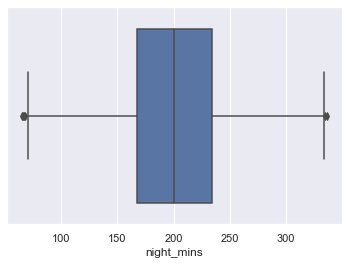

In [319]:
sns.boxplot(df.night_mins)

In [320]:
#Applying IQR again for 'night_mins' feature

In [321]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_mins'], interpolation = 'midpoint') 

IQR

66.5

In [322]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [323]:
min_limit

67.94999999999999

In [324]:
df.loc[df['night_mins'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
524      14         87.0        510   390-4152          0           0   
835      10         27.0        510   403-6850          0           0   
1512     24         22.0        408   374-1684          0           1   
3627     13         45.0        510   391-3499          1           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
524             0.0     231.3      105.0       39.32  ...      108.0   
835             0.0      72.7       75.0       12.36  ...      117.0   
1512           14.0     199.1      100.0       33.85  ...      103.0   
3627            0.0     179.0      114.0       30.43  ...       99.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
524        14.59        67.7          136          3.05       13.0   
835        17.73        65.8           71          2.96        9.9   
1512       18.85        65.7           91          2.96        4.2   
3627       23.17        67.1           80          3.02       10.8   

      intl_calls  intl_charge  custserv_calls  churn  
524            6         3.51               1      0  
835            3         2.67               1      0  
1512           1         1.13               1      0  
3627           3         2.92               3      0  

[4 rows x 21 columns]

In [325]:
# Performing imputation
df.loc[df['night_mins'] < min_limit, 'night_mins'] = np.median(df['night_mins'])

In [326]:
df.loc[df['night_mins'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [327]:
max_limit

333.95

In [328]:
df.loc[df['night_mins'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2869     30        105.0        415   381-4076          0           1   
4229     15         91.0        510   336-2510          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2869           20.0     186.9      114.0       31.77  ...       91.0   
4229            0.0     103.2      100.0       17.54  ...      101.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2869       21.79       334.7          104         15.06        8.9   
4229       10.61       336.1          111         15.12       14.0   

      intl_calls  intl_charge  custserv_calls  churn  
2869           2         2.40               1      0  
4229           4         3.78               2      1  

[2 rows x 21 columns]

In [329]:
# Performing imputation
df.loc[df['night_mins'] > max_limit, 'night_mins'] = np.median(df['night_mins'])

In [330]:
df.loc[df['night_mins'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_mins'>

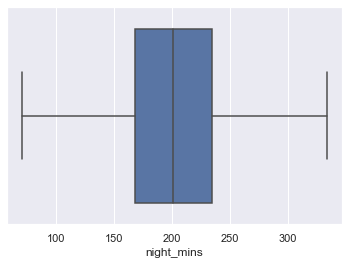

In [331]:
sns.boxplot(df.night_mins)

In [332]:
##Outlier has been removed from "night_mins" feature

### Checking Outlier For The Feature "night_calls"

<AxesSubplot:xlabel='night_calls', ylabel='Density'>

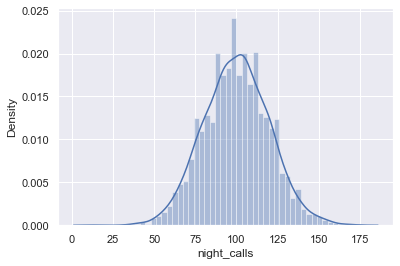

In [333]:
sns.distplot(df.night_calls)

<AxesSubplot:xlabel='night_calls'>

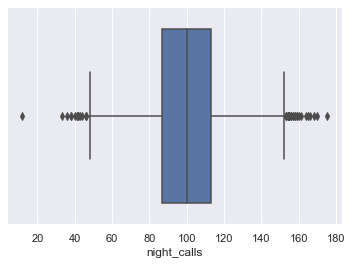

In [334]:
sns.boxplot(df.night_calls)

### Removing Outlier For "night_calls" Feature Using IQR

In [335]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_calls'], interpolation = 'midpoint') 

IQR

26.0

In [336]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [337]:
min_limit

48.0

In [338]:
df.loc[df['night_calls']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
315      19         39.0        408   332-2462          0           0   
326       1        121.0        408   331-8909          0           1   
335      17        151.0        408   396-8265          0           1   
395      42         98.0        415   376-9249          0           1   
2659     36         15.0        415   408-2002          0           0   
2903      8         97.0        415   390-5267          0           1   
2988     45        105.0        415   344-3145          0           0   
3535     33         83.0        510   398-2585          0           1   
4079     31        119.0        408   350-5622          0           0   
4085     49        159.0        415   343-3973          0           0   
4207     10         70.0        415   361-3491          0           1   
4244     19         61.0        415   398-3490          0           1   
4386     36         88.0        408   370-6858          1           0   
4410     19         86.0        408   392-4995          0           0   
4489     12        157.0        415   354-7711          0           0   
4549     31         94.0        415   419-2228          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
315             0.0      60.4      100.0       10.27  ...      120.0   
326            35.0      68.7       95.0       11.68  ...       69.0   
335            17.0     214.7       97.0       36.50  ...       90.0   
395            22.0     278.3       89.0       47.31  ...      143.0   
2659            0.0     121.1      130.0       20.59  ...       86.0   
2903           32.0     183.4       94.0       31.18  ...      120.0   
2988            0.0     259.3       96.0       44.08  ...       97.0   
3535           31.0     129.8       87.0       22.07  ...      110.0   
4079            0.0     287.1       83.0       48.81  ...      124.0   
4085            0.0     181.0      107.0       30.77  ...      114.0   
4207           20.0     230.2      110.0       39.13  ...      111.0   
4244           28.0     239.9      110.0       40.78  ...       87.0   
4386            0.0     132.9      132.0       22.59  ...       82.0   
4410            0.0     118.6      106.0       20.16  ...      115.0   
4489            0.0     248.7      113.0       42.28  ...       79.0   
4549            0.0     145.4       92.0       24.72  ...      103.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
315        26.03       123.9           46          5.58       12.4   
326        17.78       197.4           42          8.88       11.4   
335        11.77       169.1           44          7.61        8.6   
395         7.94       107.6           42          4.84        9.7   
2659       18.36       235.1           33         10.58       16.1   
2903       22.87       203.5           38          9.16        6.7   
2988       14.89       222.4           36         10.01       12.0   
3535       15.59       169.4           40          7.62       14.3   
4079       18.56       151.5           42          6.82       11.0   
4085       16.01       175.8           41          7.91        9.9   
4207       15.09       206.3           38          9.28       11.9   
4244       18.61       166.0           46          7.47       12.1   
4386       17.70       260.5           42         11.72       14.4   
4410       19.00        94.7           12          4.26       13.3   
4489       21.40       262.7           46         11.82        7.5   
4549       14.69       183.9           43          8.28        9.3   

      intl_calls  intl_charge  custserv_calls  churn  
315            3         3.35               1      0  
326            4         3.08               1      0  
335            4         2.32               1      0  
395            5         2.62               0      0  
2659           5         4.35               2      0  
2903           4  

In [339]:
# Peforming imputation
df.loc[df['night_calls'] < min_limit,'night_calls'] = np.median(df['night_calls'])

In [340]:
df.loc[df['night_calls'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [341]:
max_limit

152.0

In [342]:
df.loc[df['night_calls'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
429      37         49.0        510   376-4519          0           0   
493      39        129.0        415   366-7360          0           1   
586      43         90.0        408   355-7293          1           0   
901       6         23.0        510   370-5527          0           0   
1109     13        118.0        415   335-3320          0           0   
1200     46        100.0        415   382-6135          0           1   
1296     21         79.0        415   415-6578          0           0   
1748     26         71.0        510   363-1366          0           1   
1810     17        124.0        415   341-3349          0           0   
2288     29         34.0        415   361-6814          0           0   
2728     22         86.0        408   369-6308          0           0   
2736     36        127.0        510   403-1128          0           1   
3172     50         41.0        510   381-2413          0           0   
3211     13        103.0        415   391-7528          0           0   
3234      8         75.0        510   419-9509          0           1   
3560     46        149.0        415   338-2617          0           0   
3570      7        138.0        415   350-9230          0           0   
3767     11         80.0        510   421-6766          0           0   
3799     42         61.0        415   358-3314          0           1   
3895     19        101.0        408   372-5924          0           0   
3921      0        104.0        415   362-7200          0           0   
4069     25        135.0        510   371-3276          0           0   
4152     49         99.0        408   360-8926          0           1   
4343      6         73.0        510   418-7248          0           0   
4508     46        115.0        415   378-8317          0           0   
4568     31        124.0        415   338-5344          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
429             0.0     119.4       69.0       20.30  ...       92.0   
493            33.0     119.6      104.0       20.33  ...       88.0   
586             0.0     221.8       97.0       37.71  ...      134.0   
901             0.0     321.6      107.0       54.67  ...      115.0   
1109            0.0     140.4      112.0       23.87  ...       60.0   
1200           25.0     215.9       90.0       36.70  ...       92.0   
1296            0.0     213.6      110.0       36.31  ...      121.0   
1748           23.0     175.7       82.0       29.87  ...      136.0   
1810            0.0     194.0      103.0       32.98  ...      116.0   
2288            0.0     193.7       74.0       32.93  ...       84.0   
2728            0.0     148.2       71.0       25.19  ...       91.0   
2736           27.0     180.0      113.0       30.60  ...      102.0   
3172            0.0     223.8       67.0       38.05  ...       74.0   
3211            0.0      70.9      134.0       12.05  ...      112.0   
3234           28.0     200.6       96.0       34.10  ...      111.0   
3560            0.0     194.9      108.0       33.13  ...      102.0   
3570            0.0     149.7       99.0       25.45  ...       97.0   
3767            0.0     157.1       77.0       26.71  ...       69.0   
3799            0.0     139.8      108.0       23.77  ...      120.0   
3895            0.0     189.0      122.0       32.13  ...       91.0   
3921            0.0     174.1       97.0       29.60  ...      104.0   
4069            0.0     204.1      116.0       34.70  ...       74.0   
4152           12.0     119.9       83.0       20.38  ...       98.0   
4343            0.0     159.0      123.0       27.03  ...       95.0   
4508            0.0     202.1       95.0       34.36  ...       89.0   
4568            0.0     108.2       92.0       18.39  ...       83.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
429        23.23   

In [343]:
# Peforming imputation
df.loc[df['night_calls'] > max_limit,'night_calls'] = np.median(df['night_calls'])

In [344]:
df.loc[df['night_calls'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_calls'>

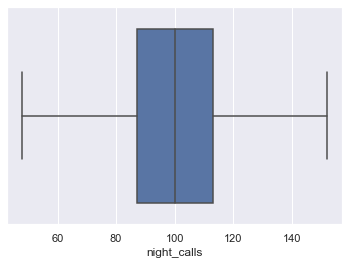

In [345]:
sns.boxplot(df.night_calls)

In [346]:
##Outlier has been removed for "night_calls" feature

### Checking Outlier For The Feature "night_charge"

<AxesSubplot:xlabel='night_charge', ylabel='Density'>

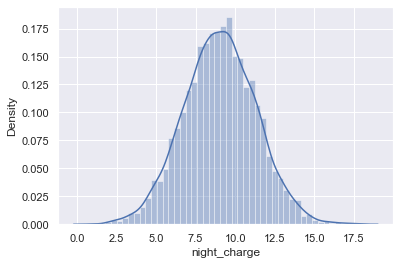

In [347]:
sns.distplot(df.night_charge)

<AxesSubplot:xlabel='night_charge'>

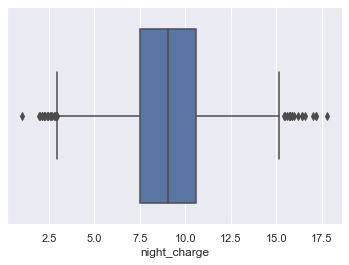

In [348]:
sns.boxplot(df.night_charge)

### Removing Outlier For "night_charge" Feature Using IQR

In [349]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_charge'], interpolation = 'midpoint') 

IQR

3.0500000000000007

In [350]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [351]:
min_limit

2.9449999999999985

In [352]:
df.loc[df['night_charge']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
116      31         64.0        510   391-4652          0           0   
883      50         42.0        408   357-7060          0           0   
992      22         45.0        510   375-8934          0           1   
999      27        165.0        415   330-6630          0           0   
1072     24        164.0        408   400-3497          0           1   
1113     12        152.0        415   387-6716          0           0   
1260      0         76.0        415   366-9781          0           1   
1313      6        100.0        415   389-2114          0           0   
2350     38        176.0        415   422-5264          0           0   
2382     45        123.0        408   386-7976          0           0   
2452     35        135.0        415   351-7807          0           0   
2756     16        123.0        415   378-2432          0           0   
3024     37        101.0        415   398-5851          0           0   
3159     28         27.0        415   405-1589          0           0   
3247     36        146.0        510   377-4975          0           0   
3659     29         23.0        415   391-5977          0           0   
3807      9        115.0        510   374-1456          0           0   
4222     19        133.0        415   412-4990          0           0   
4383      8        140.0        415   333-5541          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
116             0.0     162.6       83.0       27.64  ...      109.0   
883             0.0     146.3       84.0       24.87  ...      113.0   
992            26.0      91.7      104.0       15.59  ...      119.0   
999             0.0     207.7      109.0       35.31  ...       94.0   
1072           25.0     219.1       88.0       37.25  ...       99.0   
1113            0.0     206.3       98.0       35.07  ...       82.0   
1260           22.0     160.1      107.0       27.22  ...      136.0   
1313            0.0     235.8      130.0       40.09  ...       69.0   
2350            0.0     169.5      151.0       28.82  ...       84.0   
2382            0.0     154.3      107.0       26.23  ...      111.0   
2452            0.0     173.4      107.0       29.48  ...       84.0   
2756            0.0     140.0      106.0       23.80  ...      101.0   
3024            0.0     118.6       89.0       20.16  ...       97.0   
3159            0.0     227.4       67.0       38.66  ...      115.0   
3247            0.0     138.4      104.0       23.53  ...      122.0   
3659            0.0     155.6      122.0       26.45  ...       82.0   
3807            0.0     143.6      135.0       24.41  ...      119.0   
4222            0.0     207.1      106.0       35.21  ...      124.0   
4383            0.0     143.0      100.0       24.31  ...       89.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
116        12.95       200.8        122.0          2.59       14.2   
883        21.75       200.8        117.0          2.03        8.0   
992        12.80       200.8        103.0          2.85        7.7   
999        14.01       200.8         91.0          2.45        7.9   
1072       12.88       200.8         60.0          2.25       14.3   
1113       24.89       200.8        121.0          1.97       10.6   
1260       14.34       200.8        102.0          1.04        9.5   
1313       14.96       200.8        122.0          2.86        7.3   
2350        9.60       200.8         99.0          2.55        8.7   
2382       15.56       200.8        134.0          2.43       10.9   
2452       18.87       200.8         94.0          2.89       13.7   
2756       13.06       200.8         87.0          2.25       12.5   
3024       16.97       200.8         61.0          2.40       11.5   
3159       21.08       200.8        109.0          2.76        7.8   
3247       13.51       200.8         73.0          2.1

In [353]:
# Performing imputation
df.loc[df['night_charge'] < min_limit, 'night_charge']=np.median(df['night_charge'])

In [354]:
df.loc[df['night_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [355]:
max_limit

15.145000000000001

In [356]:
df.loc[df['night_charge']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
244      45        108.0        408   335-1697          0           0   
444      48         85.0        408   381-5878          1           0   
862       4         75.0        510   350-1422          0           1   
918      38         52.0        408   410-4739          0           0   
922      48         80.0        415   398-5006          0           0   
1202     24         86.0        415   385-3111          0           0   
1238     35        147.0        415   365-5682          1           1   
1317     29         89.0        415   420-6414          0           1   
1445     13         55.0        510   331-7342          0           1   
2321      2        153.0        408   339-3636          0           0   
2609     44        116.0        415   380-2929          0           1   
2663     45        172.0        510   408-2089          0           0   
2754     15         96.0        415   383-4641          0           1   
3060     18         94.0        415   371-3236          0           0   
3107     10         73.0        408   385-6952          0           0   
3376     41         98.0        415   398-6972          0           0   
3899     30        163.0        415   382-5328          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
244             0.0     198.5       99.0       33.75  ...       60.0   
444             0.0     165.4      107.0       28.12  ...      126.0   
862             0.0     163.6      132.0       27.81  ...      113.0   
918             0.0     215.9       67.0       36.70  ...      108.0   
922             0.0     239.9      121.0       40.78  ...       51.0   
1202            0.0      83.5       96.0       14.20  ...       63.0   
1238           24.0     219.9      118.0       37.38  ...      116.0   
1317           29.0     163.5       80.0       27.80  ...      136.0   
1445            8.0     222.5      104.0       37.83  ...       94.0   
2321            0.0     154.6       56.0       26.28  ...       84.0   
2609           24.0     232.9       90.0       39.59  ...       94.0   
2663            0.0     169.8      123.0       28.87  ...       94.0   
2754           23.0     183.1       88.0       31.13  ...       89.0   
3060            0.0     212.1       98.0       36.06  ...       89.0   
3107            0.0     157.6       92.0       26.79  ...       87.0   
3376            0.0     307.2       65.0       52.22  ...       97.0   
3899            0.0     268.1      104.0       45.58  ...       65.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
244        22.76       200.8         75.0         15.97        9.4   
444        16.66       200.8        110.0         15.71        9.6   
862        12.47       200.8        115.0         15.56       13.1   
918        18.45       200.8        130.0         15.43        5.2   
922        12.10       200.8        106.0         16.39        9.3   
1202       18.79       200.8         75.0         15.74       12.6   
1238       17.72       200.8        111.0         15.86        8.1   
1317       23.36       200.8        147.0         17.19        7.5   
1445       14.58       200.8        114.0         16.99        9.7   
2321       22.36       200.8         89.0         16.55       15.5   
2609       12.93       200.8         82.0         15.49       10.7   
2663       15.56       200.8         72.0         17.77       12.7   
2754       12.53       200.8        108.0         15.76       11.3   
3060       16.10       200.8         95.0         15.85        8.4   
3107       16.86       200.8        106.0         16.42        9.1   
3376       11.78       200.8         99.0         17.17       10.2   
3899       18.41       200.8        118.0         16.20       11.4   

      intl_calls  intl_charge  custserv_calls  churn  
244            3         2.54               0      1  
444            7       

In [357]:
# Performing imputation
df.loc[df['night_charge'] > max_limit, 'night_charge']=np.median(df['night_charge'])

In [358]:
df.loc[df['night_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_charge'>

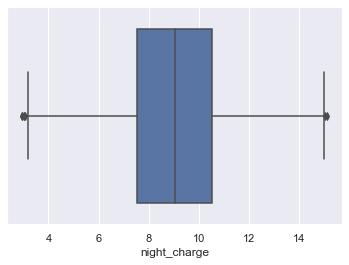

In [359]:
sns.boxplot(df.night_charge)

In [360]:
#Applying IQR again for 'night-charge' feature

In [361]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_charge'], interpolation = 'midpoint') 

IQR

2.9899999999999993

In [362]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [363]:
min_limit

3.0650000000000004

In [364]:
df.loc[df['night_charge'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
524      14         87.0        510   390-4152          0           0   
835      10         27.0        510   403-6850          0           0   
1512     24         22.0        408   374-1684          0           1   
3627     13         45.0        510   391-3499          1           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
524             0.0     231.3      105.0       39.32  ...      108.0   
835             0.0      72.7       75.0       12.36  ...      117.0   
1512           14.0     199.1      100.0       33.85  ...      103.0   
3627            0.0     179.0      114.0       30.43  ...       99.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
524        14.59       200.8        136.0          3.05       13.0   
835        17.73       200.8         71.0          2.96        9.9   
1512       18.85       200.8         91.0          2.96        4.2   
3627       23.17       200.8         80.0          3.02       10.8   

      intl_calls  intl_charge  custserv_calls  churn  
524            6         3.51               1      0  
835            3         2.67               1      0  
1512           1         1.13               1      0  
3627           3         2.92               3      0  

[4 rows x 21 columns]

In [365]:
# Performing imputation
df.loc[df['night_charge'] < min_limit, 'night_charge']=np.median(df['night_charge'])

In [366]:
df.loc[df['night_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [367]:
max_limit

15.024999999999999

In [368]:
df.loc[df['night_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2869     30        105.0        415   381-4076          0           1   
4229     15         91.0        510   336-2510          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2869           20.0     186.9      114.0       31.77  ...       91.0   
4229            0.0     103.2      100.0       17.54  ...      101.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2869       21.79       200.8        104.0         15.06        8.9   
4229       10.61       200.8        111.0         15.12       14.0   

      intl_calls  intl_charge  custserv_calls  churn  
2869           2         2.40               1      0  
4229           4         3.78               2      1  

[2 rows x 21 columns]

In [369]:
# Performing imputation
df.loc[df['night_charge'] > max_limit, 'night_charge']=np.median(df['night_charge'])

In [370]:
df.loc[df['night_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_charge'>

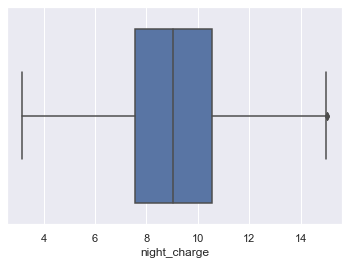

In [371]:
sns.boxplot(df.night_charge)

In [372]:
# Applying IQR again on 'night_charge' feature

In [373]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_charge'], interpolation = 'midpoint') 

IQR

2.9799999999999995

In [374]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [375]:
min_limit

3.080000000000001

In [376]:
df.loc[df['night_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [377]:
max_limit

14.999999999999998

In [378]:
df.loc[df['night_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
1375     46         84.0        415   403-5552          0           1   
3360     13         72.0        415   413-5754          1           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
1375            0.0     214.3      112.0       36.43  ...      107.0   
3360            0.0     101.0      110.0       17.17  ...       70.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
1375        16.0       333.5        117.0         15.01       11.3   
3360        20.4       333.5        105.0         15.01       11.1   

      intl_calls  intl_charge  custserv_calls  churn  
1375          10         3.05               0      0  
3360           6         3.00               0      0  

[2 rows x 21 columns]

In [379]:
# Performing imputation
df.loc[df['night_charge'] > max_limit, 'night_charge']=np.median(df['night_charge'])

In [380]:
df.loc[df['night_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_charge'>

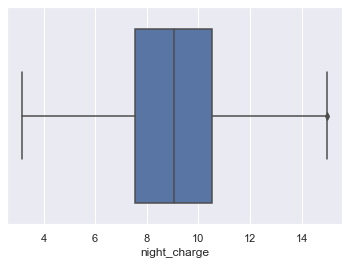

In [381]:
sns.boxplot(df.night_charge)

In [382]:
#Applying IQR on 'night_charge' feature again

In [383]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['night_charge'], interpolation = 'midpoint') 

IQR

2.9699999999999998

In [384]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['night_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['night_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [385]:
min_limit

3.0949999999999998

In [386]:
df.loc[df['night_charge'] < min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [387]:
max_limit

14.975

In [388]:
df.loc[df['night_charge'] > max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
3871     39        121.0        415   350-6534          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
3871           22.0     212.3      107.0       36.09  ...       94.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
3871       20.23       332.8        114.0         14.98       10.4   

      intl_calls  intl_charge  custserv_calls  churn  
3871           2         2.81               1      0  

[1 rows x 21 columns]

In [389]:
# Performing imputation
df.loc[df['night_charge'] > max_limit, 'night_charge']=np.median(df['night_charge'])

In [390]:
df.loc[df['night_charge'] > max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='night_charge'>

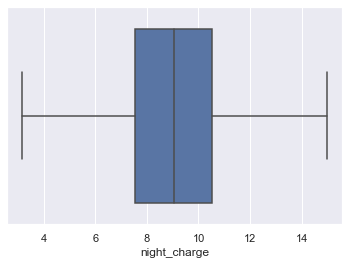

In [391]:
sns.boxplot(df.night_charge)

In [392]:
##Outlier has been removed for "night_charge" feature

### Checking Outlier For The Feature "intl_mins"

<AxesSubplot:xlabel='intl_mins', ylabel='Density'>

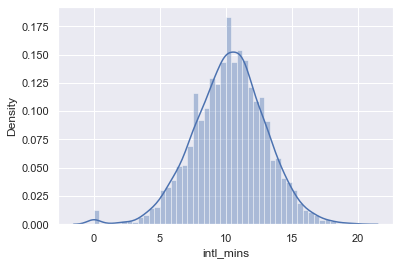

In [393]:
sns.distplot(df.intl_mins)

<AxesSubplot:xlabel='intl_mins'>

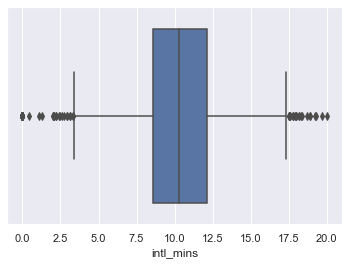

In [394]:
sns.boxplot(df.intl_mins)

### Removing Outlier For "intl_mins" Feature Using IQR

In [395]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_mins'], interpolation = 'midpoint') 

IQR

3.5

In [396]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [397]:
min_limit

3.3499999999999996

In [398]:
df.loc[df['intl_mins'] < min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
179      16         70.0        408   411-4582          0           0   
225      15         65.0        415   388-9568          0           0   
343      15         98.0        408   376-4300          0           1   
397      37         94.0        415   328-6011          0           0   
488      46        165.0        510   345-1998          0           0   
595      11         87.0        408   360-2690          0           1   
712      24        106.0        415   340-9910          0           0   
762      50        161.0        415   406-1349          1           0   
878      48         62.0        415   383-6373          0           0   
1028     16         70.0        415   369-9465          0           0   
1080     35        114.0        415   363-2602          0           0   
1099     11        157.0        415   333-7961          0           0   
1400     45        115.0        415   367-3971          0           0   
1564     46        137.0        510   348-9145          0           0   
1966     29         77.0        415   350-1532          0           0   
2180      1        121.0        415   414-6541          0           0   
2197     18        133.0        415   360-7079          0           0   
2198      9        127.0        415   344-9302          0           0   
2256     50         94.0        408   344-4022          0           0   
2345      9         98.0        408   416-7452          0           0   
2362     28        101.0        415   395-1380          0           0   
2513     34         86.0        510   387-2041          0           0   
2669     49        145.0        415   383-3375          0           0   
2679     50        145.0        408   405-6559          0           0   
2733     32        158.0        408   377-2725          0           0   
2906      4         87.0        415   383-4802          0           1   
2918     19         58.0        408   411-6598          0           0   
2933     14         98.0        510   351-3316          1           0   
3022     18        123.0        415   382-7659          0           1   
3160     30        123.0        408   366-7560          0           0   
3216     41        100.0        510   365-2192          0           1   
3234      8         75.0        510   419-9509          0           1   
3275     34        120.0        510   405-5083          0           1   
3290      4        127.0        510   388-4331          0           0   
3403     40         84.0        415   364-1173          0           0   
3663     25         78.0        510   373-6093          0           0   
3788     22        142.0        408   398-6401          0           0   
3891     44        180.0        510   380-6612          0           0   
4103     38         59.0        510   349-3579          0           0   
4371     34        138.0        415   411-2289          1           0   
4451     23         44.0        408   375-8931          0           0   
4504      1        123.0        415   406-8380          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
179             0.0     232.1      122.0       39.46  ...      112.0   
225             0.0     213.4      111.0       36.28  ...       94.0   
343            21.0      64.6       98.0       10.98  ...       86.0   
397             0.0     234.4      103.0       39.85  ...      109.0   
488             0.0     242.9      126.0       41.29  ...       65.0   
595            28.0     151.4       95.0       25.74  ...       97.0   
712             0.0     114.4      104.0       19.45  ...      101.0   
762             0.0     189.6       78.0       32.23  ...      117.0   
878             0.0     281.0       66.0       47.77  ...      108.0   
1028            0.0     222.8      114.0       37.88  ...      113.0   
1080            0.0     191.5       88.0       32.56  ...       78.0   
10

In [399]:
#Performing imputation
df.loc[df['intl_mins']<min_limit, 'intl_mins']=np.median(df['intl_mins'])

In [400]:
df.loc[df['intl_mins']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [401]:
max_limit

17.35

In [402]:
df.loc[df['intl_mins']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
115      21         36.0        510   363-1069          1           1   
214       9         70.0        510   366-6345          1           0   
314      13        128.0        408   359-5890          0           0   
367      20         45.0        415   350-1040          0           0   
502      22         93.0        415   366-7247          1           0   
515      13        148.0        510   421-1469          0           1   
535      29        194.0        408   408-3532          0           0   
1257     44         73.0        415   394-9934          0           0   
1420     22         81.0        415   393-6840          1           0   
1816     37         53.0        415   386-1418          0           0   
2004      4         77.0        510   335-2261          0           0   
2229     35         83.0        415   376-5375          0           1   
2371     14        100.0        415   420-6121          0           0   
2534      5         81.0        408   372-9091          0           0   
2816     13        130.0        415   358-3692          0           0   
3080     22         82.0        415   415-8200          0           0   
3307     36        172.0        408   398-3632          0           0   
3400      1        132.0        415   412-1338          0           0   
3568     16         48.0        408   383-4357          0           1   
3906     16        104.0        408   395-1632          0           0   
3916      6         68.0        510   373-8655          1           0   
4396     17         55.0        415   368-8579          0           1   
4574     40        137.0        510   368-4510          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
115             0.0     196.8       89.0       33.46  ...      122.0   
214             0.0     226.7       98.0       38.54  ...      115.0   
314             0.0     125.2       99.0       21.28  ...      107.0   
367             0.0      78.2      127.0       13.29  ...      108.0   
502             0.0     216.9       61.0       36.87  ...      120.0   
515            14.0      93.6      137.0       15.91  ...       72.0   
535             0.0      48.4      101.0        8.23  ...      138.0   
1257            0.0     182.3      115.0       30.99  ...       97.0   
1420            0.0     149.4       68.0       25.40  ...       98.0   
1816            0.0     184.8       98.0       31.42  ...      125.0   
2004            0.0     175.5       86.0       29.84  ...       78.0   
2229           25.0     191.3       95.0       32.52  ...      136.0   
2371            0.0     191.9       95.0       32.62  ...      101.0   
2534            0.0     115.3       99.0       19.60  ...      117.0   
2816            0.0     263.7      113.0       44.83  ...      103.0   
3080            0.0     135.4      102.0       23.02  ...      122.0   
3307            0.0     203.9      109.0       34.66  ...      123.0   
3400            0.0     200.0      104.0       34.00  ...      101.0   
3568           26.0     192.9       60.0       32.79  ...       87.0   
3906            0.0     191.8      105.0       32.61  ...       96.0   
3916            0.0     197.7       99.0       33.61  ...      106.0   
4396            0.0     197.5       89.0       33.58  ...      141.0   
4574            0.0     109.8      112.0       18.67  ...       88.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
115        21.67       138.3        126.0          6.22       20.0   
214        19.39        73.2         93.0          3.29       17.6   
314        17.46       254.4        111.0         11.45       18.9   
367        21.54       255.0        100.0         11.48       18.0   
502        17.63       221.7        110.0          9.98       17.5   
515        16.47       144.9         84.0          6.52       17.5   
535        23.89       218.5      

In [403]:
#Performing imputation
df.loc[df['intl_mins']>max_limit, 'intl_mins']=np.median(df['intl_mins'])

In [404]:
df.loc[df['intl_mins']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_mins'>

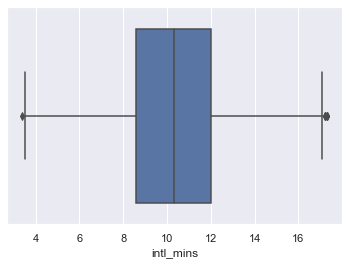

In [405]:
sns.boxplot(df.intl_mins)

In [406]:
#Applying IQR on 'intl_mins' feature again

In [407]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_mins'], interpolation = 'midpoint') 

IQR

3.4000000000000004

In [408]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_mins'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_mins'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [409]:
min_limit

3.499999999999999

In [410]:
df.loc[df['intl_mins']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2351     43        152.0        415   422-1799          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2351            0.0     141.5      102.0       24.06  ...       94.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2351       22.36       207.1        113.0          9.32        3.4   

      intl_calls  intl_charge  custserv_calls  churn  
2351           4         0.92               2      0  

[1 rows x 21 columns]

In [411]:
#Performing imputation
df.loc[df['intl_mins']<min_limit, 'intl_mins']=np.median(df['intl_mins'])

In [412]:
df.loc[df['intl_mins']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [413]:
max_limit

17.1

In [414]:
df.loc[df['intl_mins']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
469       1         41.0        510   369-6880          0           1   
1570     29        112.0        415   388-4282          0           0   
1651      6         64.0        415   406-9926          1           0   
2238     29         61.0        408   420-8897          0           0   
3852     49        136.0        510   402-8558          0           0   
4486     32        143.0        415   374-8632          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
469            34.0     194.4       63.0       33.05  ...      110.0   
1570            0.0     167.6      100.0       28.49  ...       90.0   
1651            0.0     225.3      134.0       38.30  ...       87.0   
2238            0.0     267.1      104.0       45.41  ...      131.0   
3852            0.0     240.1      121.0       40.82  ...      123.0   
4486            0.0     271.7       67.0       46.19  ...      101.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
469        21.67       160.2        115.0          7.21       17.2   
1570       13.13       281.4        107.0         12.66       17.3   
1651        9.20       139.6        132.0          6.28       17.3   
2238       15.33       230.6        106.0         10.38       17.3   
3852       23.05       132.7         98.0          5.97       17.2   
4486       16.07       101.1         55.0          4.55       17.2   

      intl_calls  intl_charge  custserv_calls  churn  
469            9         4.64               2      0  
1570           3         4.67               2      0  
1651           9         4.67               1      1  
2238           4         4.67               1      1  
3852           4         4.64               0      1  
4486           5         4.64               1      0  

[6 rows x 21 columns]

In [415]:
#Performing imputation
df.loc[df['intl_mins']>max_limit, 'intl_mins']=np.median(df['intl_mins'])

In [416]:
df.loc[df['intl_mins']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_mins'>

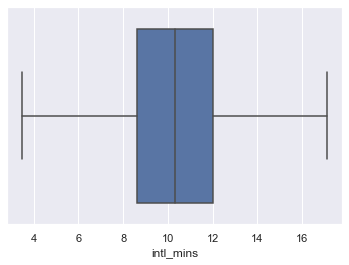

In [417]:
sns.boxplot(df.intl_mins)

In [418]:
##Outlier has been removed for "intl_mins" feature

### Checking Outlier For The Feature "intl_calls"

<AxesSubplot:xlabel='intl_calls', ylabel='Density'>

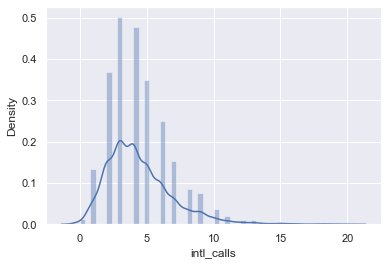

In [419]:
sns.distplot(df.intl_calls)

<AxesSubplot:xlabel='intl_calls'>

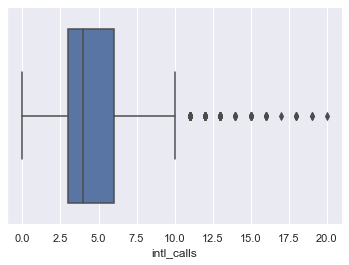

In [420]:
sns.boxplot(df.intl_calls)

### Removing Outlier For "intl_calls" Feature Using IQR

In [421]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_calls'], interpolation = 'midpoint') 

IQR

3.0

In [422]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [423]:
min_limit

-1.5

In [424]:
df.loc[df['intl_calls']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [425]:
max_limit

10.5

In [426]:
df.loc[df['intl_calls']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
22        3        130.0        415   358-1958          0           0   
41       20        135.0        408   383-6029          1           1   
153      39         56.0        415   383-6293          0           0   
182      34         67.0        408   405-2888          0           1   
185      32         73.0        415   333-3221          0           0   
...     ...          ...        ...        ...        ...         ...   
4386     36         88.0        408   370-6858          1           0   
4408     47         65.0        415   351-4517          0           0   
4465     20        116.0        408   342-7953          0           0   
4478      0        109.0        415   372-8261          0           1   
4568     31        124.0        415   338-5344          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
22              0.0     183.0      112.0       31.11  ...       99.0   
41              0.0     173.1       85.0       29.43  ...      107.0   
153             0.0     226.0      112.0       38.42  ...      118.0   
182             0.0     115.6      111.0       19.65  ...       94.0   
185             0.0     214.3      145.0       36.43  ...      135.0   
...             ...       ...        ...         ...  ...        ...   
4386            0.0     132.9      132.0       22.59  ...       82.0   
4408            0.0     189.3       74.0       32.18  ...       90.0   
4465            0.0     254.6      107.0       43.28  ...       89.0   
4478            0.0     155.9      110.0       26.50  ...       99.0   
4568            0.0     108.2       92.0       18.39  ...       83.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
22          6.20       181.8         78.0          8.18        9.5   
41         17.33       122.2         78.0          5.50       14.6   
153        21.12       140.5        142.0          6.32        6.9   
182        20.20       169.9        103.0          7.65        9.9   
185        22.82       241.2         92.0         10.85       10.8   
...          ...         ...          ...           ...        ...   
4386       17.70       260.5        100.0         11.72       14.4   
4408       17.45       228.2         78.0         10.27        8.5   
4465       21.20       229.6         77.0         10.33        9.0   
4478       13.70       229.2         81.0         10.31       11.5   
4568       18.22       185.5        100.0          8.35       13.2   

      intl_calls  intl_charge  custserv_calls  churn  
22            19         2.57               0      0  
41            15         3.94               0      1  
153           11         1.86               1      0  
182           12         2.67               2      0  
185           13         2.92               1      0  
...          ...          ...             ...    ...  
4386          11         3.89               2      1  
4408          13         2.30               3      0  
4465          18         2.43               2      1  
4478          13         3.11               0      0  
4568          11         3.56               4      1  

[107 rows x 21 columns]

In [427]:
#Performing imputation
df.loc[df['intl_calls']>max_limit, 'intl_calls']=np.median(df['intl_calls'])

In [428]:
df.loc[df['intl_calls']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_calls'>

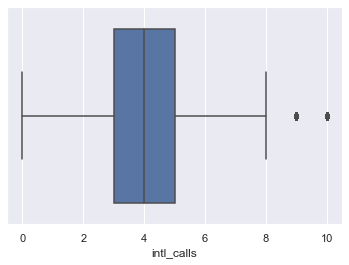

In [429]:
sns.boxplot(df.intl_calls)

In [430]:
#Applying IQR on 'intl_calls' feature again

In [431]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_calls'], interpolation = 'midpoint') 

IQR

2.0

In [432]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [433]:
min_limit

0.0

In [434]:
df.loc[df['intl_calls']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [435]:
max_limit

8.0

In [436]:
df.loc[df['intl_calls']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
15       34        161.0        415   351-7269          0           0   
32       18        172.0        408   383-1121          0           0   
39       31        149.0        408   332-9891          0           0   
88       17         74.0        415   346-7302          0           1   
92        2         80.0        415   340-4953          0           0   
...     ...          ...        ...        ...        ...         ...   
4495     46         93.0        415   338-2813          0           1   
4496     37        103.0        408   412-4971          0           0   
4539     49        167.0        510   413-2121          0           0   
4604      3        193.0        415   408-8885          0           0   
4611     11         90.0        408   342-3593          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
15              0.0     180.0       67.0       30.60  ...       97.0   
32              0.0     212.0      121.0       36.04  ...      115.0   
39              0.0     140.4       94.0       23.87  ...       92.0   
88             35.0     154.1      104.0       26.20  ...       84.0   
92              0.0     124.3      100.0       21.13  ...      107.0   
...             ...       ...        ...         ...  ...        ...   
4495            0.0     230.4       95.0       39.17  ...       89.0   
4496            0.0     185.8      118.0       31.59  ...       84.0   
4539            0.0     191.5       93.0       32.56  ...       76.0   
4604            0.0     208.1      115.0       35.38  ...      104.0   
4611            0.0     193.8       90.0       32.95  ...       98.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
15         27.01       160.6        128.0          7.23        5.4   
32         17.07       293.3         78.0         13.20       12.6   
39         23.10       188.3        108.0          8.47       11.1   
88         10.49       202.1         57.0          9.09       10.9   
92         14.71       253.2         62.0         11.39        7.9   
...          ...         ...          ...           ...        ...   
4495       13.22       179.0         90.0          8.06       10.4   
4496        7.38       208.4        115.0          9.38       10.7   
4539       13.92       189.1        103.0          8.51       14.1   
4604       15.13       195.9         95.0          8.82       12.4   
4611       17.56       153.3        120.0          6.90       10.1   

      intl_calls  intl_charge  custserv_calls  churn  
15           9.0         1.46               4      1  
32          10.0         3.40               3      0  
39           9.0         3.00               1      0  
88           9.0         2.94               2      0  
92           9.0         2.13               1      0  
...          ...          ...             ...    ...  
4495         9.0         2.81               3      0  
4496         9.0         2.89               1      0  
4539         9.0         3.81               1      0  
4604         9.0         3.35               3      0  
4611         9.0         2.73               3      0  

[211 rows x 21 columns]

In [437]:
#Performing imputation
df.loc[df['intl_calls']>max_limit, 'intl_calls']=np.median(df['intl_calls'])

In [438]:
df.loc[df['intl_calls']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_calls'>

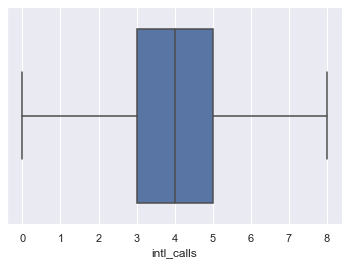

In [439]:
sns.boxplot(df.intl_calls)

In [440]:
## Outlier has been removed for "intl_calls" feature

### Checking Outlier For The Feature "intl_charge"

<AxesSubplot:xlabel='intl_charge', ylabel='Density'>

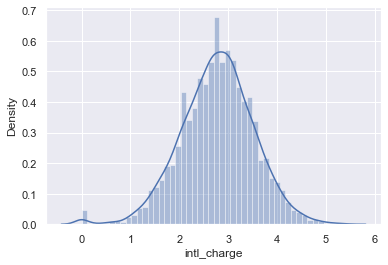

In [441]:
sns.distplot(df.intl_charge)

<AxesSubplot:xlabel='intl_charge'>

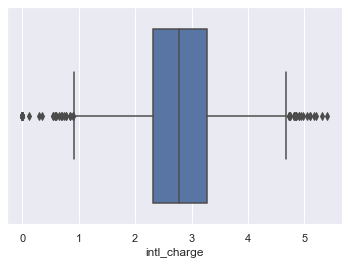

In [442]:
sns.boxplot(df.intl_charge)

### Removing Outlier For "intl_charge" Feature Using IQR

In [443]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_charge'], interpolation = 'midpoint') 

IQR

0.9500000000000002

In [444]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [445]:
min_limit

0.8949999999999996

In [446]:
df.loc[df['intl_charge']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
179      16         70.0        408   411-4582          0           0   
225      15         65.0        415   388-9568          0           0   
343      15         98.0        408   376-4300          0           1   
397      37         94.0        415   328-6011          0           0   
488      46        165.0        510   345-1998          0           0   
595      11         87.0        408   360-2690          0           1   
712      24        106.0        415   340-9910          0           0   
762      50        161.0        415   406-1349          1           0   
878      48         62.0        415   383-6373          0           0   
1028     16         70.0        415   369-9465          0           0   
1080     35        114.0        415   363-2602          0           0   
1099     11        157.0        415   333-7961          0           0   
1400     45        115.0        415   367-3971          0           0   
1564     46        137.0        510   348-9145          0           0   
1966     29         77.0        415   350-1532          0           0   
2180      1        121.0        415   414-6541          0           0   
2197     18        133.0        415   360-7079          0           0   
2198      9        127.0        415   344-9302          0           0   
2256     50         94.0        408   344-4022          0           0   
2345      9         98.0        408   416-7452          0           0   
2362     28        101.0        415   395-1380          0           0   
2513     34         86.0        510   387-2041          0           0   
2669     49        145.0        415   383-3375          0           0   
2679     50        145.0        408   405-6559          0           0   
2733     32        158.0        408   377-2725          0           0   
2906      4         87.0        415   383-4802          0           1   
2918     19         58.0        408   411-6598          0           0   
2933     14         98.0        510   351-3316          1           0   
3022     18        123.0        415   382-7659          0           1   
3160     30        123.0        408   366-7560          0           0   
3216     41        100.0        510   365-2192          0           1   
3234      8         75.0        510   419-9509          0           1   
3275     34        120.0        510   405-5083          0           1   
3290      4        127.0        510   388-4331          0           0   
3403     40         84.0        415   364-1173          0           0   
3663     25         78.0        510   373-6093          0           0   
3788     22        142.0        408   398-6401          0           0   
3891     44        180.0        510   380-6612          0           0   
4103     38         59.0        510   349-3579          0           0   
4371     34        138.0        415   411-2289          1           0   
4451     23         44.0        408   375-8931          0           0   
4504      1        123.0        415   406-8380          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
179             0.0     232.1      122.0       39.46  ...      112.0   
225             0.0     213.4      111.0       36.28  ...       94.0   
343            21.0      64.6       98.0       10.98  ...       86.0   
397             0.0     234.4      103.0       39.85  ...      109.0   
488             0.0     242.9      126.0       41.29  ...       65.0   
595            28.0     151.4       95.0       25.74  ...       97.0   
712             0.0     114.4      104.0       19.45  ...      101.0   
762             0.0     189.6       78.0       32.23  ...      117.0   
878             0.0     281.0       66.0       47.77  ...      108.0   
1028            0.0     222.8      114.0       37.88  ...      113.0   
1080            0.0     191.5       88.0       32.56  ...       78.0   
10

In [447]:
#Performing imputation
df.loc[df['intl_charge']<min_limit, 'intl_charge']=np.median(df['intl_charge'])

In [448]:
df.loc[df['intl_charge']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [449]:
max_limit

4.695

In [450]:
df.loc[df['intl_charge']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
115      21         36.0        510   363-1069          1           1   
214       9         70.0        510   366-6345          1           0   
314      13        128.0        408   359-5890          0           0   
367      20         45.0        415   350-1040          0           0   
502      22         93.0        415   366-7247          1           0   
515      13        148.0        510   421-1469          0           1   
535      29        194.0        408   408-3532          0           0   
1257     44         73.0        415   394-9934          0           0   
1420     22         81.0        415   393-6840          1           0   
1816     37         53.0        415   386-1418          0           0   
2004      4         77.0        510   335-2261          0           0   
2229     35         83.0        415   376-5375          0           1   
2371     14        100.0        415   420-6121          0           0   
2534      5         81.0        408   372-9091          0           0   
2816     13        130.0        415   358-3692          0           0   
3080     22         82.0        415   415-8200          0           0   
3307     36        172.0        408   398-3632          0           0   
3400      1        132.0        415   412-1338          0           0   
3568     16         48.0        408   383-4357          0           1   
3906     16        104.0        408   395-1632          0           0   
3916      6         68.0        510   373-8655          1           0   
4396     17         55.0        415   368-8579          0           1   
4574     40        137.0        510   368-4510          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
115             0.0     196.8       89.0       33.46  ...      122.0   
214             0.0     226.7       98.0       38.54  ...      115.0   
314             0.0     125.2       99.0       21.28  ...      107.0   
367             0.0      78.2      127.0       13.29  ...      108.0   
502             0.0     216.9       61.0       36.87  ...      120.0   
515            14.0      93.6      137.0       15.91  ...       72.0   
535             0.0      48.4      101.0        8.23  ...      138.0   
1257            0.0     182.3      115.0       30.99  ...       97.0   
1420            0.0     149.4       68.0       25.40  ...       98.0   
1816            0.0     184.8       98.0       31.42  ...      125.0   
2004            0.0     175.5       86.0       29.84  ...       78.0   
2229           25.0     191.3       95.0       32.52  ...      136.0   
2371            0.0     191.9       95.0       32.62  ...      101.0   
2534            0.0     115.3       99.0       19.60  ...      117.0   
2816            0.0     263.7      113.0       44.83  ...      103.0   
3080            0.0     135.4      102.0       23.02  ...      122.0   
3307            0.0     203.9      109.0       34.66  ...      123.0   
3400            0.0     200.0      104.0       34.00  ...      101.0   
3568           26.0     192.9       60.0       32.79  ...       87.0   
3906            0.0     191.8      105.0       32.61  ...       96.0   
3916            0.0     197.7       99.0       33.61  ...      106.0   
4396            0.0     197.5       89.0       33.58  ...      141.0   
4574            0.0     109.8      112.0       18.67  ...       88.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
115        21.67       138.3        126.0          6.22       10.3   
214        19.39        73.2         93.0          3.29       10.3   
314        17.46       254.4        111.0         11.45       10.3   
367        21.54       255.0        100.0         11.48       10.3   
502        17.63       221.7        110.0          9.98       10.3   
515        16.47       144.9         84.0          6.52       10.3   
535        23.89       218.5      

In [451]:
#Performing imputation
df.loc[df['intl_charge']>max_limit, 'intl_charge']=np.median(df['intl_charge'])

In [452]:
df.loc[df['intl_charge']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_charge'>

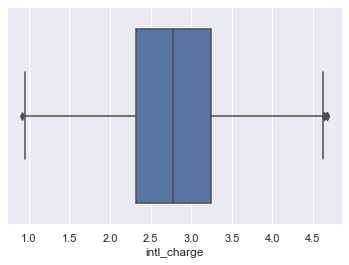

In [453]:
sns.boxplot(df.intl_charge)

In [454]:
#Applying IQR on 'intl_charge' feature again

In [455]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['intl_charge'], interpolation = 'midpoint') 

IQR

0.9200000000000004

In [456]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['intl_charge'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['intl_charge'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [457]:
min_limit

0.9399999999999993

In [458]:
df.loc[df['intl_charge']<min_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
2351     43        152.0        415   422-1799          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
2351            0.0     141.5      102.0       24.06  ...       94.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
2351       22.36       207.1        113.0          9.32       10.3   

      intl_calls  intl_charge  custserv_calls  churn  
2351         4.0         0.92               2      0  

[1 rows x 21 columns]

In [459]:
#Performing imputation
df.loc[df['intl_charge']<min_limit, 'intl_charge']=np.median(df['intl_charge'])

In [460]:
df.loc[df['intl_charge']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [461]:
max_limit

4.620000000000001

In [462]:
df.loc[df['intl_charge']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
469       1         41.0        510   369-6880          0           1   
1570     29        112.0        415   388-4282          0           0   
1651      6         64.0        415   406-9926          1           0   
2238     29         61.0        408   420-8897          0           0   
3852     49        136.0        510   402-8558          0           0   
4486     32        143.0        415   374-8632          0           0   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
469            34.0     194.4       63.0       33.05  ...      110.0   
1570            0.0     167.6      100.0       28.49  ...       90.0   
1651            0.0     225.3      134.0       38.30  ...       87.0   
2238            0.0     267.1      104.0       45.41  ...      131.0   
3852            0.0     240.1      121.0       40.82  ...      123.0   
4486            0.0     271.7       67.0       46.19  ...      101.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
469        21.67       160.2        115.0          7.21       10.3   
1570       13.13       281.4        107.0         12.66       10.3   
1651        9.20       139.6        132.0          6.28       10.3   
2238       15.33       230.6        106.0         10.38       10.3   
3852       23.05       132.7         98.0          5.97       10.3   
4486       16.07       101.1         55.0          4.55       10.3   

      intl_calls  intl_charge  custserv_calls  churn  
469          4.0         4.64               2      0  
1570         3.0         4.67               2      0  
1651         4.0         4.67               1      1  
2238         4.0         4.67               1      1  
3852         4.0         4.64               0      1  
4486         5.0         4.64               1      0  

[6 rows x 21 columns]

In [463]:
#Performing imputation
df.loc[df['intl_charge']>max_limit, 'intl_charge']=np.median(df['intl_charge'])

In [464]:
df.loc[df['intl_charge']>max_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

<AxesSubplot:xlabel='intl_charge'>

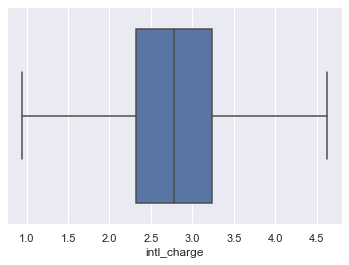

In [465]:
sns.boxplot(df.intl_charge)

In [466]:
## Outlier has been removed for "intl_charge" feature

### Checking Outlier For The Feature "custserv_calls"

<AxesSubplot:xlabel='custserv_calls', ylabel='Density'>

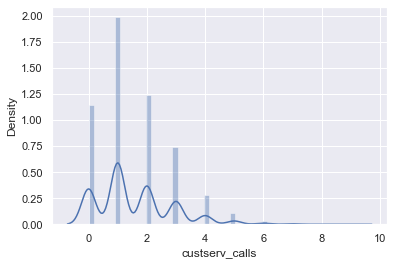

In [467]:
sns.distplot(df.custserv_calls)

<AxesSubplot:xlabel='custserv_calls'>

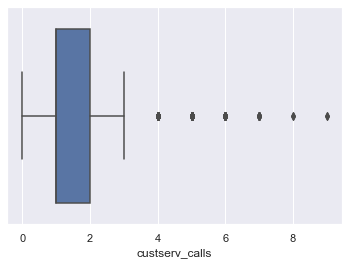

In [468]:
sns.boxplot(df.custserv_calls)

### Removing Outlier For "custserv_calls" Feature Using IQR

In [469]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df['custserv_calls'], interpolation = 'midpoint') 

IQR

1.0

In [470]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df['custserv_calls'].quantile(0.25)
# Third quartile (Q3) 
Q3 = df['custserv_calls'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [471]:
min_limit

-0.5

In [472]:
df.loc[df['custserv_calls']<min_limit]

Empty DataFrame
Columns: [state, acct_length, area_code, phone, intl_plan, vmail_plan, vmail_message, day_mins, day_calls, day_charge, eve_mins, eve_calls, eve_charge, night_mins, night_calls, night_charge, intl_mins, intl_calls, intl_charge, custserv_calls, churn]
Index: []

[0 rows x 21 columns]

In [473]:
max_limit

3.5

In [474]:
df.loc[df['custserv_calls']>max_limit]

state  acct_length  area_code      phone  intl_plan  vmail_plan  \
10       15         65.0        415   329-6603          0           0   
14       12         62.0        415   366-9238          0           0   
15       34        161.0        415   351-7269          0           0   
21        5         77.0        408   393-7984          0           0   
48       13        119.0        415   398-1294          0           0   
...     ...          ...        ...        ...        ...         ...   
4538     14        107.0        408   354-3963          0           0   
4550     50         69.0        415   342-6200          0           0   
4562     32         42.0        415   389-2130          0           0   
4568     31        124.0        415   338-5344          0           0   
4592     41         72.0        415   333-1661          0           1   

      vmail_message  day_mins  day_calls  day_charge  ...  eve_calls  \
10              0.0     129.1      137.0       21.95  ...       83.0   
14              0.0     120.7       70.0       20.52  ...       76.0   
15              0.0     180.0       67.0       30.60  ...       97.0   
21              0.0      62.4       89.0       10.61  ...      121.0   
48              0.0     159.1      114.0       27.05  ...      117.0   
...             ...       ...        ...         ...  ...        ...   
4538            0.0     228.2       90.0       38.79  ...      123.0   
4550            0.0     211.7       94.0       35.99  ...      124.0   
4562            0.0     137.9      100.0       23.44  ...      107.0   
4568            0.0     108.2       92.0       18.39  ...       83.0   
4592            0.0      84.3      116.0       14.33  ...      127.0   

      eve_charge  night_mins  night_calls  night_charge  intl_mins  \
10         19.42       208.8        111.0          9.40       12.7   
14         26.11       203.0         99.0          9.14       13.1   
15         27.01       160.6        128.0          7.23        5.4   
21         14.44       209.6         64.0          9.43        5.7   
48         19.66       143.2         91.0          6.44        8.8   
...          ...         ...          ...           ...        ...   
4538       18.21       183.1         79.0          8.24       10.5   
4550       20.07       252.7         90.0         11.37        7.2   
4562       19.97       166.6         70.0          7.50       14.3   
4568       18.22       185.5        100.0          8.35       13.2   
4592       22.71       167.7         75.0          7.55        8.3   

      intl_calls  intl_charge  custserv_calls  churn  
10           6.0         3.43               4      1  
14           6.0         3.54               4      0  
15           4.0         1.46               4      1  
21           6.0         1.54               5      1  
48           3.0         2.38               5      1  
...          ...          ...             ...    ...  
4538         4.0         2.84               4      0  
4550         2.0         1.94               4      0  
4562         3.0         3.86               5      1  
4568         4.0         3.56               4      1  
4592         6.0         2.24               4      1  

[368 rows x 21 columns]

In [475]:
##Since the feature has more than 5% outliers[>230 rows], no need to treat it.

## Feature Selection

<AxesSubplot:>

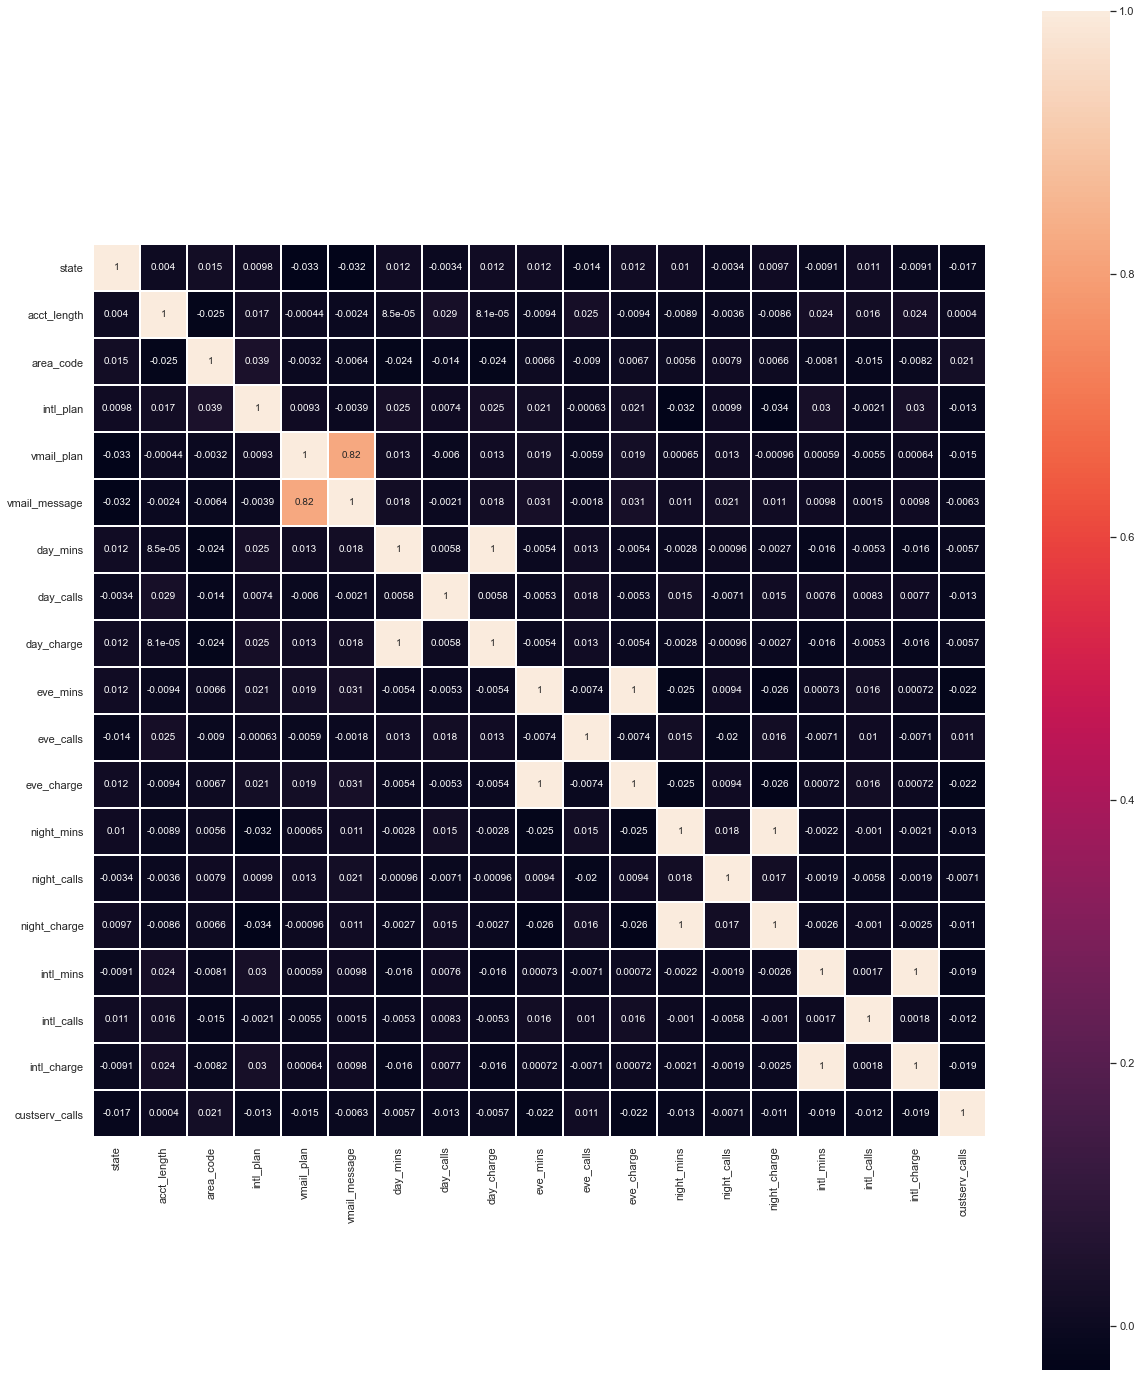

In [476]:
#plt.figure(figsize=(20,25))
#sns.heatmap(df.drop('churn',axis=1).corr(),annot=True,square=True,linewidths=1 , linecolor= 'white')

In [477]:
## Copying the file to another dataframea
df2 = df

In [478]:
# Feature Selection
df2 = df2.drop(['intl_mins','night_mins','eve_mins','day_mins','vmail_plan'], axis=1)

In [479]:
df2

state  acct_length  area_code      phone  intl_plan  vmail_message  \
0        16        128.0        415   382-4657          0           25.0   
1        35        107.0        415   371-7191          0           26.0   
2        31        137.0        415   358-1921          0            0.0   
3        35         84.0        408   375-9999          1            0.0   
4        36         75.0        415   330-6626          1            0.0   
...     ...          ...        ...        ...        ...            ...   
4612     34         57.0        510   345-7512          0           25.0   
4613     32        177.0        408   343-6820          0           29.0   
4614     46         67.0        408   338-4794          0           33.0   
4615     22         98.0        415   355-8388          0           23.0   
4616     15        140.0        415   409-6884          0            0.0   

      day_calls  day_charge  eve_calls  eve_charge  night_calls  night_charge  \
0         110.0       45.07       99.0       16.78         91.0         11.01   
1         123.0       27.47      103.0       16.62        103.0         11.45   
2         114.0       41.38      110.0       10.30        104.0          7.32   
3          71.0       50.90       88.0       17.07         89.0          8.86   
4         113.0       28.34      122.0       12.61        121.0          8.41   
...         ...         ...        ...         ...          ...           ...   
4612       81.0       24.48      112.0       15.91        122.0          7.14   
4613       91.0       32.13       96.0       25.76        116.0          7.36   
4614      126.0       21.68      129.0       25.17         91.0          9.04   
4615       98.0       28.71      117.0       19.24         96.0          7.45   
4616      100.0       34.80      107.0       10.78        115.0          9.13   

      intl_calls  intl_charge  custserv_calls  churn  
0            3.0         2.70               1      0  
1            3.0         3.70               1      0  
2            5.0         3.29               0      0  
3            7.0         1.78               2      0  
4            3.0         2.73               3      0  
...          ...          ...             ...    ...  
4612         6.0         2.30               3      0  
4613         1.0         4.24               3      0  
4614         3.0         3.51               1      0  
4615         3.0         3.86               0      0  
4616         4.0         3.27               2      0  

[4617 rows x 16 columns]

In [480]:
df2.phone.unique()

array([' 382-4657', ' 371-7191', ' 358-1921', ..., ' 338-4794',
       ' 355-8388', ' 409-6884'], dtype=object)

In [481]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   int32  
 1   acct_length     4617 non-null   float64
 2   area_code       4617 non-null   int32  
 3   phone           4617 non-null   object 
 4   intl_plan       4617 non-null   int64  
 5   vmail_message   4617 non-null   float64
 6   day_calls       4617 non-null   float64
 7   day_charge      4617 non-null   float64
 8   eve_calls       4617 non-null   float64
 9   eve_charge      4617 non-null   float64
 10  night_calls     4617 non-null   float64
 11  night_charge    4617 non-null   float64
 12  intl_calls      4617 non-null   float64
 13  intl_charge     4617 non-null   float64
 14  custserv_calls  4617 non-null   int32  
 15  churn           4617 non-null   int64  
dtypes: float64(10), int32(3), int64(2), object(1)
memory usage: 523.1+ KB


In [482]:
## As the phone number is a numeric with an alphanumeric formatting, conversion of it should be a real number, but if we convert
## it to be a number, it does not hold the real meaning as it is not a measurable number but an identification number of the 
## cellular/landline contact of an user. 

## If we convert it also, it forms as an ID code (just like patient id in a hospital data) rather than any value to our churn data.
## Anyway we are not going to delete area code which is also used to identify an area of a jurisidiction in an telecom area.

## We will drop this feature and will see how it does affect the model building activities.


df2.drop('phone',axis=1,inplace=True)

In [483]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   int32  
 1   acct_length     4617 non-null   float64
 2   area_code       4617 non-null   int32  
 3   intl_plan       4617 non-null   int64  
 4   vmail_message   4617 non-null   float64
 5   day_calls       4617 non-null   float64
 6   day_charge      4617 non-null   float64
 7   eve_calls       4617 non-null   float64
 8   eve_charge      4617 non-null   float64
 9   night_calls     4617 non-null   float64
 10  night_charge    4617 non-null   float64
 11  intl_calls      4617 non-null   float64
 12  intl_charge     4617 non-null   float64
 13  custserv_calls  4617 non-null   int32  
 14  churn           4617 non-null   int64  
dtypes: float64(10), int32(3), int64(2)
memory usage: 487.1 KB


In [484]:
#df2.to_csv('df2.pkl')

In [485]:
#df2 = pd.read_csv('df2.pkl')

In [486]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   int32  
 1   acct_length     4617 non-null   float64
 2   area_code       4617 non-null   int32  
 3   intl_plan       4617 non-null   int64  
 4   vmail_message   4617 non-null   float64
 5   day_calls       4617 non-null   float64
 6   day_charge      4617 non-null   float64
 7   eve_calls       4617 non-null   float64
 8   eve_charge      4617 non-null   float64
 9   night_calls     4617 non-null   float64
 10  night_charge    4617 non-null   float64
 11  intl_calls      4617 non-null   float64
 12  intl_charge     4617 non-null   float64
 13  custserv_calls  4617 non-null   int32  
 14  churn           4617 non-null   int64  
dtypes: float64(10), int32(3), int64(2)
memory usage: 487.1 KB


In [487]:
df2

state  acct_length  area_code  intl_plan  vmail_message  day_calls  \
0        16        128.0        415          0           25.0      110.0   
1        35        107.0        415          0           26.0      123.0   
2        31        137.0        415          0            0.0      114.0   
3        35         84.0        408          1            0.0       71.0   
4        36         75.0        415          1            0.0      113.0   
...     ...          ...        ...        ...            ...        ...   
4612     34         57.0        510          0           25.0       81.0   
4613     32        177.0        408          0           29.0       91.0   
4614     46         67.0        408          0           33.0      126.0   
4615     22         98.0        415          0           23.0       98.0   
4616     15        140.0        415          0            0.0      100.0   

      day_charge  eve_calls  eve_charge  night_calls  night_charge  \
0          45.07       99.0       16.78         91.0         11.01   
1          27.47      103.0       16.62        103.0         11.45   
2          41.38      110.0       10.30        104.0          7.32   
3          50.90       88.0       17.07         89.0          8.86   
4          28.34      122.0       12.61        121.0          8.41   
...          ...        ...         ...          ...           ...   
4612       24.48      112.0       15.91        122.0          7.14   
4613       32.13       96.0       25.76        116.0          7.36   
4614       21.68      129.0       25.17         91.0          9.04   
4615       28.71      117.0       19.24         96.0          7.45   
4616       34.80      107.0       10.78        115.0          9.13   

      intl_calls  intl_charge  custserv_calls  churn  
0            3.0         2.70               1      0  
1            3.0         3.70               1      0  
2            5.0         3.29               0      0  
3            7.0         1.78               2      0  
4            3.0         2.73               3      0  
...          ...          ...             ...    ...  
4612         6.0         2.30               3      0  
4613         1.0         4.24               3      0  
4614         3.0         3.51               1      0  
4615         3.0         3.86               0      0  
4616         4.0         3.27               2      0  

[4617 rows x 15 columns]

## Model Building

In [488]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0)

In [489]:
## draw the roc plot
def plot_roc_curve(mfpr, mtpr):
    plt.plot(mfpr, mtpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC/AUC Curve')
    plt.legend()
    plt.show()

In [490]:
df2.head()

state  acct_length  area_code  intl_plan  vmail_message  day_calls  \
0     16        128.0        415          0           25.0      110.0   
1     35        107.0        415          0           26.0      123.0   
2     31        137.0        415          0            0.0      114.0   
3     35         84.0        408          1            0.0       71.0   
4     36         75.0        415          1            0.0      113.0   

   day_charge  eve_calls  eve_charge  night_calls  night_charge  intl_calls  \
0       45.07       99.0       16.78         91.0         11.01         3.0   
1       27.47      103.0       16.62        103.0         11.45         3.0   
2       41.38      110.0       10.30        104.0          7.32         5.0   
3       50.90       88.0       17.07         89.0          8.86         7.0   
4       28.34      122.0       12.61        121.0          8.41         3.0   

   intl_charge  custserv_calls  churn  
0         2.70               1      0  
1         3.70               1      0  
2         3.29               0      0  
3         1.78               2      0  
4         2.73               3      0

In [491]:
# check if there is any imbalance with response variable.
df2.groupby('churn').size()

# Since we have imbalanced data, we may have to sub-sample the data /over sample/ create synthetic data using SMOTE()
# first we will try using SMOTE() and check the accuracy scores with different models.

churn
0    3961
1     656
dtype: int64

In [492]:
# define data
X = df2.iloc[ : , 0:-1 ]
y = df2['churn']
rl = []
rl_roc=[]

In [493]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           4617 non-null   int32  
 1   acct_length     4617 non-null   float64
 2   area_code       4617 non-null   int32  
 3   intl_plan       4617 non-null   int64  
 4   vmail_message   4617 non-null   float64
 5   day_calls       4617 non-null   float64
 6   day_charge      4617 non-null   float64
 7   eve_calls       4617 non-null   float64
 8   eve_charge      4617 non-null   float64
 9   night_calls     4617 non-null   float64
 10  night_charge    4617 non-null   float64
 11  intl_calls      4617 non-null   float64
 12  intl_charge     4617 non-null   float64
 13  custserv_calls  4617 non-null   int32  
 14  churn           4617 non-null   int64  
dtypes: float64(10), int32(3), int64(2)
memory usage: 487.1 KB


In [494]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [495]:
## SMOTE() the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() # create object smote

In [496]:
X_smote, y_smote = smote.fit_resample(X,y)

In [497]:
X_smote

state  acct_length  area_code  intl_plan  vmail_message   day_calls  \
0        16   128.000000        415          0      25.000000  110.000000   
1        35   107.000000        415          0      26.000000  123.000000   
2        31   137.000000        415          0       0.000000  114.000000   
3        35    84.000000        408          1       0.000000   71.000000   
4        36    75.000000        415          1       0.000000  113.000000   
...     ...          ...        ...        ...            ...         ...   
7917     39   137.210378        412          0      16.945288  112.657078   
7918     22   148.464857        413          0       0.000000  113.279286   
7919      0    50.413974        410          1      25.005822  106.209898   
7920      3   154.687820        415          0       0.000000   83.941657   
7921     12    38.317559        510          0       0.000000  121.317559   

      day_charge   eve_calls  eve_charge  night_calls  night_charge  \
0      45.070000   99.000000   16.780000    91.000000     11.010000   
1      27.470000  103.000000   16.620000   103.000000     11.450000   
2      41.380000  110.000000   10.300000   104.000000      7.320000   
3      50.900000   88.000000   17.070000    89.000000      8.860000   
4      28.340000  122.000000   12.610000   121.000000      8.410000   
...          ...         ...         ...          ...           ...   
7917   39.836267   99.184433   23.752893   113.262266      9.423424   
7918   19.957821   82.023429   14.921607    83.373000      7.388163   
7919   38.817304  100.790102   17.748862    79.603493      8.702399   
7920   30.146039   87.121802   20.037011    99.312180      9.449079   
7921   28.970277   96.783729   20.320755    77.459526      9.416621   

      intl_calls  intl_charge  custserv_calls  
0       3.000000     2.700000               1  
1       3.000000     3.700000               1  
2       5.000000     3.290000               0  
3       7.000000     1.780000               2  
4       3.000000     2.730000               3  
...          ...          ...             ...  
7917    4.368867     2.826830               2  
7918    3.279286     3.013674               4  
7919    2.801747     3.404547               0  
7920    1.936541     2.929468               1  
7921    3.560814     2.685471               3  

[7922 rows x 14 columns]

In [498]:
# split data into train and test
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 42)
X_train,X_test,y_train,y_test=train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

#### Logistic Regression

In [499]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score, \
classification_report,roc_auc_score, roc_curve
log_reg = LogisticRegression()

In [500]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [501]:
y_hat = log_reg.predict(X_test)

In [502]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.6401539448364335

In [503]:
# accuracy
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.6460567823343849

In [504]:
# Precison
Precision = precision_score(y_test,y_hat)
Precision

0.6245306633291614

In [505]:
# Recall
Recall = recall_score(y_test,y_hat)
Recall

0.656578947368421

In [506]:
#AUC
auc = roc_auc_score(y_test, y_hat)
auc

0.6464712918660287

In [507]:
pd.crosstab(y_test, y_hat)

col_0    0    1
churn          
0      525  300
1      261  499

In [508]:
rep=classification_report(y_test, y_hat)
print(rep)

              precision    recall  f1-score   support

           0       0.67      0.64      0.65       825
           1       0.62      0.66      0.64       760

    accuracy                           0.65      1585
   macro avg       0.65      0.65      0.65      1585
weighted avg       0.65      0.65      0.65      1585



In [509]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(X_test)[:,1]
probs

array([0.68940483, 0.27191573, 0.450154  , ..., 0.5228386 , 0.50427026,
       0.63099472])

In [510]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(log_reg,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_hat))

Threshold : 0.0
[[525 300]
 [261 499]]
Threshold : 0.1
[[525 300]
 [261 499]]
Threshold : 0.2
[[525 300]
 [261 499]]
Threshold : 0.30000000000000004
[[525 300]
 [261 499]]
Threshold : 0.4
[[525 300]
 [261 499]]
Threshold : 0.5
[[525 300]
 [261 499]]
Threshold : 0.6000000000000001
[[525 300]
 [261 499]]
Threshold : 0.7000000000000001
[[525 300]
 [261 499]]
Threshold : 0.8
[[525 300]
 [261 499]]
Threshold : 0.9
[[525 300]
 [261 499]]


In [511]:
#from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.69


In [512]:
rl.append(['LR',F1_Score, accuracy, Precision, Recall, auc])
#print('f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [513]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
rl_roc.append(['LR',fpr,tpr,thresholds])

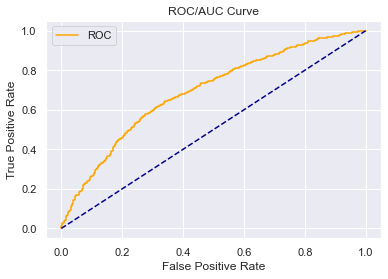

In [514]:
#Receiver operating characterstic (ROC) Curve / Area under the ROC (AUC) Curve
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)

#### SVM

In [515]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [516]:
## henceforth all output from predict will be assigned to y_hat in all classifiers for easy understanding of code.
y_hat=svclassifier.predict(X_test)

In [517]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svclassifier, X_scaled, y, scoring='accuracy', cv = 3)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 89.95018410223089


In [518]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.61      0.59      0.60       825
           1       0.57      0.59      0.58       760

    accuracy                           0.59      1585
   macro avg       0.59      0.59      0.59      1585
weighted avg       0.59      0.59      0.59      1585



In [519]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.5780946208684381

In [520]:
## cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=4,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0. 0. 0. 0.]
Cross validation Score: 0.0
Std : 0.0


In [521]:
# implmenting GridsearchCV
from sklearn.model_selection import GridSearchCV
  
# fixing parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
  
grid = GridSearchCV(SVC(random_state=42), param_grid, refit = True, verbose = 3,scoring='f1',cv=3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV 1/3] END ....................C=0.1, gamma=1;, score=0.671 total time=   6.5s
[CV 2/3] END ....................C=0.1, gamma=1;, score=0.671 total time=   6.5s
[CV 3/3] END ....................C=0.1, gamma=1;, score=0.671 total time=   6.6s
[CV 1/3] END ..................C=0.1, gamma=0.1;, score=0.671 total time=   5.8s
[CV 2/3] END ..................C=0.1, gamma=0.1;, score=0.671 total time=   5.9s
[CV 3/3] END ..................C=0.1, gamma=0.1;, score=0.671 total time=   6.0s
[CV 1/3] END .................C=0.1, gamma=0.01;, score=0.671 total time=   4.4s
[CV 2/3] END .................C=0.1, gamma=0.01;, score=0.671 total time=   4.4s
[CV 3/3] END .................C=0.1, gamma=0.01;, score=0.671 total time=   4.4s
[CV 1/3] END ................C=0.1, gamma=0.001;, score=0.632 total time=   4.2s
[CV 2/3] END ................C=0.1, gamma=0.001;, score=0.665 total time=   4.2s
[CV 3/3] END ................C=0.1, gamma=0.001;

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [522]:
# best parameter from GridSearchCV
print(grid.best_params_)

{'C': 10, 'gamma': 0.01}


In [523]:
# check best estimator 
print(grid.best_estimator_)

SVC(C=10, gamma=0.01, random_state=42)


In [524]:
# supplying above SVC & gamma values got from the GridSearchCV to the classifier (SVC)  
clf=SVC(C=10, gamma=0.01, random_state=42)

In [525]:
# fit the data with classifier
clf.fit(X_train,y_train)

SVC(C=10, gamma=0.01, random_state=42)

In [526]:
# prediction after GridSearch
y_hat=clf.predict(X_test)

In [527]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[819,   6],
       [ 62, 698]], dtype=int64)

In [528]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9570977917981073

In [529]:
Precision = precision_score(y_test,y_hat)
Precision

0.9914772727272727

In [530]:
Recall = recall_score(y_test,y_hat)
Recall

0.9184210526315789

In [531]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.953551912568306

In [532]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       825
           1       0.99      0.92      0.95       760

    accuracy                           0.96      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.96      0.96      0.96      1585



In [533]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.96


In [534]:
rl.append(['SVM',F1_Score, accuracy, Precision, Recall, auc])
#print('SVM---->f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [535]:
scores_after = cross_val_score(clf,X_scaled,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.49689441 0.48916409 0.50764526]
Cross validation Score: 0.49790125218801085
Std : 0.0


In [536]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['SVM',fpr,tpr,thresholds])

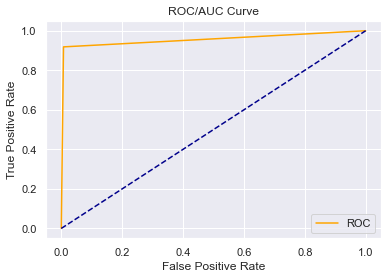

In [537]:
#import matplotlib.pyplot as plt
plot_roc_curve(fpr,tpr)

#### KNN

In [538]:
from sklearn.neighbors import KNeighborsClassifier

In [539]:
## taking optimal k (k = 10)
error_rate = []
# Will try
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

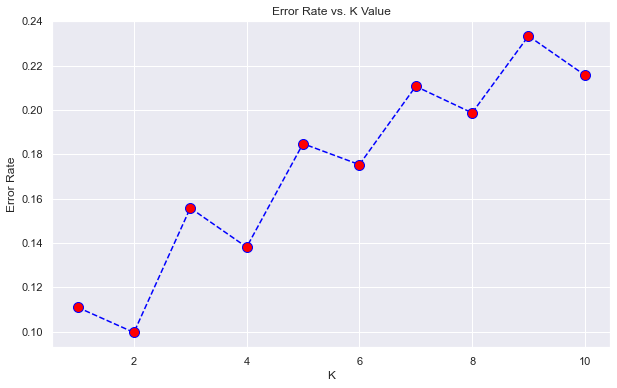

In [540]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [541]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [542]:
# Prediction
y_hat = knn.predict(X_test)

In [543]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[699, 126],
       [ 32, 728]], dtype=int64)

In [544]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9003154574132493

In [545]:
Precision = precision_score(y_test,y_hat)
Precision

0.8524590163934426

In [546]:
Recall = recall_score(y_test,y_hat)
Recall

0.9578947368421052

In [547]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.9021065675340767

In [548]:
print("The accuracy score is : ", accuracy_score(y_test,y_hat))

The accuracy score is :  0.9003154574132493


In [549]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       825
           1       0.85      0.96      0.90       760

    accuracy                           0.90      1585
   macro avg       0.90      0.90      0.90      1585
weighted avg       0.91      0.90      0.90      1585



In [550]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.90


In [551]:
rl.append(['KNN',F1_Score, accuracy, Precision, Recall, auc])
#print('KNN---->f1',F1_Score, 'accuracy',accuracy,'precision',Precision,'recall',Recall,'auc',auc)

In [552]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['KNN',fpr,tpr,thresholds])

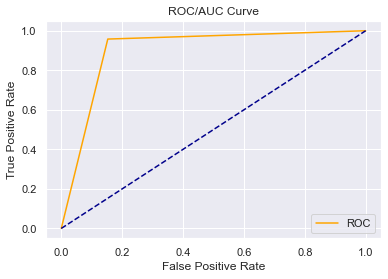

In [553]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Naive Bays

In [554]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) # object creation
nb.fit(X_train,y_train)

BernoulliNB(alpha=0.01)

In [555]:
y_hat=nb.predict(X_test)

In [556]:
from sklearn.metrics import classification_report,confusion_matrix

In [557]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.68      0.25      0.36       825
           1       0.52      0.87      0.65       760

    accuracy                           0.55      1585
   macro avg       0.60      0.56      0.51      1585
weighted avg       0.60      0.55      0.50      1585



In [558]:
pd.crosstab(y_test,y_hat)

col_0    0    1
churn          
0      206  619
1       99  661

In [559]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[206, 619],
       [ 99, 661]], dtype=int64)

In [560]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.5470031545741325

In [561]:
Precision = precision_score(y_test,y_hat)
Precision


0.51640625

In [562]:
Recall = recall_score(y_test,y_hat)
Recall

0.8697368421052631

In [563]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.6480392156862745

In [564]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.56


In [565]:
rl.append(['Naive bays',F1_Score, accuracy, Precision, Recall, auc])

In [566]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['NB',fpr,tpr,thresholds])

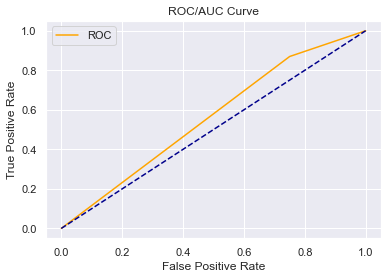

In [567]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Decision Tree

In [568]:
#  decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [569]:
y_hat=dt.predict(X_test)

In [570]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[710, 115],
       [ 58, 702]], dtype=int64)

In [571]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8908517350157729

In [572]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.8592411260709915

In [573]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9236842105263158

In [574]:
F1_Score=f1_score(y_test, y_hat)

In [575]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       825
           1       0.86      0.92      0.89       760

    accuracy                           0.89      1585
   macro avg       0.89      0.89      0.89      1585
weighted avg       0.89      0.89      0.89      1585



In [576]:
from sklearn.model_selection import GridSearchCV

In [577]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=3)
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})


In [578]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [579]:
tree_cv.best_score_

0.8843089624445143

In [580]:
# replace with the above best parameters on the Decicison Tree Classifier

dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=11,min_samples_leaf=1,min_samples_split=3,splitter='best')

In [581]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_split=3)

In [582]:
y_hat=dt_clf.predict(X_test)

In [583]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[763,  62],
       [ 86, 674]], dtype=int64)

In [584]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9066246056782334

In [585]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.9157608695652174

In [586]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.8868421052631579

In [587]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       825
           1       0.92      0.89      0.90       760

    accuracy                           0.91      1585
   macro avg       0.91      0.91      0.91      1585
weighted avg       0.91      0.91      0.91      1585



In [588]:
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.9010695187165776

In [589]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.91


In [590]:
rl.append(['Decision Tree',F1_Score, accuracy, Precision, Recall, auc])

In [591]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['DT',fpr,tpr,thresholds])

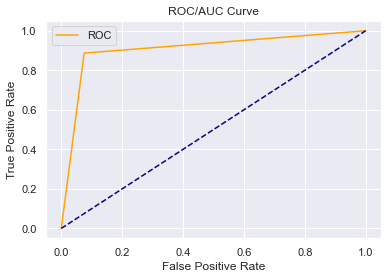

In [592]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### Random Forest

In [593]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [594]:
y_hat=rf_clf.predict(X_test)

In [595]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       825
           1       0.93      0.94      0.94       760

    accuracy                           0.94      1585
   macro avg       0.94      0.94      0.94      1585
weighted avg       0.94      0.94      0.94      1585



In [596]:
F1_Score=f1_score(y_test,y_hat)
F1_Score

0.9370904325032766

In [597]:
## hyper params tuning for better result
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

In [598]:
rf_clf1 = RandomForestClassifier(random_state=42)

In [599]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [600]:
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [601]:
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Best paramters: {'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False})


In [602]:
rf_clf2 = RandomForestClassifier(**rf_best_params)
rf_clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

In [603]:
y_hat=rf_clf2.predict(X_test)

In [604]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[789,  36],
       [ 34, 726]], dtype=int64)

In [605]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9558359621451105

In [606]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.952755905511811

In [607]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9552631578947368

In [608]:
F1_Score = f1_score(y_test,y_hat)
F1_Score  

0.9540078843626807

In [609]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.96


In [610]:
rl.append(['Random Forest',F1_Score, accuracy, Precision, Recall, auc])

In [611]:
#roc_curve params
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['RF',fpr,tpr,thresholds])

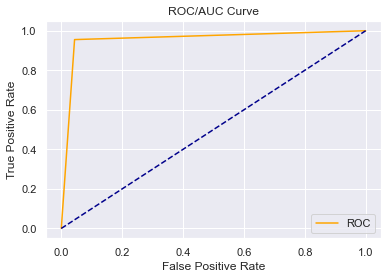

In [612]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)


#### Gradient Boosting

In [613]:
## importing the model library
from sklearn.ensemble import  GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train) ## fitting the data
y_hat=gbm.predict(X_test)

In [614]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[797,  28],
       [ 68, 692]], dtype=int64)

In [615]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9394321766561514

In [616]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.9611111111111111

In [617]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9105263157894737

In [618]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.9351351351351351

In [619]:
y_hat

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [620]:
len(X_train)

6337

In [621]:
len(X_test)

1585

In [622]:
## evaluatin the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_hat)
print(r2)

0.7573205741626794


In [623]:
X_test.shape

(1585, 14)

In [624]:
#adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.7567831632228308

In [625]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.94


In [626]:
rl.append(['Gradient boosting',F1_Score, accuracy, Precision, Recall, auc])

In [627]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(['GB',fpr,tpr,thresholds])

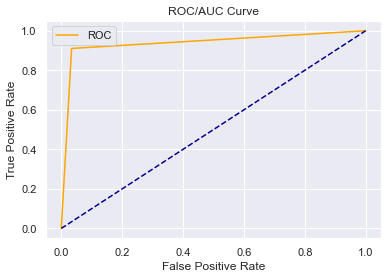

In [628]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### XGBOOST

In [629]:
import xgboost 

In [630]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6337 entries, 1768 to 7270
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           6337 non-null   int32  
 1   acct_length     6337 non-null   float64
 2   area_code       6337 non-null   int32  
 3   intl_plan       6337 non-null   int64  
 4   vmail_message   6337 non-null   float64
 5   day_calls       6337 non-null   float64
 6   day_charge      6337 non-null   float64
 7   eve_calls       6337 non-null   float64
 8   eve_charge      6337 non-null   float64
 9   night_calls     6337 non-null   float64
 10  night_charge    6337 non-null   float64
 11  intl_calls      6337 non-null   float64
 12  intl_charge     6337 non-null   float64
 13  custserv_calls  6337 non-null   int32  
dtypes: float64(10), int32(3), int64(1)
memory usage: 668.4 KB


In [631]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)
y_hat=xgb_c.predict(X_test)

[18:14:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [632]:
#confusion metrix - not applicable , since they cant handle continuous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[798,  27],
       [ 42, 718]], dtype=int64)

In [633]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9564668769716088

In [634]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat)
Precision

0.963758389261745

In [635]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat)
Recall

0.9447368421052632

In [636]:
# F1 Score
F1_Score = f1_score(y_test,y_hat)
F1_Score

0.9541528239202658

In [637]:
r2_score(y_test,y_hat)

0.8255741626794258

In [638]:
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.7567831632228308

In [639]:
auc = roc_auc_score(y_test, y_hat)
print('AUC: %.2f' % auc)

AUC: 0.96


In [640]:
rl.append(['XG boost',F1_Score, accuracy, Precision, Recall, auc])

In [641]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
rl_roc.append(["XGB",fpr,tpr,thresholds])

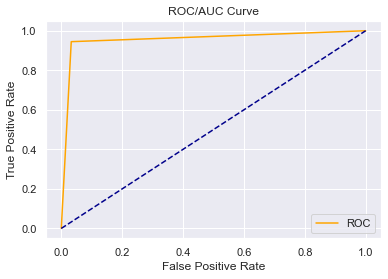

In [642]:
plt.figure(0).clf()
plot_roc_curve(fpr, tpr)

#### ----  Result analysis ----

In [643]:
res_df = pd.DataFrame(columns=['Model','F1-score','accuracy','precision','recall','auc'],data = rl)

In [644]:
res_df

Model  F1-score  accuracy  precision    recall       auc
0                 LR  0.640154  0.646057   0.624531  0.656579  0.691062
1                SVM  0.953552  0.957098   0.991477  0.918421  0.955574
2                KNN  0.902107  0.900315   0.852459  0.957895  0.902584
3         Naive bays  0.648039  0.547003   0.516406  0.869737  0.559717
4      Decision Tree  0.901070  0.906625   0.915761  0.886842  0.905845
5      Random Forest  0.954008  0.955836   0.952756  0.955263  0.955813
6  Gradient boosting  0.935135  0.939432   0.961111  0.910526  0.938293
7           XG boost  0.954153  0.956467   0.963758  0.944737  0.956005

In [645]:
res_df.sort_values(by='auc',ascending=False)

Model  F1-score  accuracy  precision    recall       auc
7           XG boost  0.954153  0.956467   0.963758  0.944737  0.956005
5      Random Forest  0.954008  0.955836   0.952756  0.955263  0.955813
1                SVM  0.953552  0.957098   0.991477  0.918421  0.955574
6  Gradient boosting  0.935135  0.939432   0.961111  0.910526  0.938293
4      Decision Tree  0.901070  0.906625   0.915761  0.886842  0.905845
2                KNN  0.902107  0.900315   0.852459  0.957895  0.902584
0                 LR  0.640154  0.646057   0.624531  0.656579  0.691062
3         Naive bays  0.648039  0.547003   0.516406  0.869737  0.559717

#### Comparision of ROC/AUC Scores

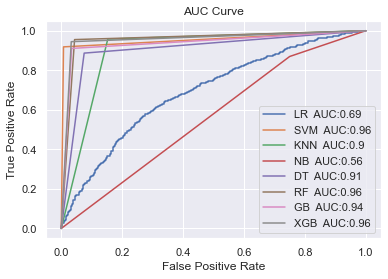

In [646]:
for i in range(0,8):    
    plt.plot(rl_roc[i][1], rl_roc[i][2],label=rl_roc[i][0] + '  AUC:' + str(round(res_df.iloc[i]['auc'],2)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend()
plt.show()

### Before conclusion 
#### Now we will try answering the 2nd problem in project goal statement i.e., create/predict the Churn Risk Score for campaigns

In [647]:
#from sklearn.svm import SVC
#svclassifier = SVC(probability=True)
#svclassifier.fit(X_train, y_train)

In [648]:
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)

[18:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [649]:
X_test

state  acct_length  area_code  intl_plan  vmail_message   day_calls  \
6403     36    52.696426        412          0            0.0   95.024348   
315      19    39.000000        408          0            0.0  100.000000   
3947     19   152.000000        408          0            0.0   70.000000   
1287     35   149.000000        408          0            0.0  108.000000   
2457     20   130.000000        415          0            0.0  120.000000   
...     ...          ...        ...        ...            ...         ...   
1419     32    65.000000        415          0            0.0   95.000000   
3941     19   113.000000        510          0            0.0   93.000000   
7836     23   108.302180        408          0            0.0  109.127725   
2436     32    63.000000        510          0            0.0   96.000000   
4886      4    77.418254        510          0            0.0   87.013131   

      day_charge   eve_calls  eve_charge  night_calls  night_charge  \
6403   43.400582  117.655845   19.094074    82.639613      8.685811   
315    10.270000  120.000000   26.030000   100.000000      5.580000   
3947   36.840000  102.000000   12.980000    99.000000      8.150000   
1287   33.370000   96.000000   11.630000    87.000000      6.960000   
2457   29.670000   95.000000   18.490000    67.000000      9.910000   
...          ...         ...         ...          ...           ...   
1419   17.970000  100.000000   12.050000   105.000000      8.120000   
3941   32.830000   85.000000   17.540000   102.000000      9.720000   
7836   36.449502  106.000000   22.431101    99.693665     11.631568   
2436   35.290000  112.000000   19.470000   131.000000      7.320000   
4886   27.770683   94.013131   16.435292    85.137229     10.569547   

      intl_calls  intl_charge  custserv_calls  
6403    5.327923     3.857159               2  
315     3.000000     3.350000               1  
3947    6.000000     3.130000               1  
1287    3.000000     2.080000               2  
2457    2.000000     3.290000               1  
...          ...          ...             ...  
1419    4.000000     1.780000               2  
3941    2.000000     3.000000               1  
7836    6.782970     3.102336               1  
2436    2.000000     3.590000               1  
4886    4.000000     2.574511               4  

[1585 rows x 14 columns]

In [650]:
#y_hat=svclassifier.predict_proba(X_test)
y_hat=xgb_c.predict_proba(X_test)

In [651]:
y_hat

array([[1.3589859e-04, 9.9986410e-01],
       [9.9701339e-01, 2.9866034e-03],
       [9.9752325e-01, 2.4767772e-03],
       ...,
       [5.4228306e-03, 9.9457717e-01],
       [9.1953039e-01, 8.0469616e-02],
       [3.8989127e-02, 9.6101087e-01]], dtype=float32)

In [652]:
## Create a column churn_risk_score
X_test['churn_risk_score'] = ""

In [653]:
## proba is predicted and now add it to the dataset as a column churn_risk_score
X_test['churn_risk_score'] = y_hat

In [654]:
X_test

state  acct_length  area_code  intl_plan  vmail_message   day_calls  \
6403     36    52.696426        412          0            0.0   95.024348   
315      19    39.000000        408          0            0.0  100.000000   
3947     19   152.000000        408          0            0.0   70.000000   
1287     35   149.000000        408          0            0.0  108.000000   
2457     20   130.000000        415          0            0.0  120.000000   
...     ...          ...        ...        ...            ...         ...   
1419     32    65.000000        415          0            0.0   95.000000   
3941     19   113.000000        510          0            0.0   93.000000   
7836     23   108.302180        408          0            0.0  109.127725   
2436     32    63.000000        510          0            0.0   96.000000   
4886      4    77.418254        510          0            0.0   87.013131   

      day_charge   eve_calls  eve_charge  night_calls  night_charge  \
6403   43.400582  117.655845   19.094074    82.639613      8.685811   
315    10.270000  120.000000   26.030000   100.000000      5.580000   
3947   36.840000  102.000000   12.980000    99.000000      8.150000   
1287   33.370000   96.000000   11.630000    87.000000      6.960000   
2457   29.670000   95.000000   18.490000    67.000000      9.910000   
...          ...         ...         ...          ...           ...   
1419   17.970000  100.000000   12.050000   105.000000      8.120000   
3941   32.830000   85.000000   17.540000   102.000000      9.720000   
7836   36.449502  106.000000   22.431101    99.693665     11.631568   
2436   35.290000  112.000000   19.470000   131.000000      7.320000   
4886   27.770683   94.013131   16.435292    85.137229     10.569547   

      intl_calls  intl_charge  custserv_calls  churn_risk_score  
6403    5.327923     3.857159               2          0.000136  
315     3.000000     3.350000               1          0.997013  
3947    6.000000     3.130000               1          0.997523  
1287    3.000000     2.080000               2          0.988845  
2457    2.000000     3.290000               1          0.981516  
...          ...          ...             ...               ...  
1419    4.000000     1.780000               2          0.993968  
3941    2.000000     3.000000               1          0.698253  
7836    6.782970     3.102336               1          0.005423  
2436    2.000000     3.590000               1          0.919530  
4886    4.000000     2.574511               4          0.038989  

[1585 rows x 15 columns]

In [655]:
X_test.churn_risk_score.value_counts()

0.000409    2
0.000009    2
0.000198    2
0.000014    2
0.000281    2
           ..
0.003606    1
0.010396    1
0.001917    1
0.026347    1
0.000136    1
Name: churn_risk_score, Length: 1576, dtype: int64

In [656]:
# create a frequency table to learn about the churn risks.
hist_var = pd.DataFrame(X_test['churn_risk_score'].value_counts(bins=10).sort_index())
hist_var.reset_index(inplace=True)

In [657]:
hist_var

index  churn_risk_score
0  (-0.001999, 0.1]               675
1        (0.1, 0.2]                28
2        (0.2, 0.3]                13
3        (0.3, 0.4]                14
4        (0.4, 0.5]                15
5        (0.5, 0.6]                18
6        (0.6, 0.7]                15
7        (0.7, 0.8]                29
8        (0.8, 0.9]                77
9        (0.9, 1.0]               701

### Risk score -0.002 to 0.1 has lesser risk and 0.9 to 1.0 has more risk. Hence we may want to concentrate on customers having more risk rather than those with lesser risk.

In [658]:
hist_var.sum() #check all risks records are taken into account

churn_risk_score    1585
dtype: int64

In [659]:
#sns.histplot(hist_var.churn_risk_score, bins=10)
#plt.show()

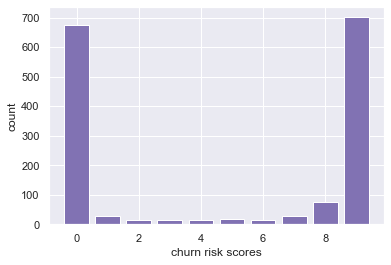

In [660]:
plt.bar(hist_var.index, hist_var.churn_risk_score,color='m')
plt.xlabel('churn risk scores') ## index of risk scores
plt.ylabel('count')
plt.show()

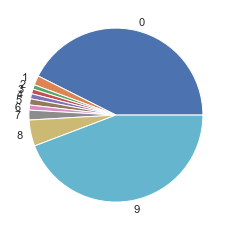

In [661]:
pielist=hist_var.churn_risk_score
plt.pie(pielist,labels=hist_var.index)
plt.pie(pielist)
plt.show()

In [662]:
#sns.countplot(x=X_test.churn_risk_score,data=X_test)

In [663]:
X_test[['churn_risk_score','state','area_code']].sort_values(by='churn_risk_score',ascending=False)

churn_risk_score  state  area_code
3289      9.998479e-01     42        408
2131      9.997401e-01     35        408
1263      9.996973e-01     19        408
540       9.996375e-01      1        408
2970      9.995759e-01     28        415
...                ...    ...        ...
7542      2.861023e-06     33        412
7723      2.264977e-06     20        412
6424      1.430511e-06     20        410
5548      1.192093e-06      9        413
7225      8.344650e-07     38        410

[1585 rows x 3 columns]

### Conclusion:

#### Out of the models we tried, models XGB, RF, SVM yields good predictions /accuracy scores. Since, XGBOOST yields the best  scores (95-97%) as compared to other two models , we select XGB model as the first choice for the prediction. If not, we may select other models  which also yields > 95%.

#### We observed from the above, 50%of customers (from the sample population) have the tendency to churn the telecom. If we see the customer base having this share of churn risk, we can say there are a lot of things that need to be improved by the company to retain existing customers.
